In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from utils import *
import params

%matplotlib notebook
%matplotlib inline

#Import Data Set

In [2]:
def range_to_count_transform(label):
    # number of targets is 1 to 10

    number_of_targets = torch.count_nonzero(label)
    # map 1 to 10 to 0 to 9
    number_of_targets = number_of_targets - 1
    # target = F.one_hot(number_of_targets, num_classes=10)
    target = number_of_targets
    return target

In [3]:
dataset_folder = "dataset"
dataset_name = "dataset_3D.npy"
data_sample_len = 2 * params.DATA_LEN_3D
label_len = params.LABEL_LEN_3D

# set seed
seed_val = params.SEED
seed_everything(seed=seed_val)
train_set, val_set, test_set = create_dataset(dataset_folder,dataset_name,data_sample_len,label_len,params)

train_size = train_set.__len__()# int(data_size * train_ratio)
validation_size = val_set.__len__()#int(data_size * val_ratio)
test_size = test_set.__len__()#data_size - train_size - validation_size

print("train db sample size ", train_set.__len__())
print("validation db sample size ", val_set.__len__())
print("test db sample size ", test_set.__len__())

# parameters

# waveform
input_size = params.DATA_LEN_3D
# number of targets
output_size = params.LABEL_LEN_3D

# decrease batch size if low on memory
batch_size = 32

train db sample size  6000
validation db sample size  1500
test db sample size  2500
train db sample size  6000
validation db sample size  1500
test db sample size  2500


In [4]:
print(train_set[0,:][2])
print(len(train_set))

tensor([0., 0., 0.,  ..., 0., 0., 0.])
6000


# Ranges - Labels

In [5]:
print(train_set[0,:][1])

tensor([ 1.5498,  1.7940,  2.2195,  2.7580,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  1.8691,  0.7137, -0.6780, -1.7925,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.4813,  0.5523,  1.4947,  0.2555,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)


In [6]:
train_ranges=[train_set[i,:][1][train_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(train_set)) ]
val_ranges=[val_set[i,:][1][val_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(val_set))]
test_ranges=[test_set[i,:][1][test_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(test_set)) ]
print(train_ranges[:10])

train_num_ranges=[len(r) for r in train_ranges]
val_num_ranges=[len(r) for r in val_ranges]
test_num_ranges=[len(r) for r in test_ranges]

print(train_num_ranges)

[array([[1.5498 ],
       [1.79402],
       [2.21955],
       [2.75803]]), array([[1.34789],
       [1.37205]]), array([[1.22271],
       [1.27371],
       [1.53625],
       [1.62964],
       [1.71125],
       [1.78129],
       [1.83649],
       [2.00823],
       [2.67543],
       [2.74039]]), array([[1.13156],
       [2.1492 ]]), array([[1.16943],
       [1.67098],
       [2.35668],
       [2.44652],
       [2.48357],
       [2.75392],
       [2.97088]]), array([[1.22165],
       [1.68561],
       [1.84938],
       [2.10179],
       [2.36445],
       [2.93711],
       [2.98938]]), array([[1.11394],
       [1.2524 ],
       [1.43818],
       [1.67957],
       [2.01859],
       [2.11471],
       [2.27017],
       [2.79509],
       [2.81254]]), array([[1.80802],
       [1.92696],
       [2.13515],
       [2.22356],
       [2.22584],
       [2.35891],
       [2.54298],
       [2.63427],
       [2.74837],
       [2.97616]]), array([[1.408  ],
       [1.43691],
       [1.70513],
       [2.6

In [7]:
plt.rcParams["figure.figsize"] = (16,12)
def plot_hist(ar,bins_num,density,xlabel,ylabel,title,range_val=None):
  if range_val==None:
    range_val=(np.min(ar), np.max(ar))
  n, bins, patches = plt.hist(ar,bins_num,range=range_val, density=density)
  plt.xlabel(xlabel, fontsize=26)
  plt.ylabel(ylabel, fontsize=26)
  plt.title('Histogram of '+title, fontsize=26)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.grid(True)
  plt.show()

def plot_hist_all(ar_train, ar_val, ar_test,bins_num,xlabel,title,log10=False,loc='upper right'):
  n, bins, patches = plt.hist(ar_train,bins_num,density=True, label='Train',alpha=0.6)#,color='black')
  n, bins, patches = plt.hist(ar_val,bins_num,density=True, label='Val',alpha=0.6)#,color='red')
  n, bins, patches = plt.hist(ar_test,bins_num,density=True, label='Test',alpha=0.6)#,color='yellow')
  plt.xlabel(xlabel, fontsize=26)
  plt.ylabel('Percentage', fontsize=26)
  #plt.title('Histogram of '+title, fontsize=26)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  if log10:
    plt.xscale('log')
  plt.legend(loc=loc,fontsize=26)
  plt.grid(True)
  plt.show()

def plot_bar(ar,xlabel,ylabel,title):
  values, counts = np.unique(ar, return_counts=True)
  plt.bar(values, counts)
  plt.xlabel(xlabel, fontsize=26)
  plt.ylabel(ylabel, fontsize=26)
  plt.title('Bar plot of '+title, fontsize=26)
  plt.xticks(values,fontsize=20)
  plt.yticks(fontsize=20)
  plt.grid(True)
  plt.show()

def plot_bar_all(ar_train, ar_val, ar_test,xlabel,title,loc='upper right'):
  values_train, counts_train1 = np.unique(ar_train, return_counts=True)
  values_val, counts_val1 = np.unique(ar_val, return_counts=True)
  values_test, counts_test1 = np.unique(ar_test, return_counts=True)

  values=np.unique(np.append(np.append(values_train,values_val),values_test))
  counts_train=np.zeros(len(values))
  counts_val=np.zeros(len(values))
  counts_test=np.zeros(len(values))

  for i in range(len(values)):
    k=np.where(values_train==values[i])[0]
    if len(k)>0:
      counts_train[i]=counts_train1[k[0]]

    k=np.where(values_val==values[i])[0]
    if len(k)>0:
      counts_val[i]=counts_val1[k[0]]

    k=np.where(values_test==values[i])[0]
    if len(k)>0:
      counts_test[i]=counts_test1[k[0]]

  pr_train=100*counts_train/np.sum(counts_train)
  pr_val=100*counts_val/np.sum(counts_val)
  pr_test=100*counts_test/np.sum(counts_test)
  X_axis = np.arange(len(values))

  width=0.25

  plt.bar(X_axis , pr_train, width, label = 'Train')
  plt.bar(X_axis+width, pr_val, width, label = 'Validation')
  plt.bar(X_axis+(2*width), pr_test, width, label = 'Test')
  plt.xticks(X_axis+width, values,fontsize=20)
  plt.yticks(fontsize=20)
  plt.ylabel('Percentage', fontsize=26)
  plt.xlabel(xlabel, fontsize=26)
  #plt.title('Bar plot of '+title, fontsize=26)
  plt.legend(loc=loc,fontsize=26)
  plt.grid(True)
  plt.show()

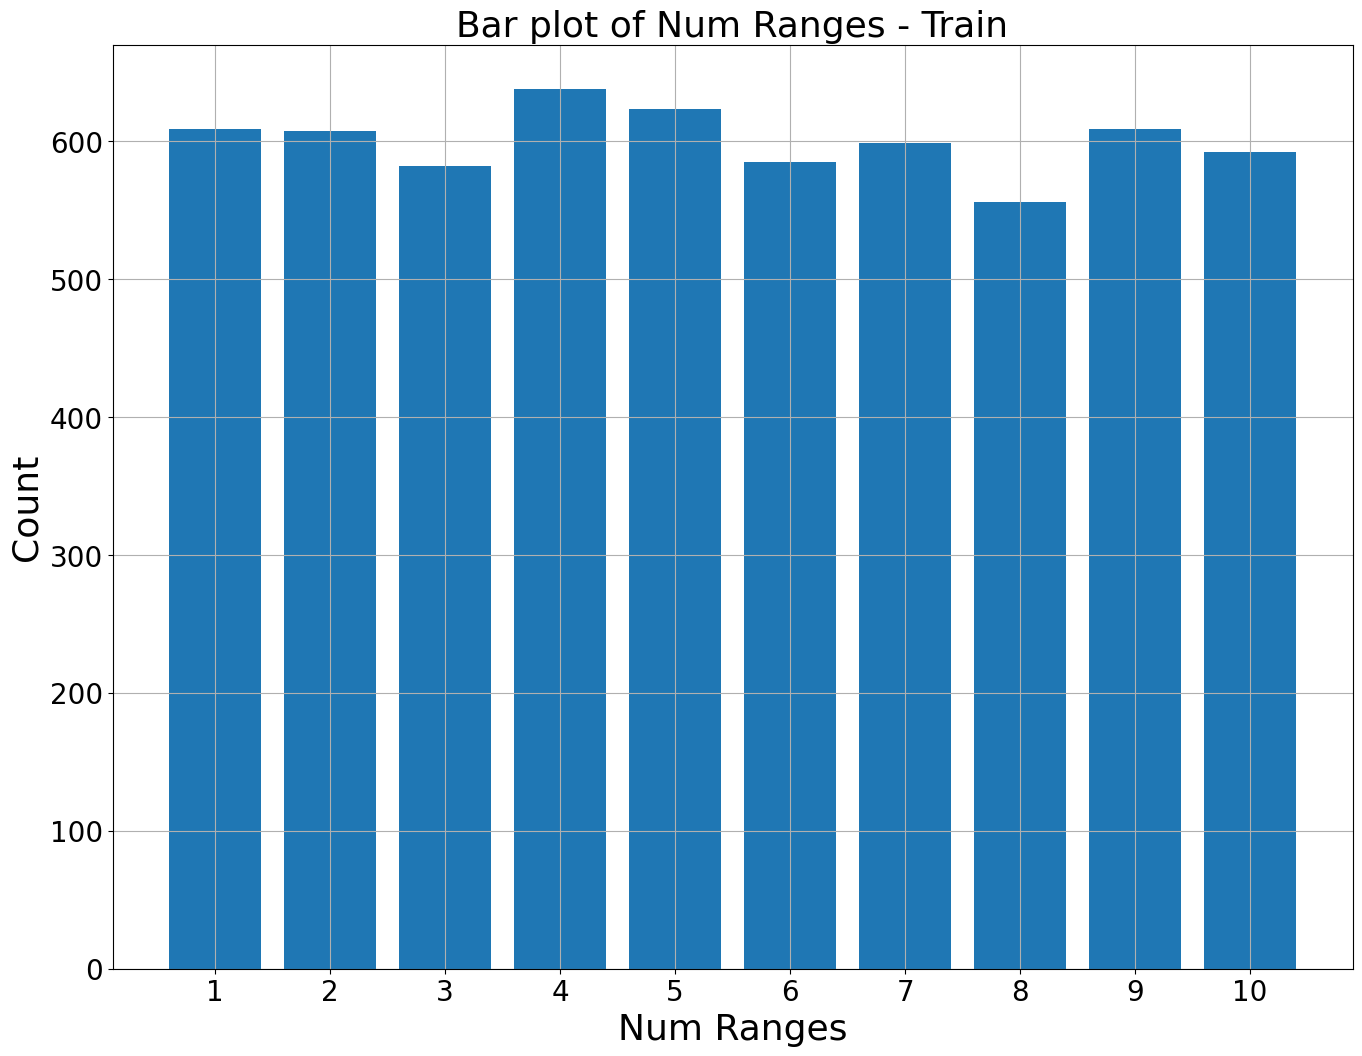

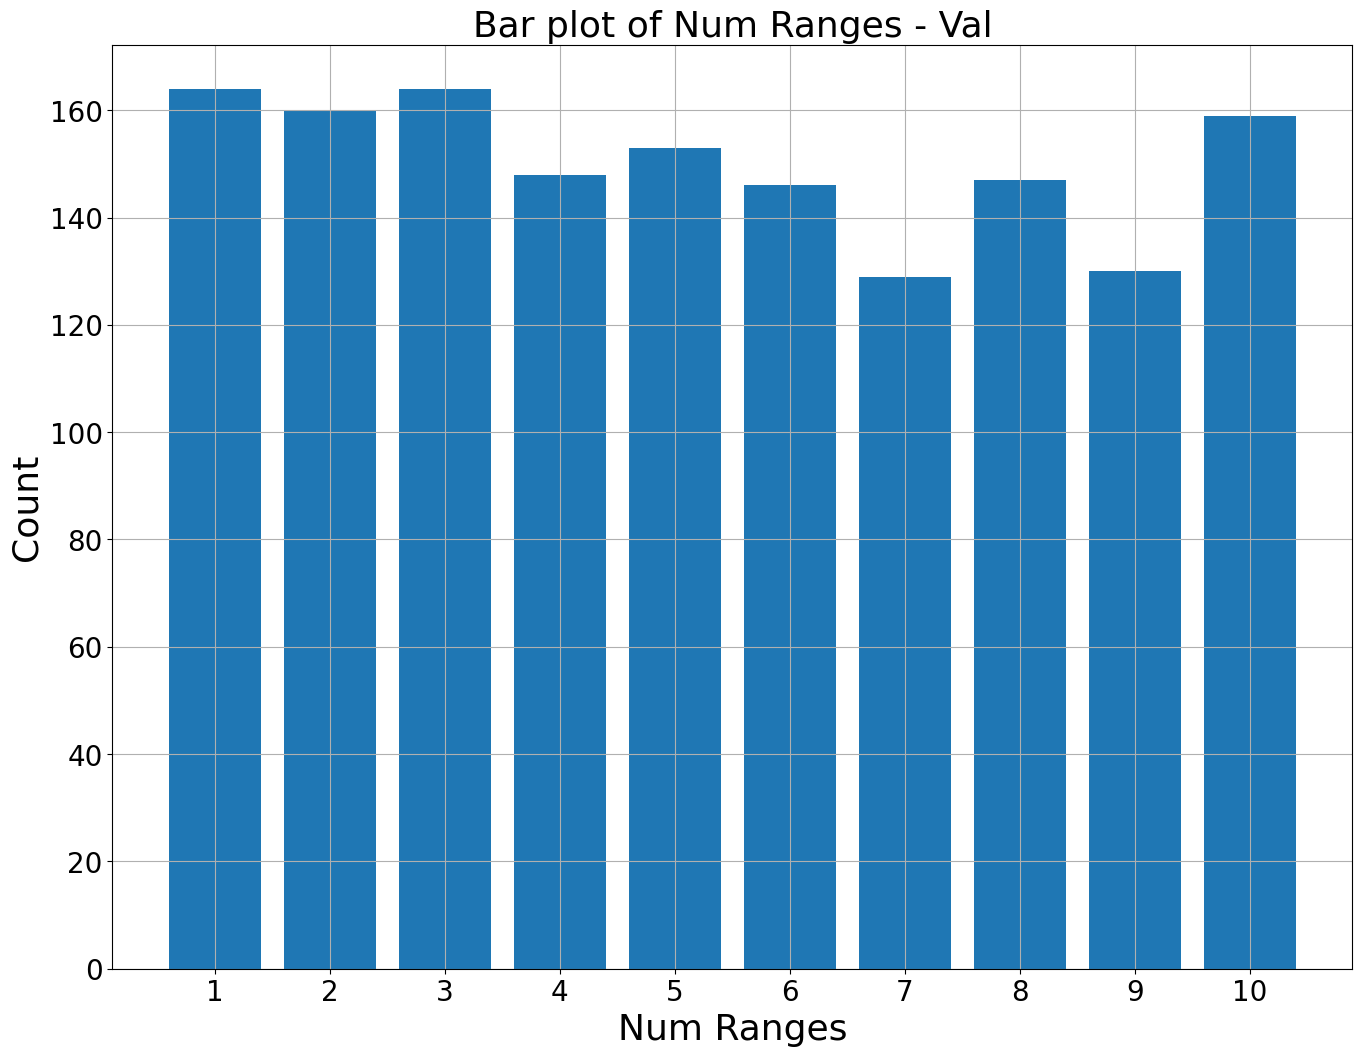

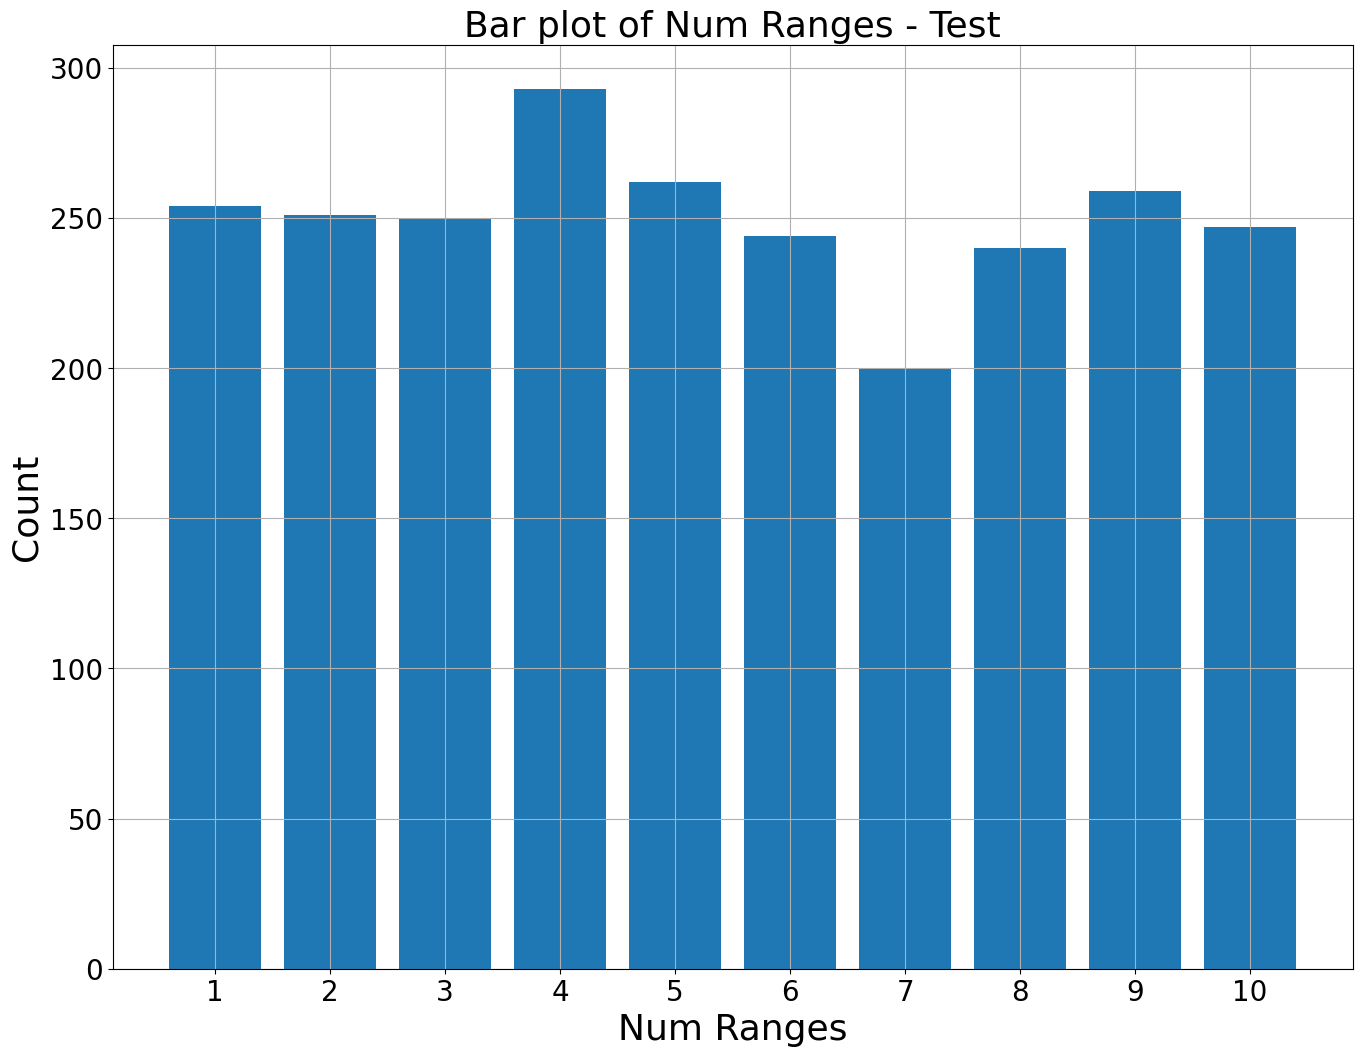

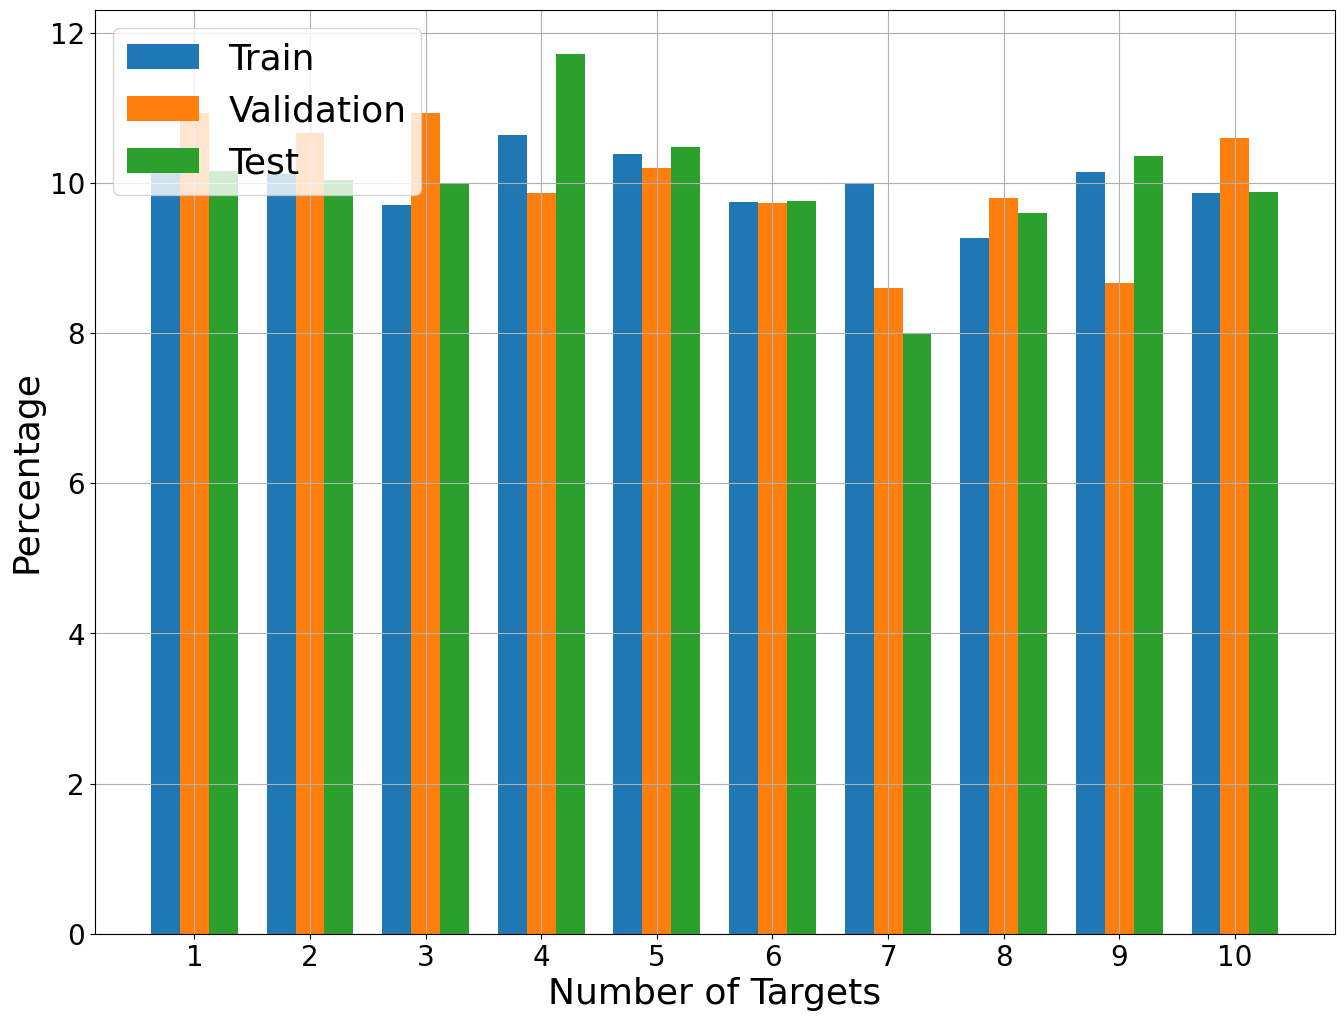

In [8]:
bins_num=np.max(train_num_ranges)
density=False

plot_bar(train_num_ranges,'Num Ranges','Count','Num Ranges - Train')
plot_bar(val_num_ranges,'Num Ranges','Count','Num Ranges - Val')
plot_bar(test_num_ranges,'Num Ranges','Count','Num Ranges - Test')

plot_bar_all(train_num_ranges,val_num_ranges,test_num_ranges,'Number of Targets','Number of Targets',loc='upper left')

## Overlaps

In [9]:
def calc_num_overlaps(distance_overlap,ar_num,ar_ranges):
  num_overlaps=np.zeros_like(ar_num)
  for i in range(len(ar_num)):
    for j in range(ar_num[i]-1):
      if ar_ranges[i][j+1]-ar_ranges[i][j]<distance_overlap:
        num_overlaps[i]+=1

  return num_overlaps

In [10]:
f_sample=params.F_SAMPLE
v_sound=params.V_P
dt_pulse=params.TX_SIGNAL_LENGTH

distance_overlap=dt_pulse*v_sound/2

train_num_overlaps=calc_num_overlaps(distance_overlap,train_num_ranges,train_ranges)
val_num_overlaps=calc_num_overlaps(distance_overlap,val_num_ranges,val_ranges)
test_num_overlaps=calc_num_overlaps(distance_overlap,test_num_ranges,test_ranges)

print(train_num_overlaps)
print(val_num_overlaps)
print(test_num_overlaps)

[2 1 8 ... 8 6 2]
[7 0 2 ... 8 8 8]
[0 2 1 ... 2 3 1]


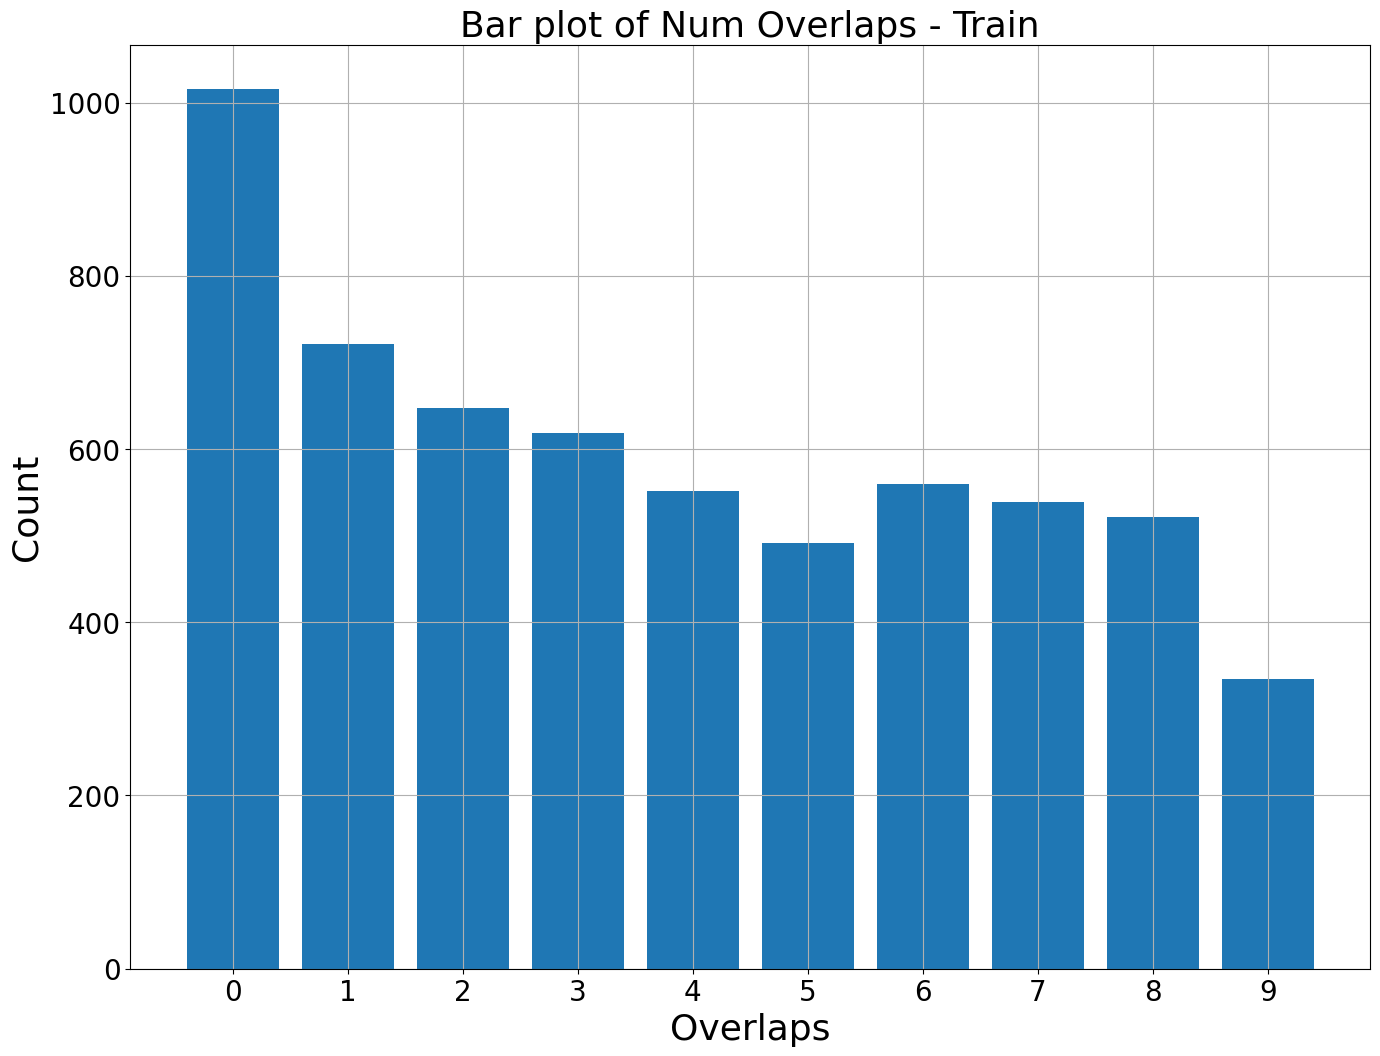

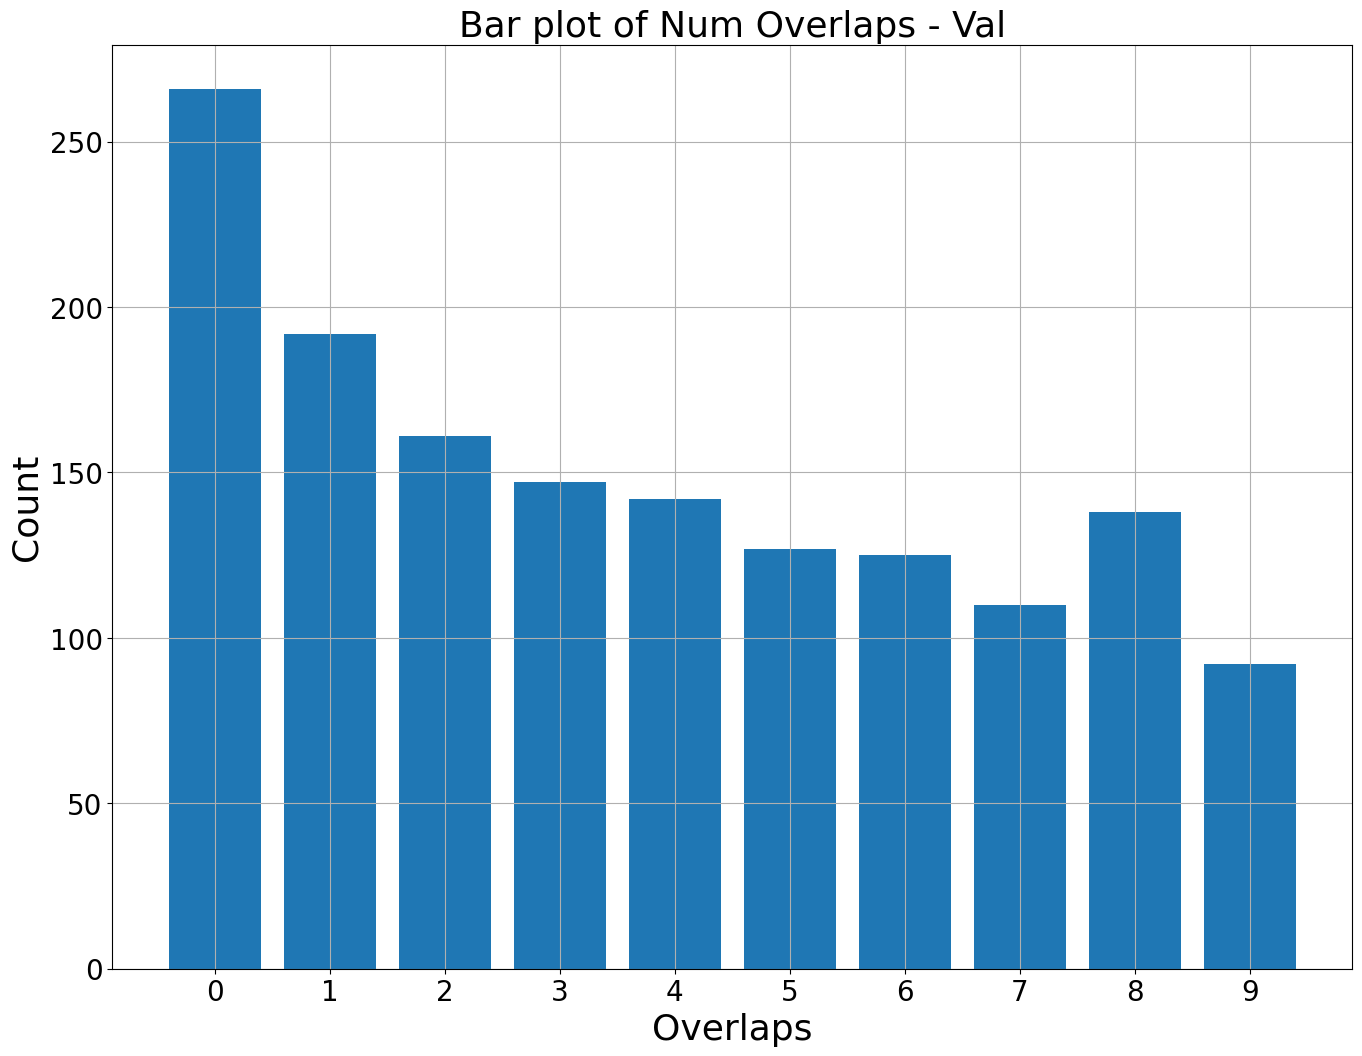

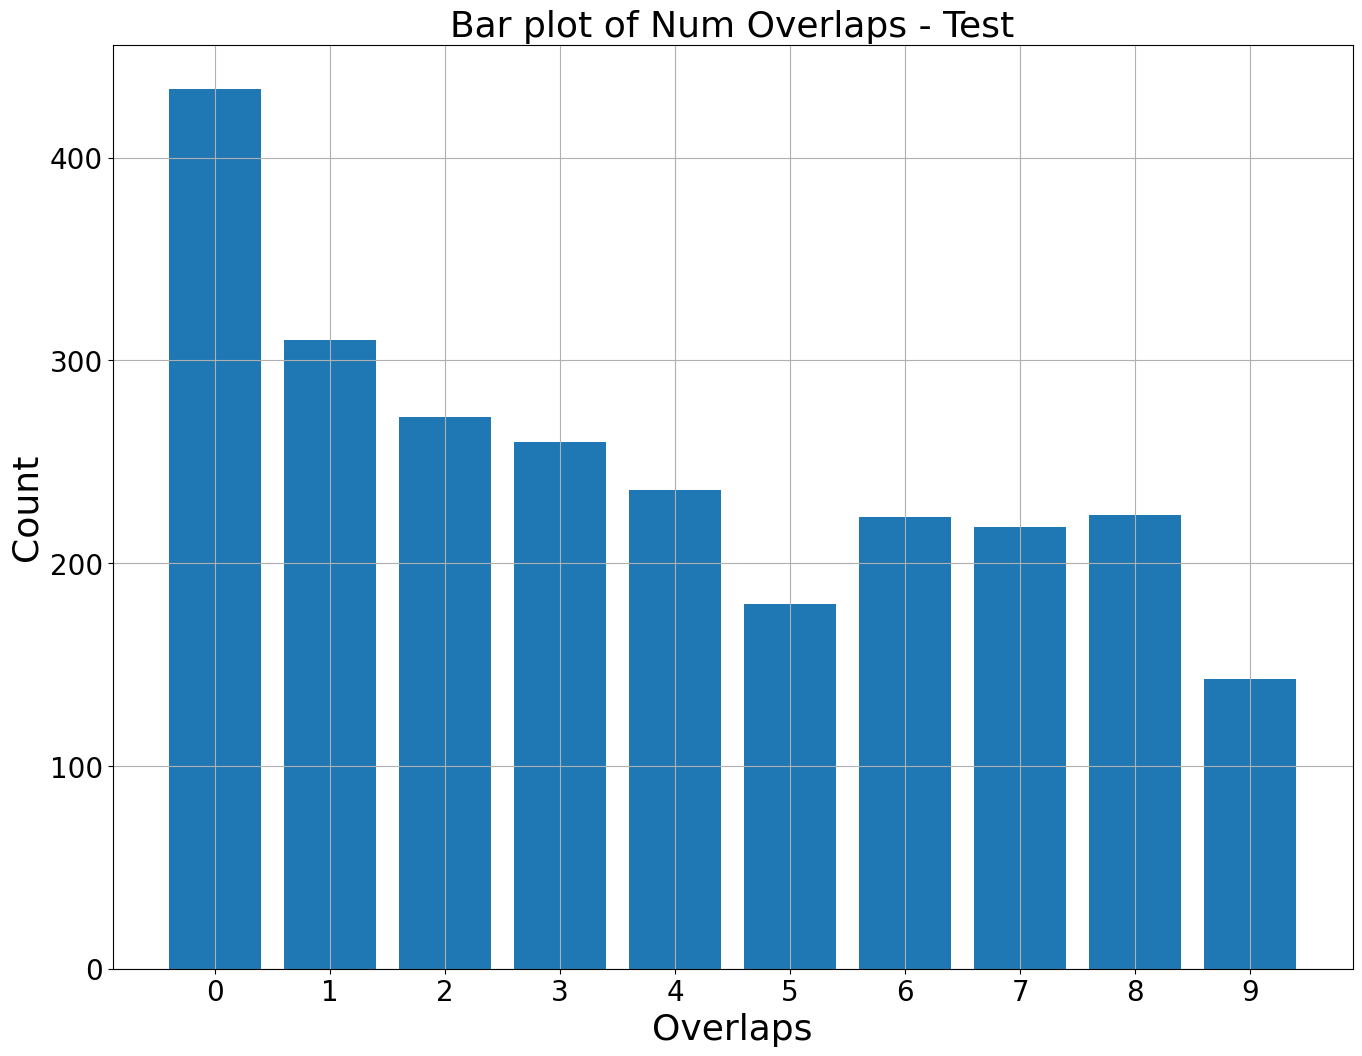

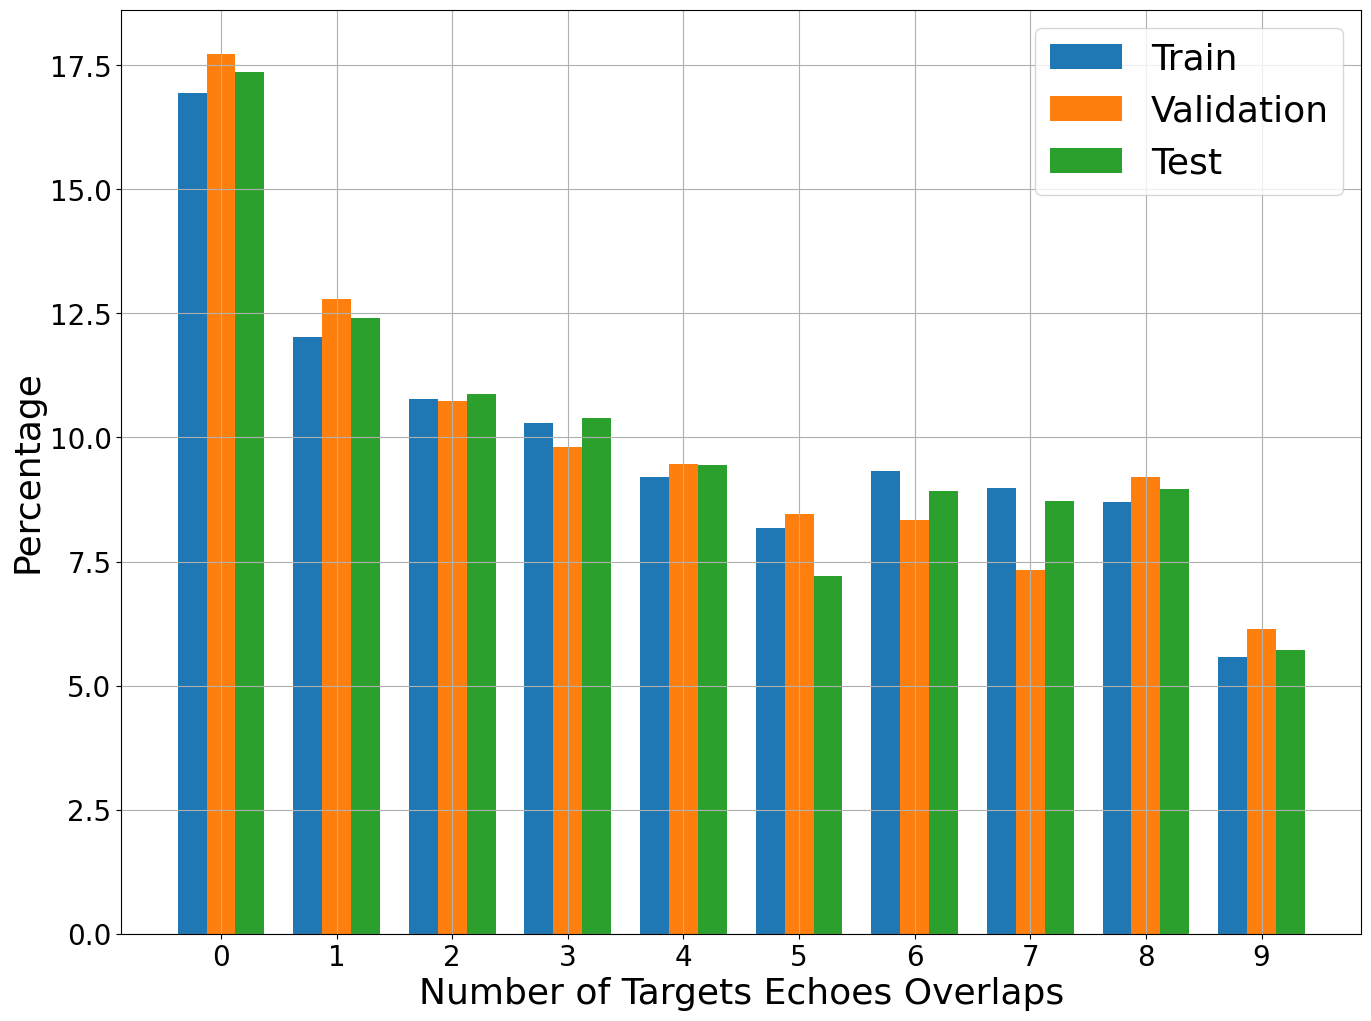

In [11]:
bins_num=np.max(train_num_overlaps)+1
density=False

plot_bar(train_num_overlaps,'Overlaps','Count','Num Overlaps - Train')
plot_bar(val_num_overlaps,'Overlaps','Count','Num Overlaps - Val')
plot_bar(test_num_overlaps,'Overlaps','Count','Num Overlaps - Test')

plot_bar_all(train_num_overlaps,val_num_overlaps,test_num_overlaps,'Number of Targets Echoes Overlaps','Number of Targets Echoes Overlaps',loc='upper right')

In [12]:
def heat_map_ranges_overlaps(num_ranges,num_overlaps,title):
  max_ranges=np.max(num_ranges)
  max_overlaps=np.max(num_overlaps)

  counts, xedges, yedges, Image = plt.hist2d(num_ranges, num_overlaps,
                                             (max_ranges, max_overlaps+1),
                                             cmap='bwr')
  dx = xedges[1]-xedges[0]
  dy = yedges[1]-yedges[0]
  for i in range(xedges.size-1):
      for j in range(yedges.size-1):
          xb = xedges[i] + 0.3*dx
          yb = yedges[j] + 0.4*dy
          plt.text(xb, yb, str(int(counts[i,j])),
                   fontsize=18,color="k", fontweight="bold" )

  plt.xlabel('Number of Targets', fontsize=26)
  plt.ylabel('Number of Targets Echoes Overlaps', fontsize=26)
  plt.title('Heatmap of Number of Targets vs Targets Echoes Overlaps - '+title, fontsize=26)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()


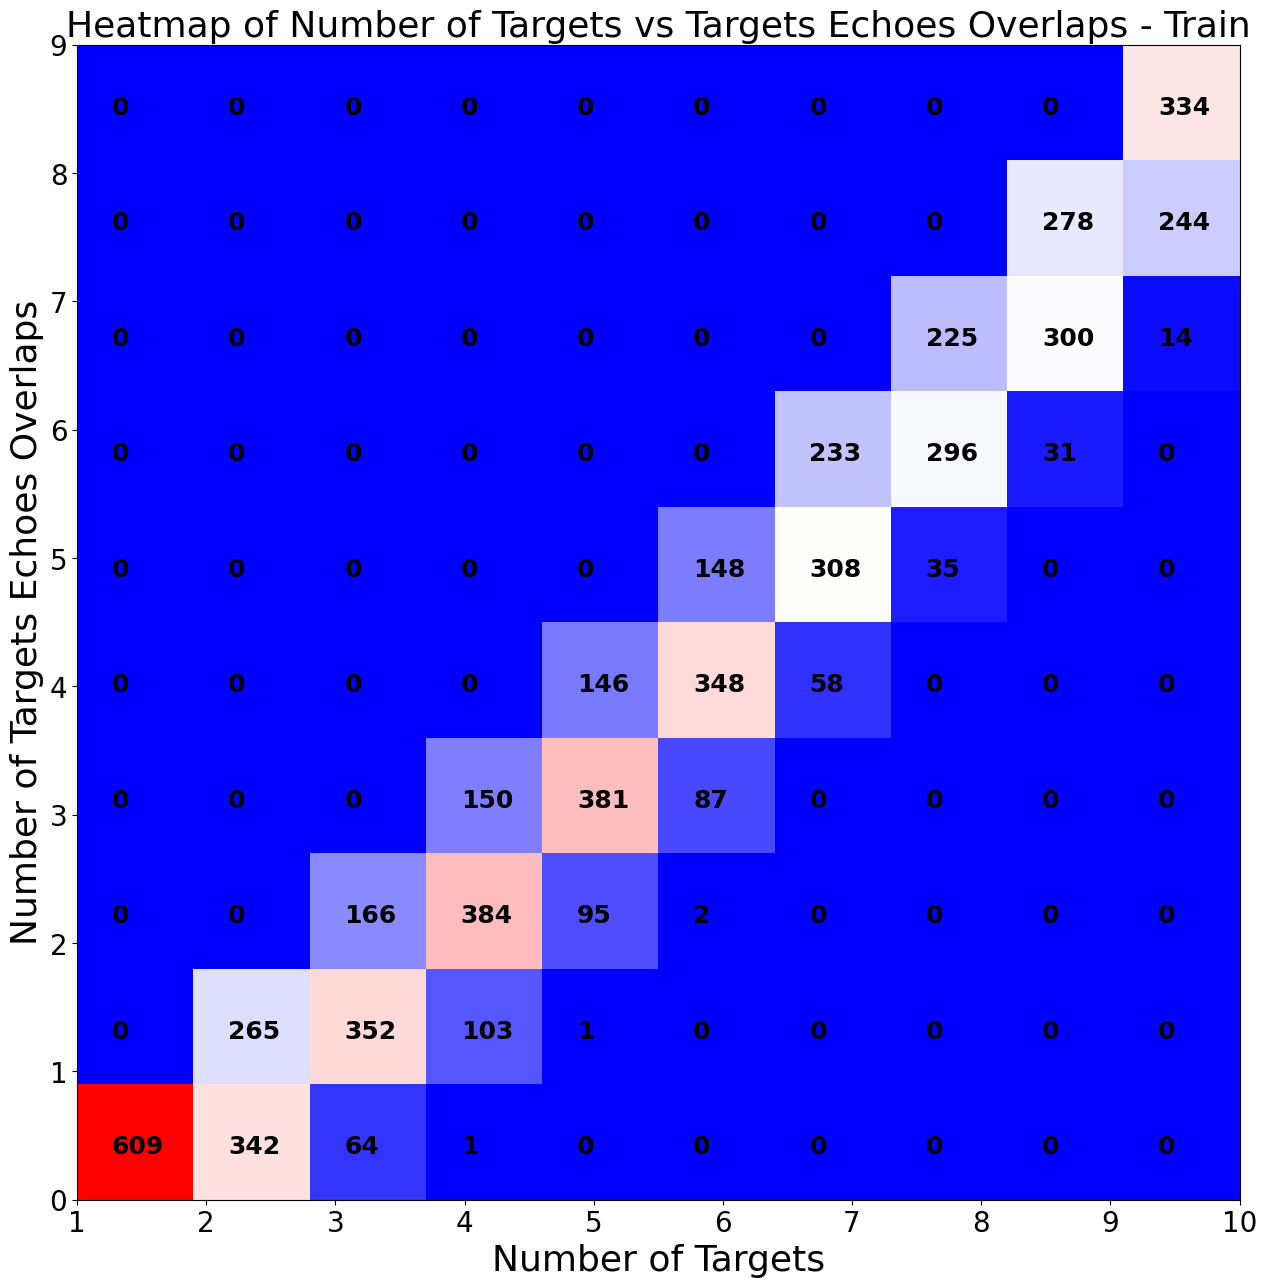

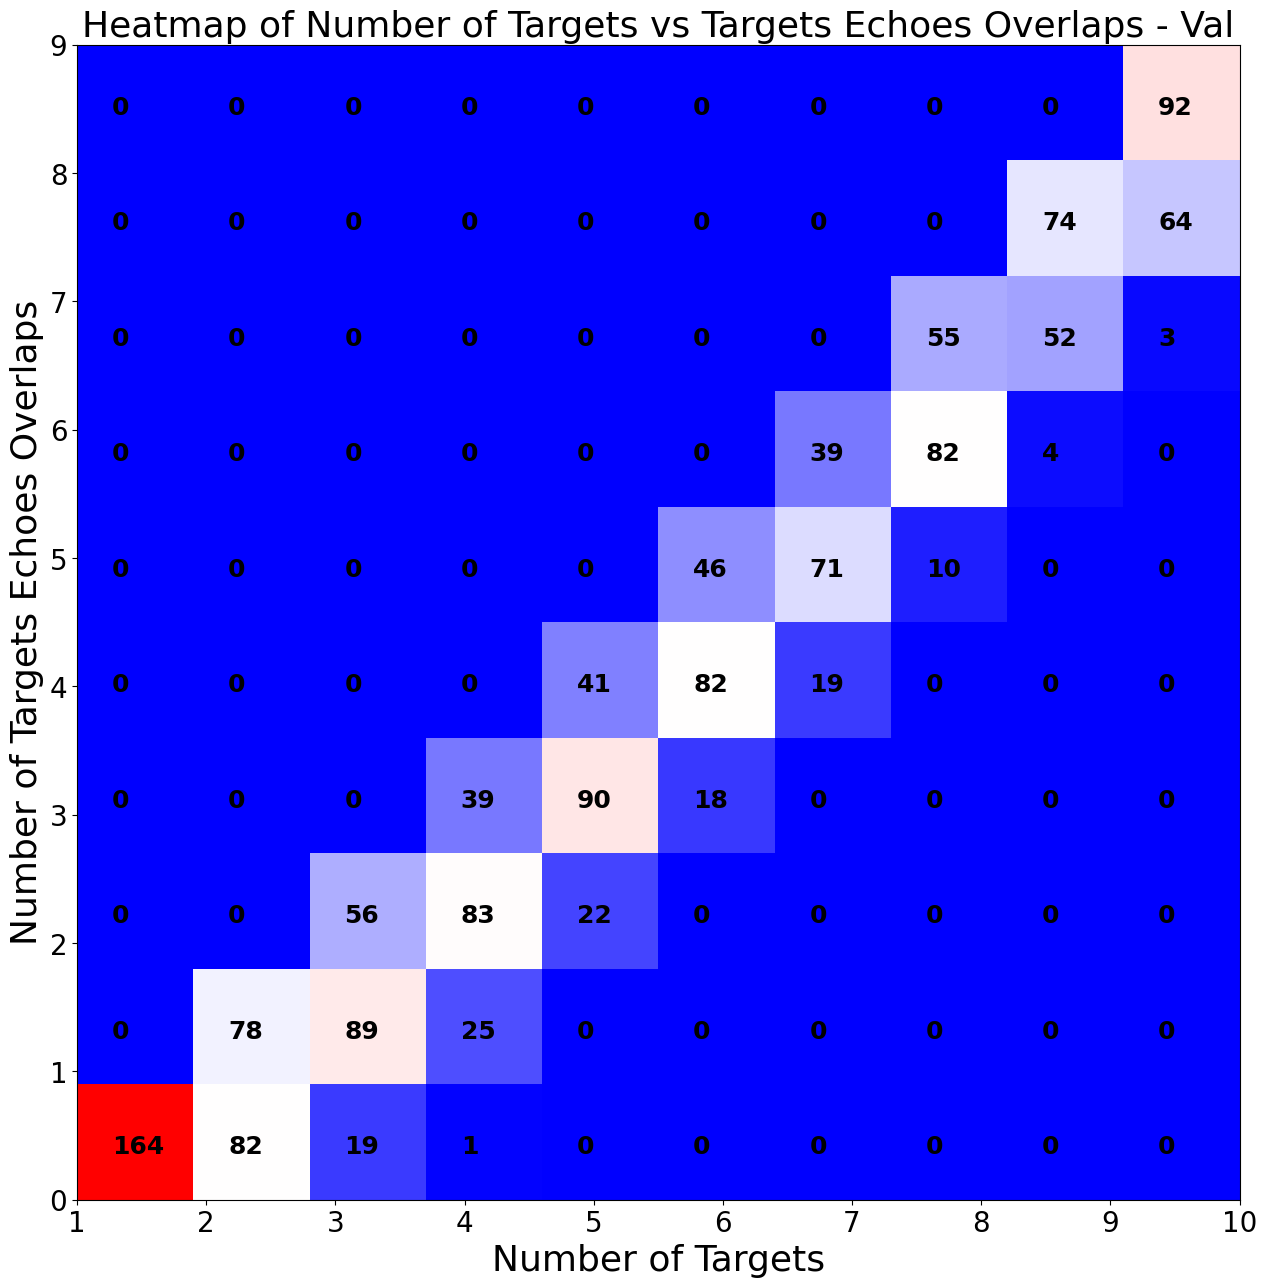

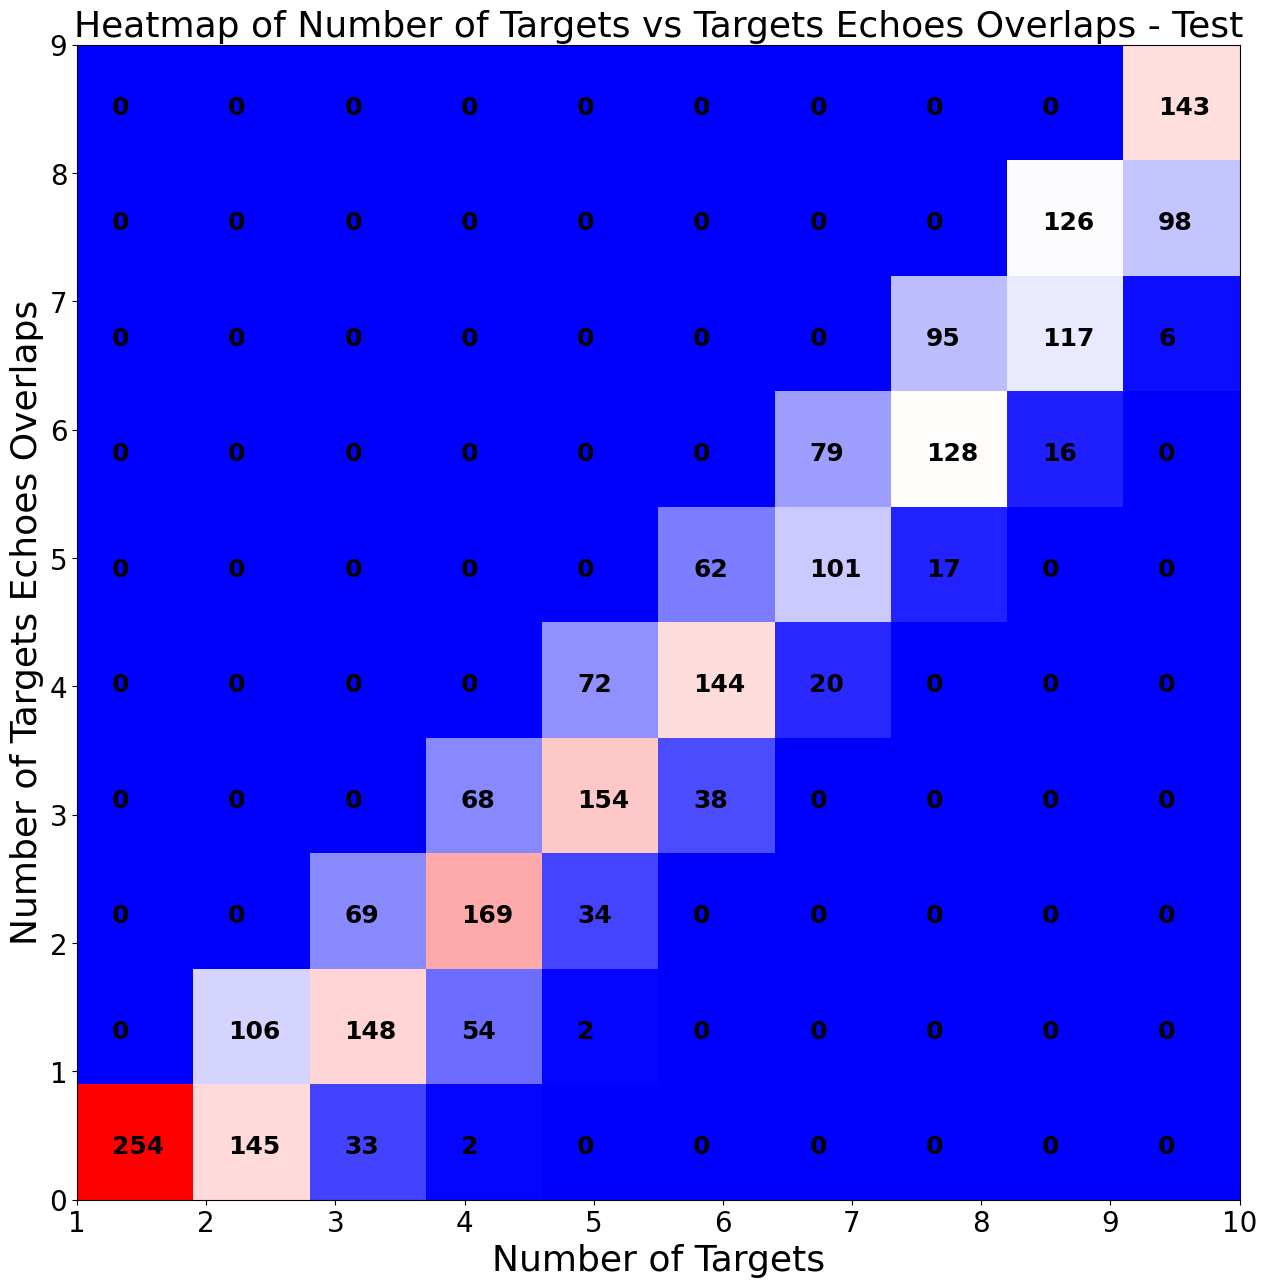

In [13]:
plt.rcParams["figure.figsize"] = (15,15)
heat_map_ranges_overlaps(train_num_ranges,train_num_overlaps,'Train')
heat_map_ranges_overlaps(val_num_ranges,val_num_overlaps,'Val')
heat_map_ranges_overlaps(test_num_ranges,test_num_overlaps,'Test')
plt.rcParams["figure.figsize"] = (15,12)

In [35]:
print(train_ranges[:10])
print(train_num_overlaps[:10])
train_overlap_ranges = [train_rs for train_rs,train_num_ol in zip(train_ranges,train_num_overlaps) if train_num_ol>0]
val_overlap_ranges = [val_rs for val_rs,val_num_ol in zip(val_ranges,val_num_overlaps) if val_num_ol>0]
test_overlap_ranges = [test_rs for test_rs,test_num_ol in zip(test_ranges,test_num_overlaps) if test_num_ol>0]
print(train_overlap_ranges[:10])

train_overlap_ranges=[rs for rs in train_overlap_ranges if np.any((rs != 0))]
val_overlap_ranges=[rs for rs in val_overlap_ranges if np.any((rs != 0))]
test_overlap_ranges=[rs for rs in test_overlap_ranges if np.any((rs != 0))]
print(train_overlap_ranges[:10])

train_overlap_dists=[rs[1:]-rs[:-1] for rs in train_overlap_ranges]
val_overlap_dists=[rs[1:]-rs[:-1] for rs in val_overlap_ranges]
test_overlap_dists=[rs[1:]-rs[:-1] for rs in test_overlap_ranges]
print(train_overlap_dists[:10])

train_overlap_dists_flat=[distance_overlap-r[0]+1e-5 for rs in train_overlap_dists for r in rs if r[0]<=distance_overlap]
val_overlap_dists_flat=[distance_overlap-r[0]+1e-5 for rs in val_overlap_dists for r in rs if r[0]<=distance_overlap]
test_overlap_dists_flat=[distance_overlap-r[0]+1e-5 for rs in test_overlap_dists for r in rs if r[0]<=distance_overlap]
print(train_overlap_dists_flat[:10])


[array([[1.5498 ],
       [1.79402],
       [2.21955],
       [2.75803]]), array([[1.34789],
       [1.37205]]), array([[1.22271],
       [1.27371],
       [1.53625],
       [1.62964],
       [1.71125],
       [1.78129],
       [1.83649],
       [2.00823],
       [2.67543],
       [2.74039]]), array([[1.13156],
       [2.1492 ]]), array([[1.16943],
       [1.67098],
       [2.35668],
       [2.44652],
       [2.48357],
       [2.75392],
       [2.97088]]), array([[1.22165],
       [1.68561],
       [1.84938],
       [2.10179],
       [2.36445],
       [2.93711],
       [2.98938]]), array([[1.11394],
       [1.2524 ],
       [1.43818],
       [1.67957],
       [2.01859],
       [2.11471],
       [2.27017],
       [2.79509],
       [2.81254]]), array([[1.80802],
       [1.92696],
       [2.13515],
       [2.22356],
       [2.22584],
       [2.35891],
       [2.54298],
       [2.63427],
       [2.74837],
       [2.97616]]), array([[1.408  ],
       [1.43691],
       [1.70513],
       [2.6

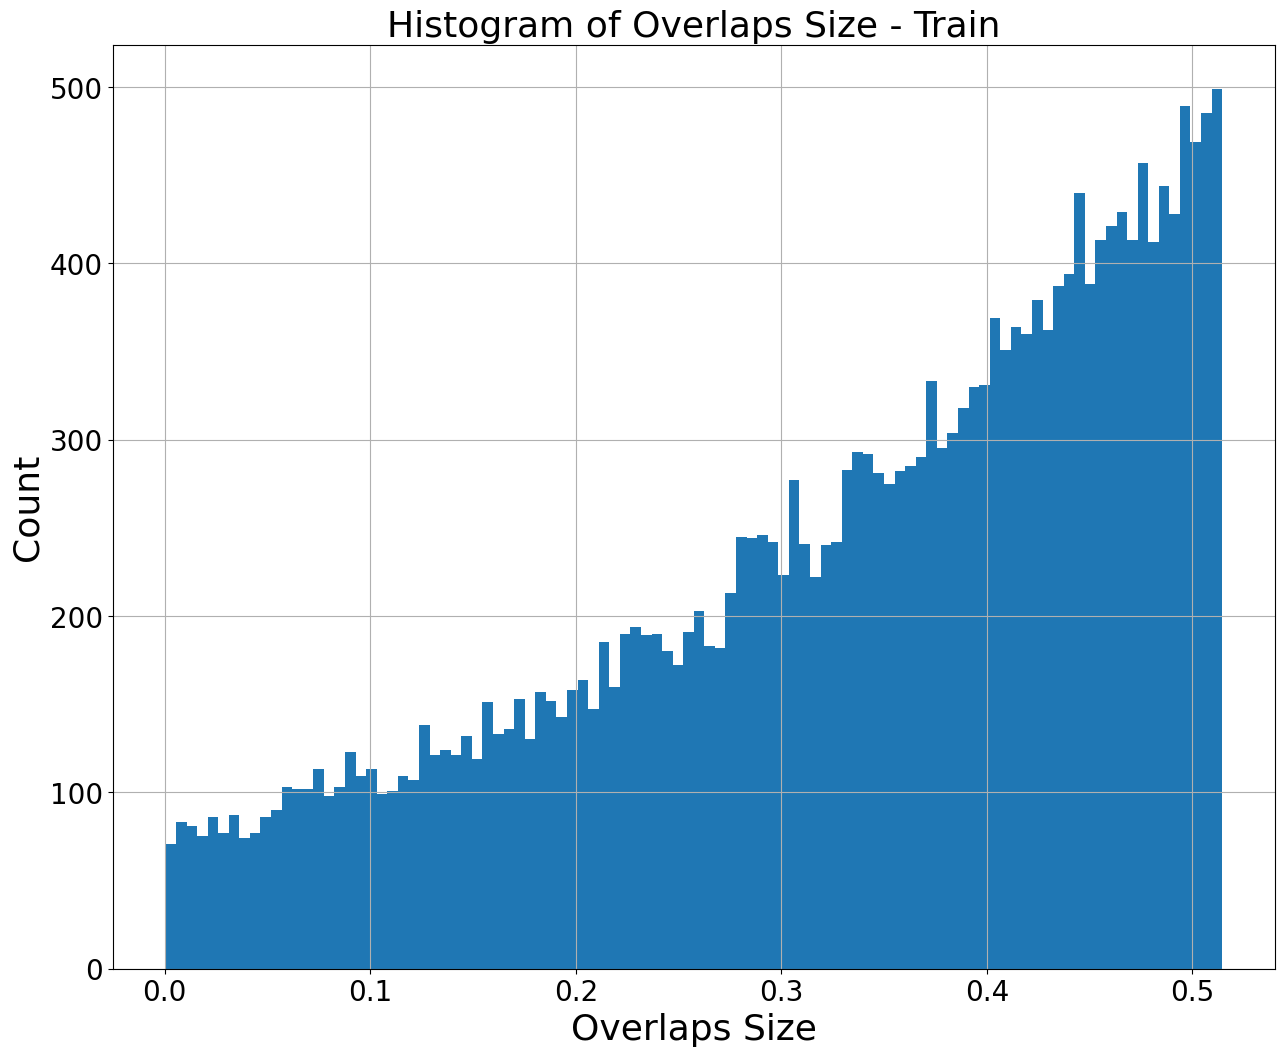

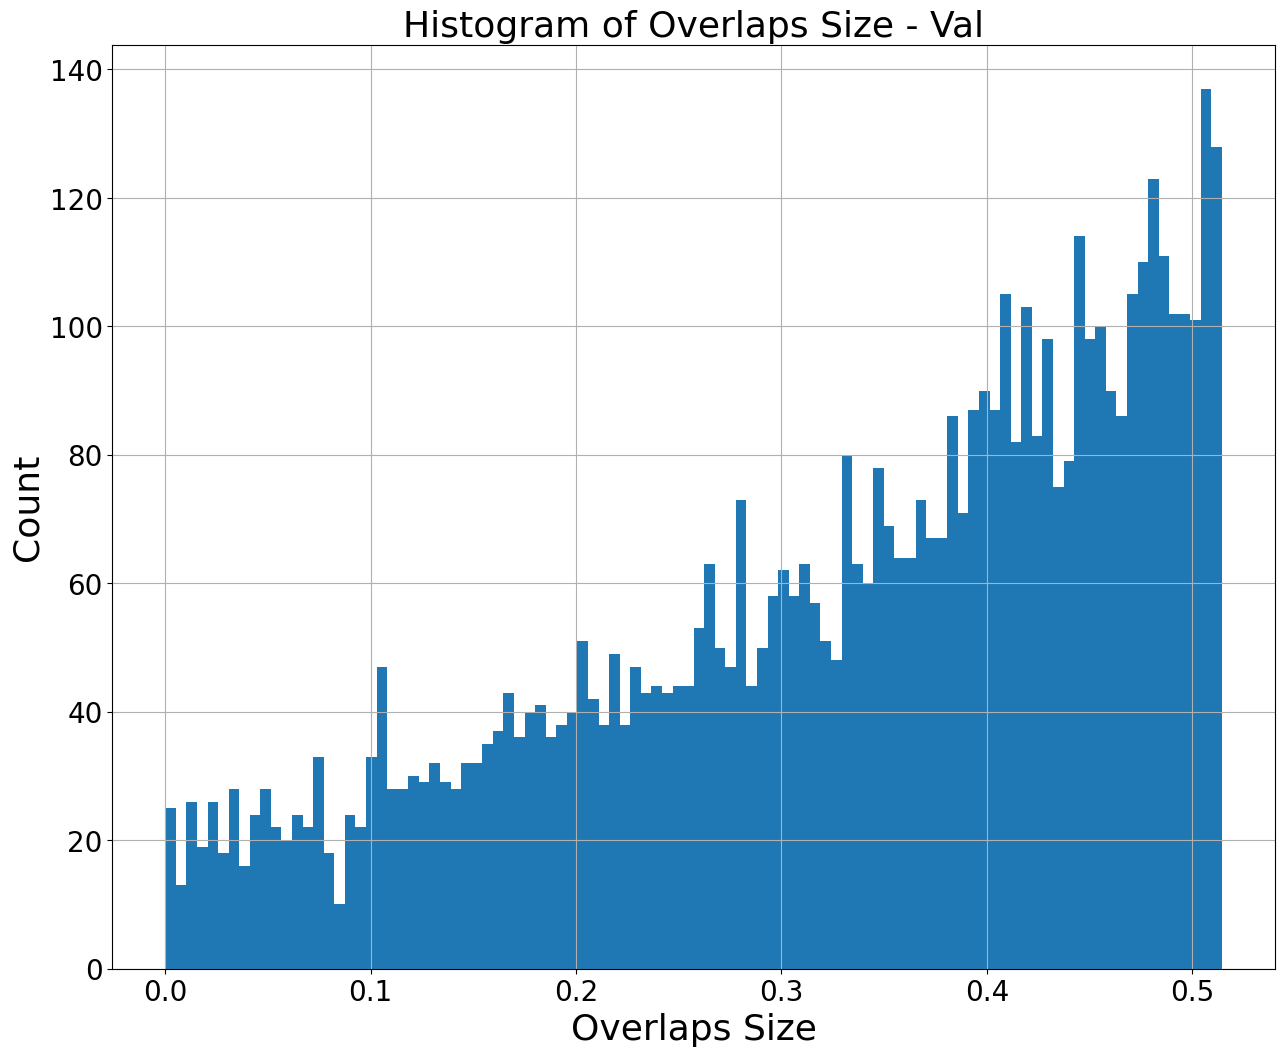

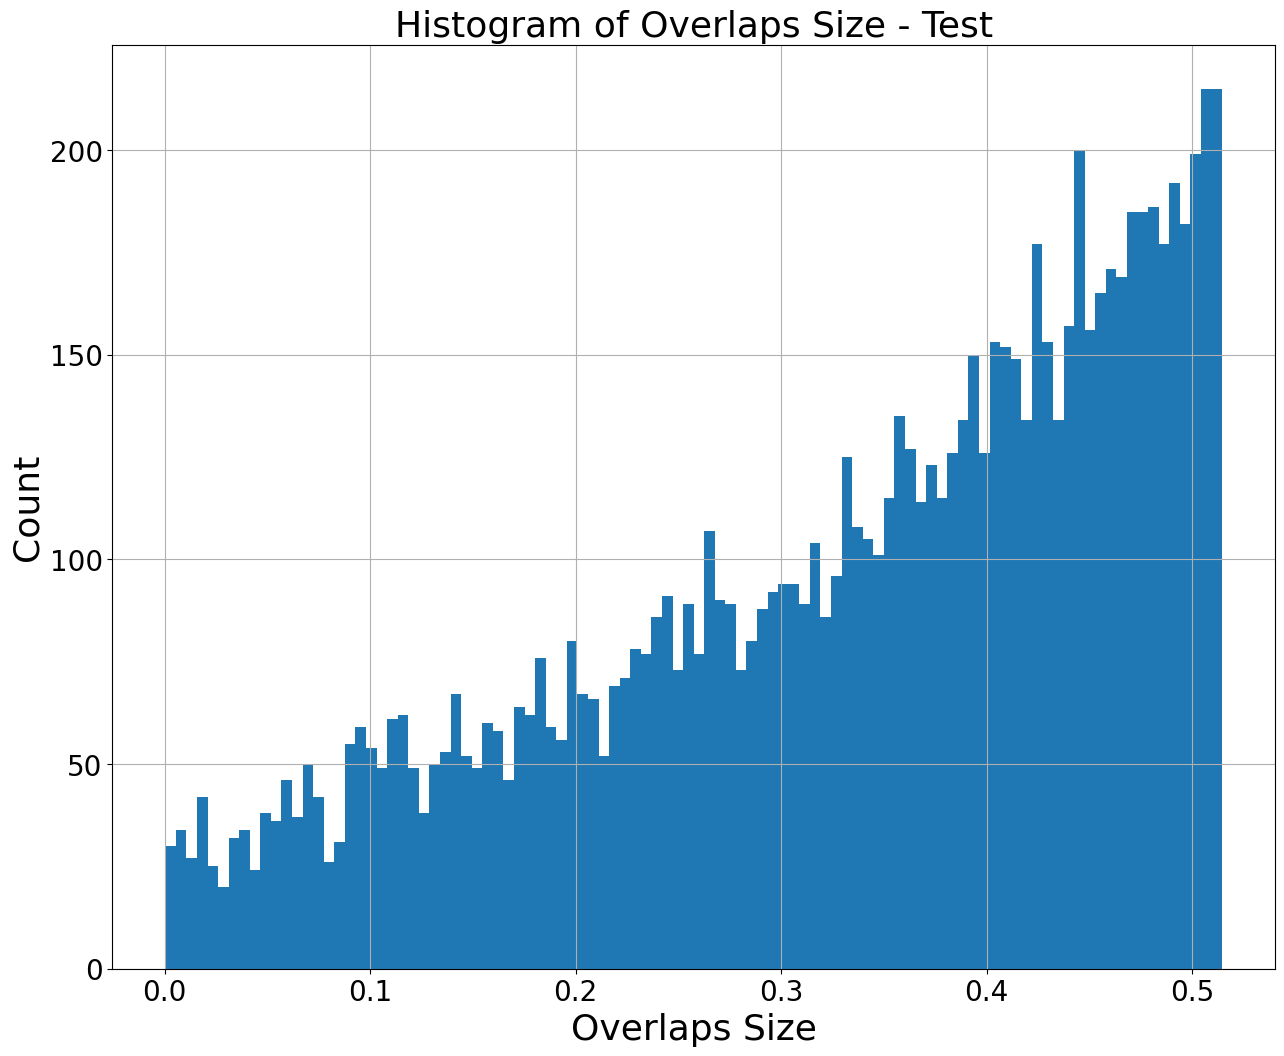

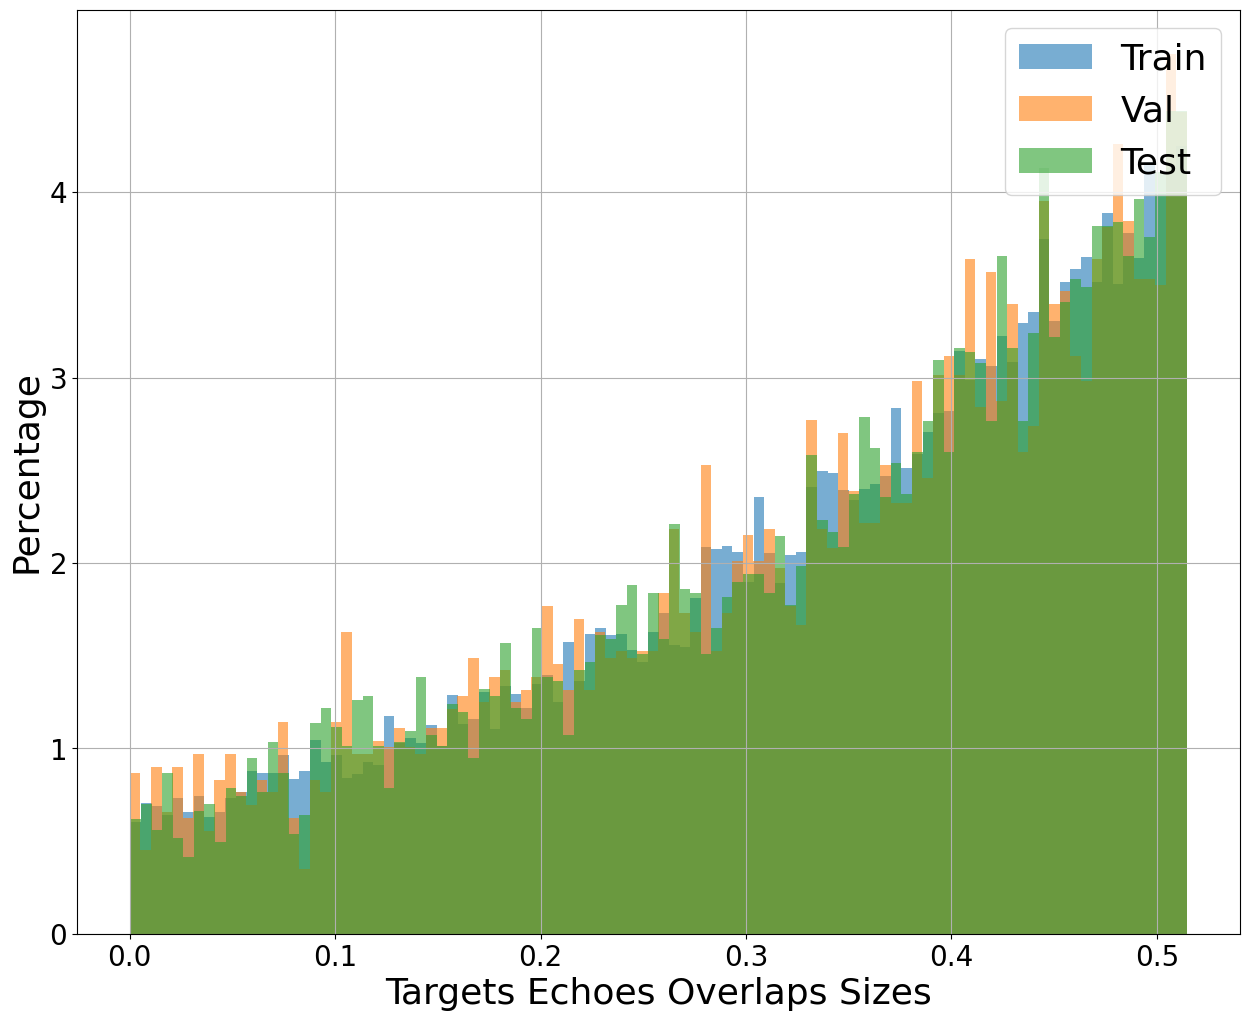

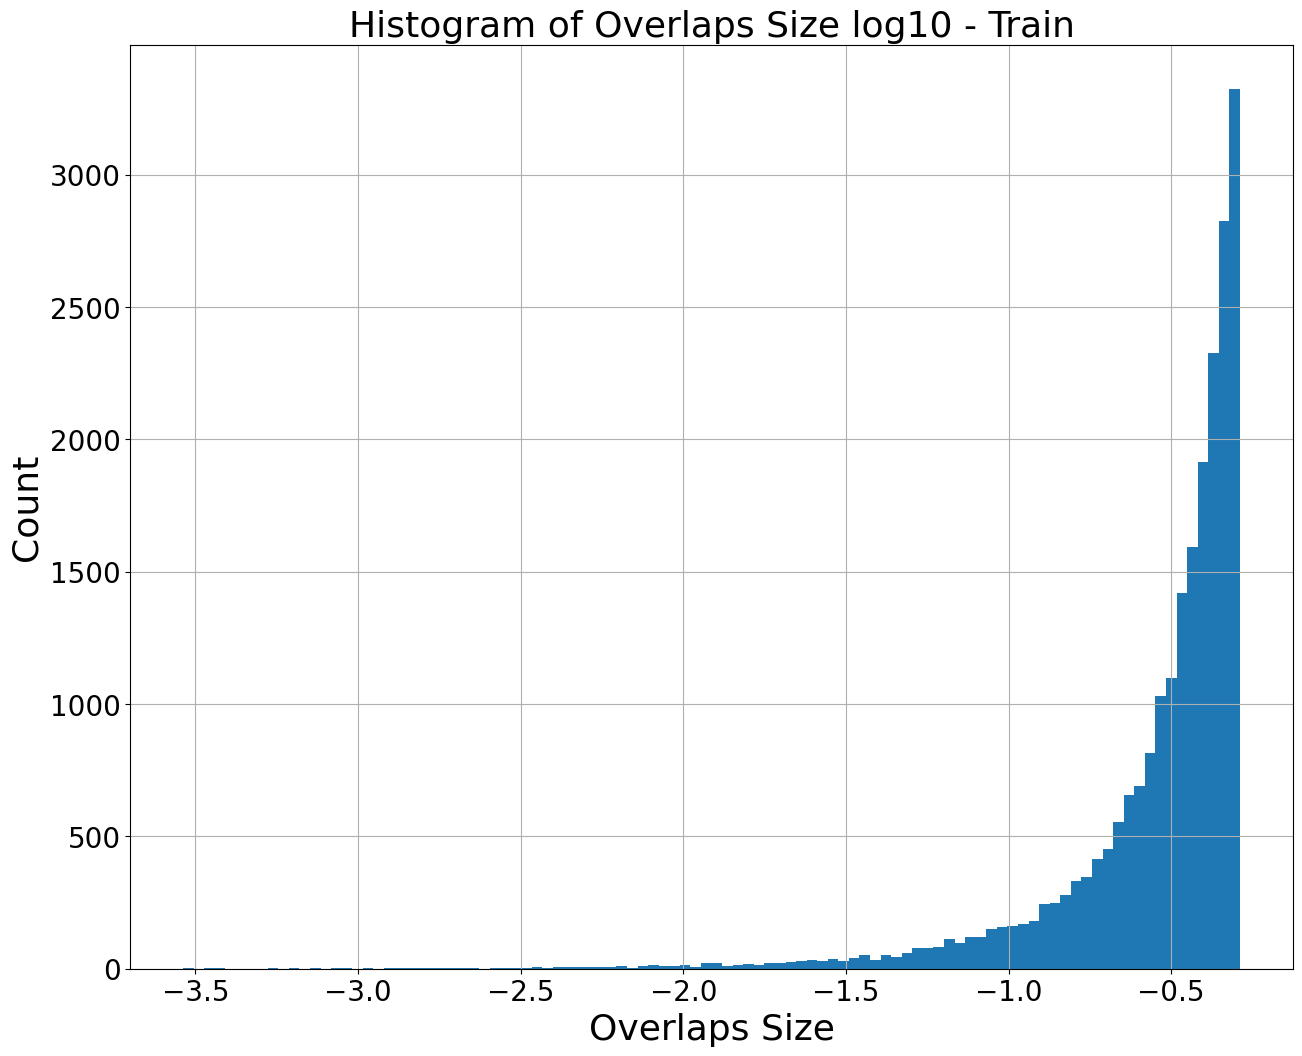

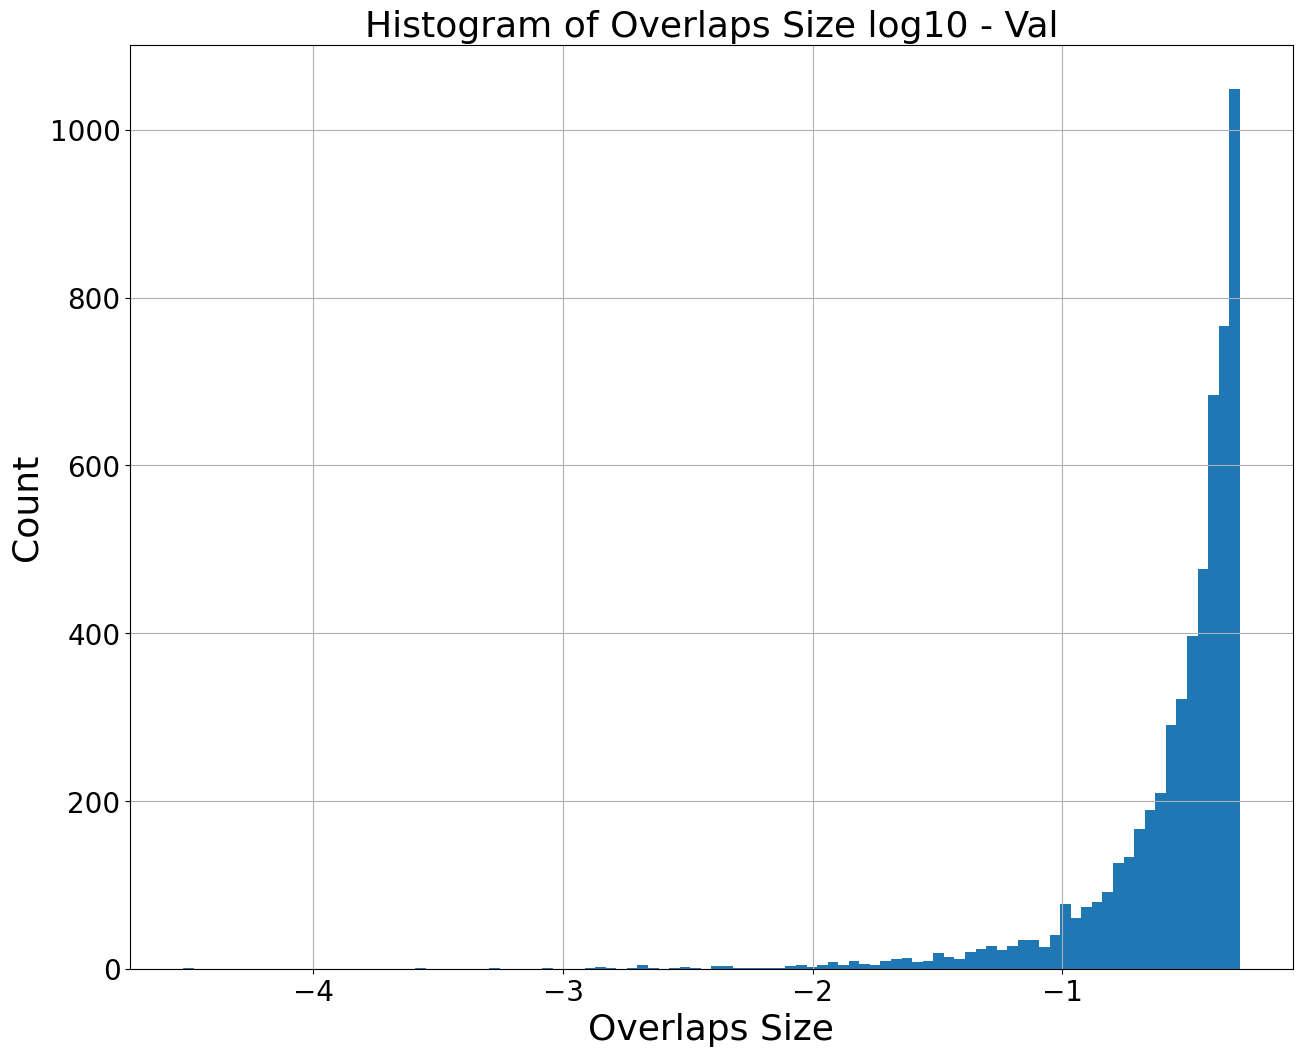

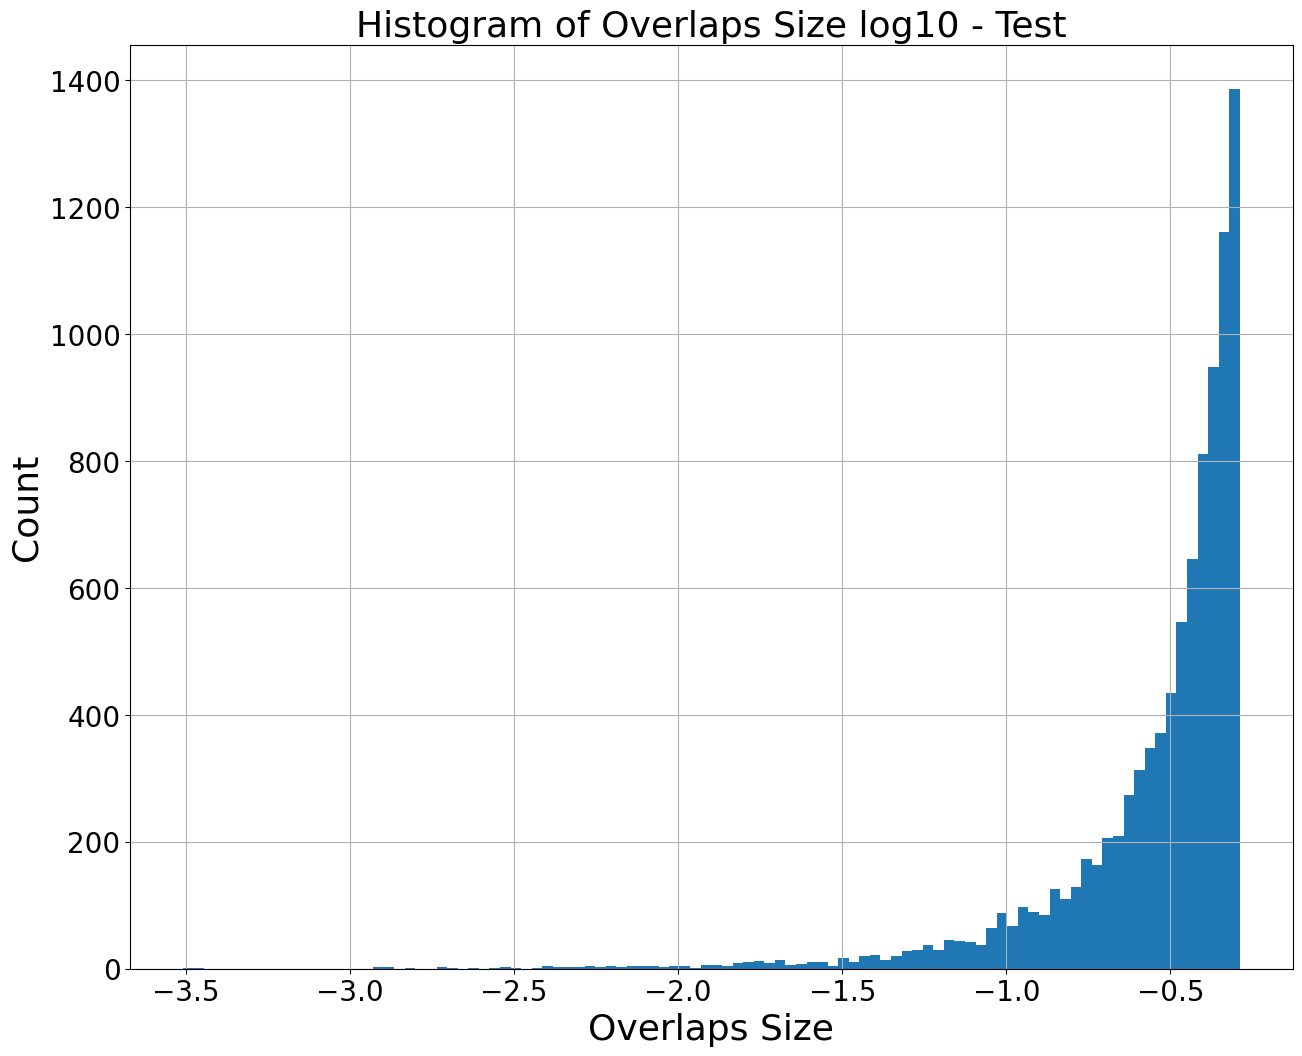

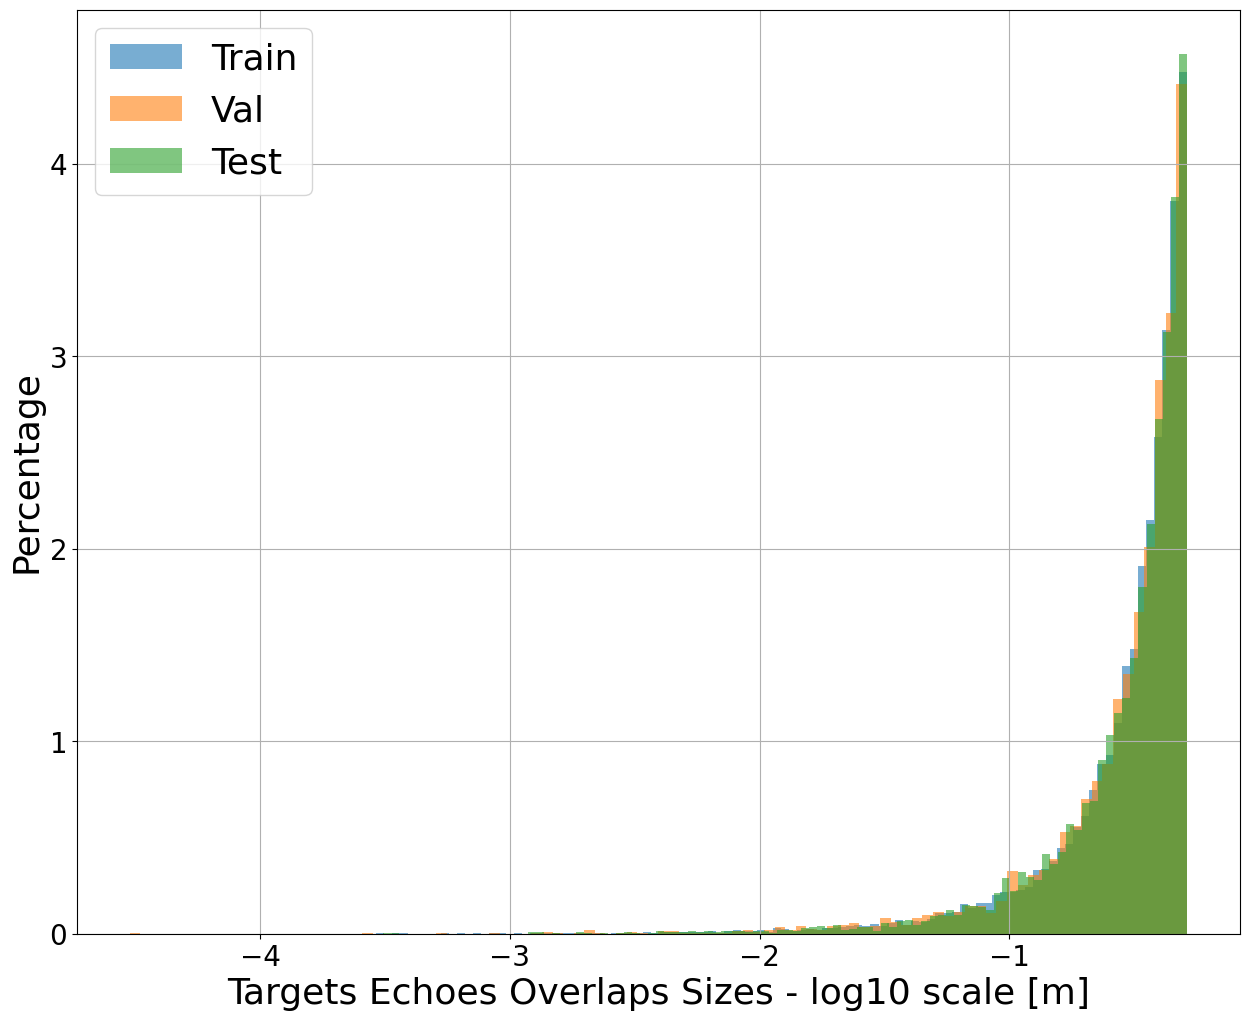

In [36]:
bins_num=100
density=False

plot_hist(train_overlap_dists_flat,bins_num,density,'Overlaps Size','Count','Overlaps Size - Train')
plot_hist(val_overlap_dists_flat,bins_num,density,'Overlaps Size','Count','Overlaps Size - Val')
plot_hist(test_overlap_dists_flat,bins_num,density,'Overlaps Size','Count','Overlaps Size - Test')

plot_hist_all(train_overlap_dists_flat,val_overlap_dists_flat,test_overlap_dists_flat,bins_num,'Targets Echoes Overlaps Sizes','Targets Echoes Overlaps Sizes')

plot_hist(np.log10(train_overlap_dists_flat),bins_num,density,'Overlaps Size','Count','Overlaps Size log10 - Train')
plot_hist(np.log10(val_overlap_dists_flat),bins_num,density,'Overlaps Size','Count','Overlaps Size log10 - Val')
plot_hist(np.log10(test_overlap_dists_flat),bins_num,density,'Overlaps Size','Count','Overlaps Size log10 - Test')

plot_hist_all(np.log10(train_overlap_dists_flat),np.log10(val_overlap_dists_flat),np.log10(test_overlap_dists_flat),bins_num,'Targets Echoes Overlaps Sizes - log10 scale [m]','Targets Echoes Overlaps Sizes - log10 scale',loc='upper left')

In [37]:
def overlaps_in_sample(ar_ranges,distance_overlap):
  num_overlaps_cumulative=[]
  for rs in ar_ranges:
    ar=np.array([])
    rs=np.array(rs[:,0])
    for i in range(len(rs)-1):
      r=rs[i]
      num_ranges_in_delay=sum(r_temp>=r and r_temp<=r+distance_overlap for r_temp in rs)
      ar=np.append(ar,num_ranges_in_delay)
    if len(rs)==1:
      ar=np.append(ar,1)
    num_overlaps_cumulative.append(ar)

  return num_overlaps_cumulative

In [38]:
train_num_overlaps_cumulative=overlaps_in_sample(train_ranges,distance_overlap)
val_num_overlaps_cumulative=overlaps_in_sample(val_ranges,distance_overlap)
test_num_overlaps_cumulative=overlaps_in_sample(test_ranges,distance_overlap)

print(train_num_overlaps_cumulative[:10])

train_num_overlaps_cumulative_flat=[noc for nocs in train_num_overlaps_cumulative for noc in nocs]
val_num_overlaps_cumulative_flat=[noc for nocs in val_num_overlaps_cumulative for noc in nocs]
test_num_overlaps_cumulative_flat=[noc for nocs in test_num_overlaps_cumulative for noc in nocs]

print(train_num_overlaps_cumulative_flat[:10])

[array([2., 2., 1.]), array([2.]), array([5., 5., 6., 5., 4., 3., 2., 1., 2.]), array([1.]), array([2., 1., 4., 3., 3., 2.]), array([2., 3., 2., 2., 1., 2.]), array([3., 3., 2., 3., 3., 2., 1., 2.]), array([5., 5., 6., 5., 4., 4., 4., 3., 2.]), array([3., 2., 1., 2.]), array([1., 3., 3., 2.])]
[2.0, 2.0, 1.0, 2.0, 5.0, 5.0, 6.0, 5.0, 4.0, 3.0]


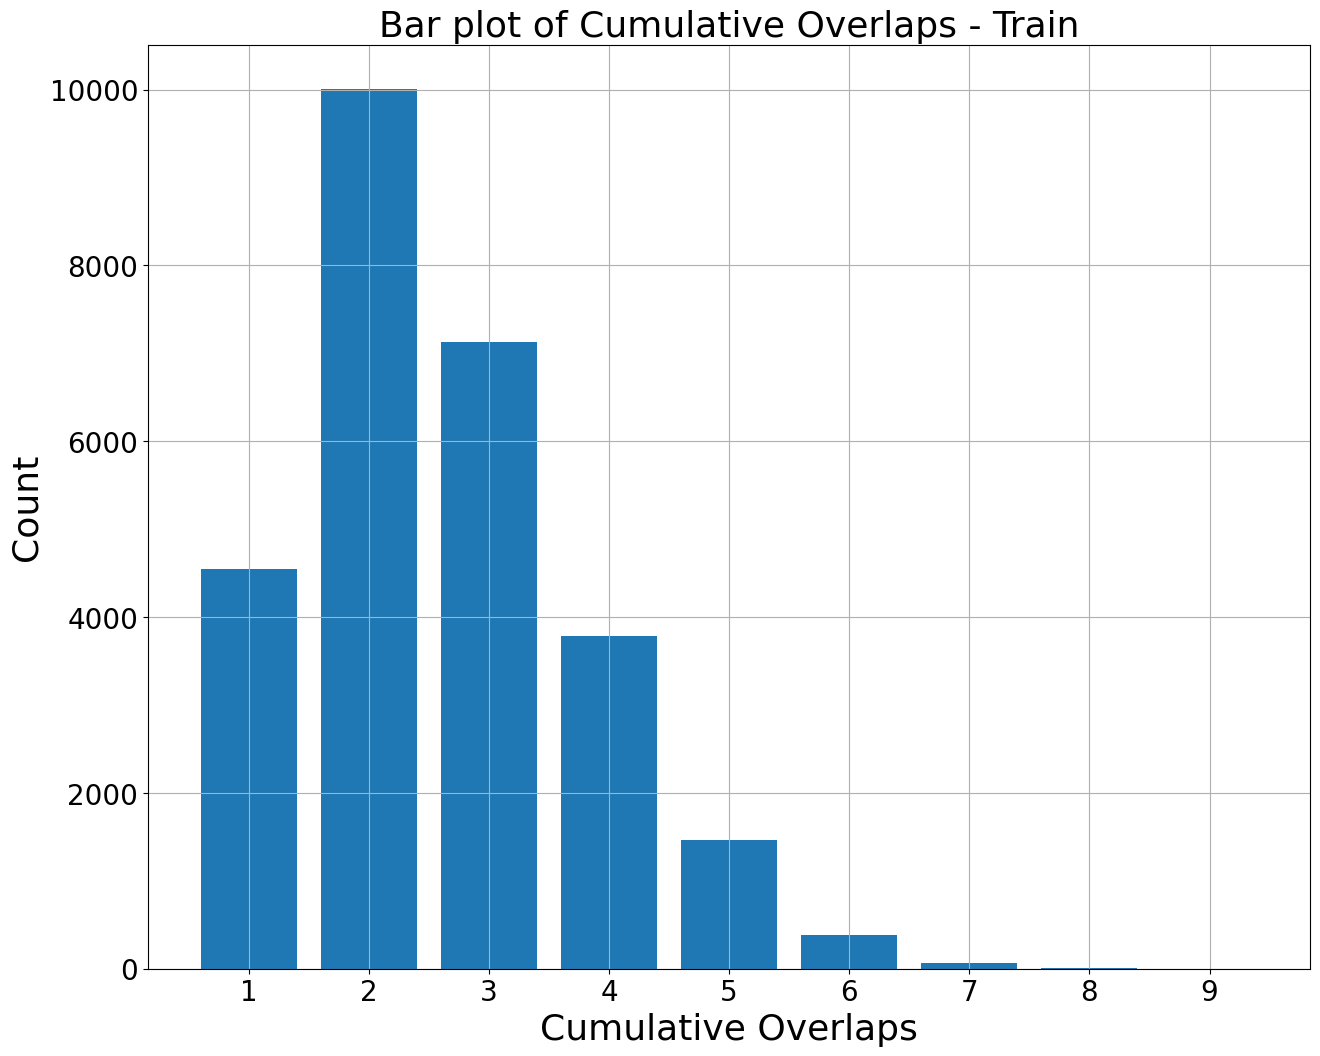

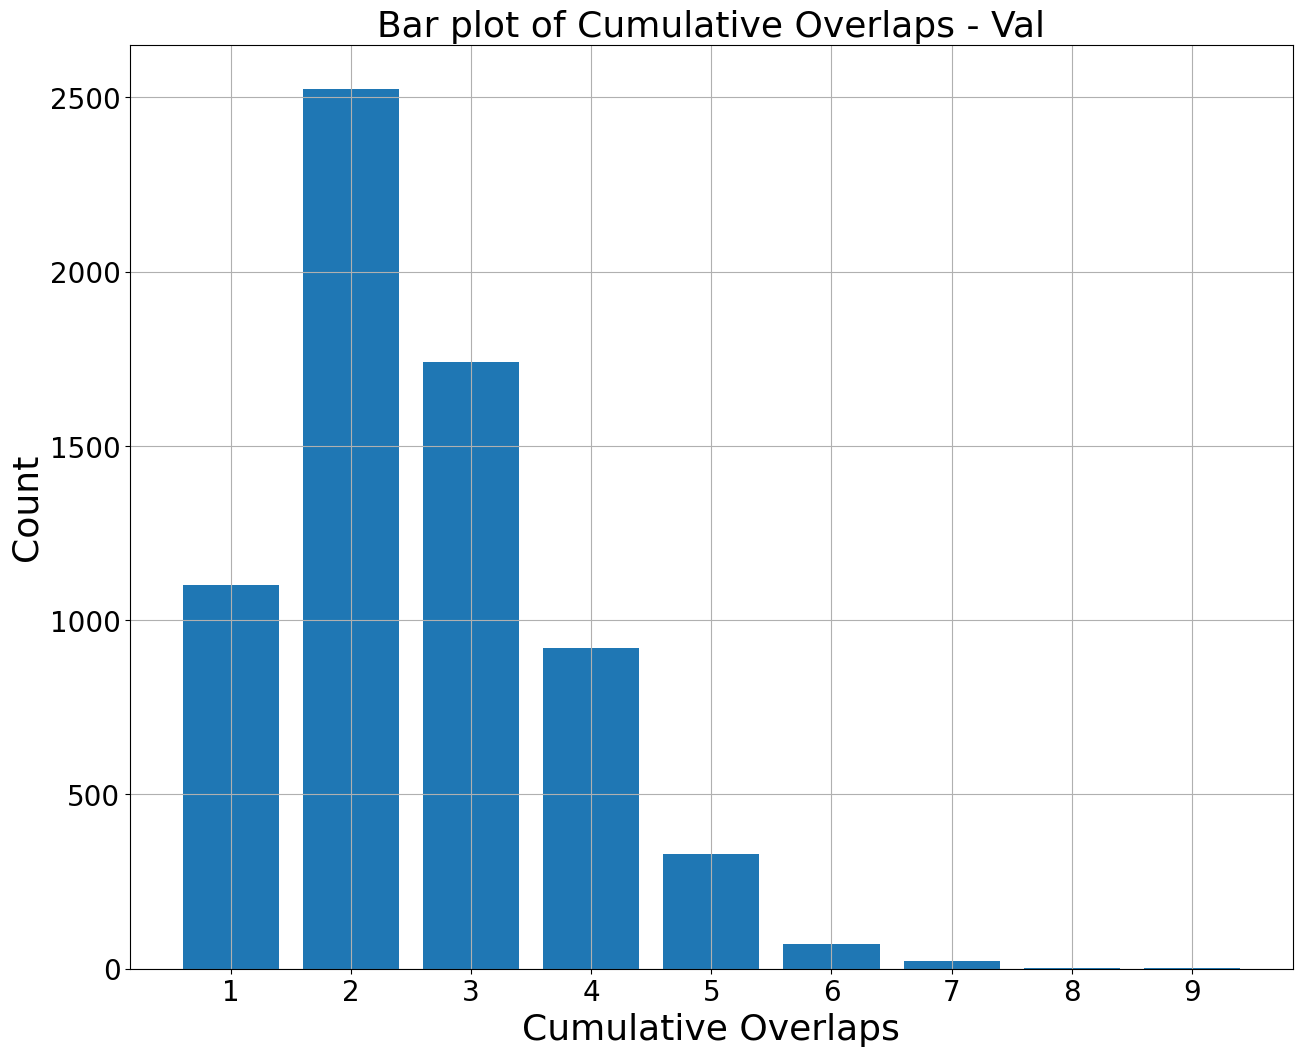

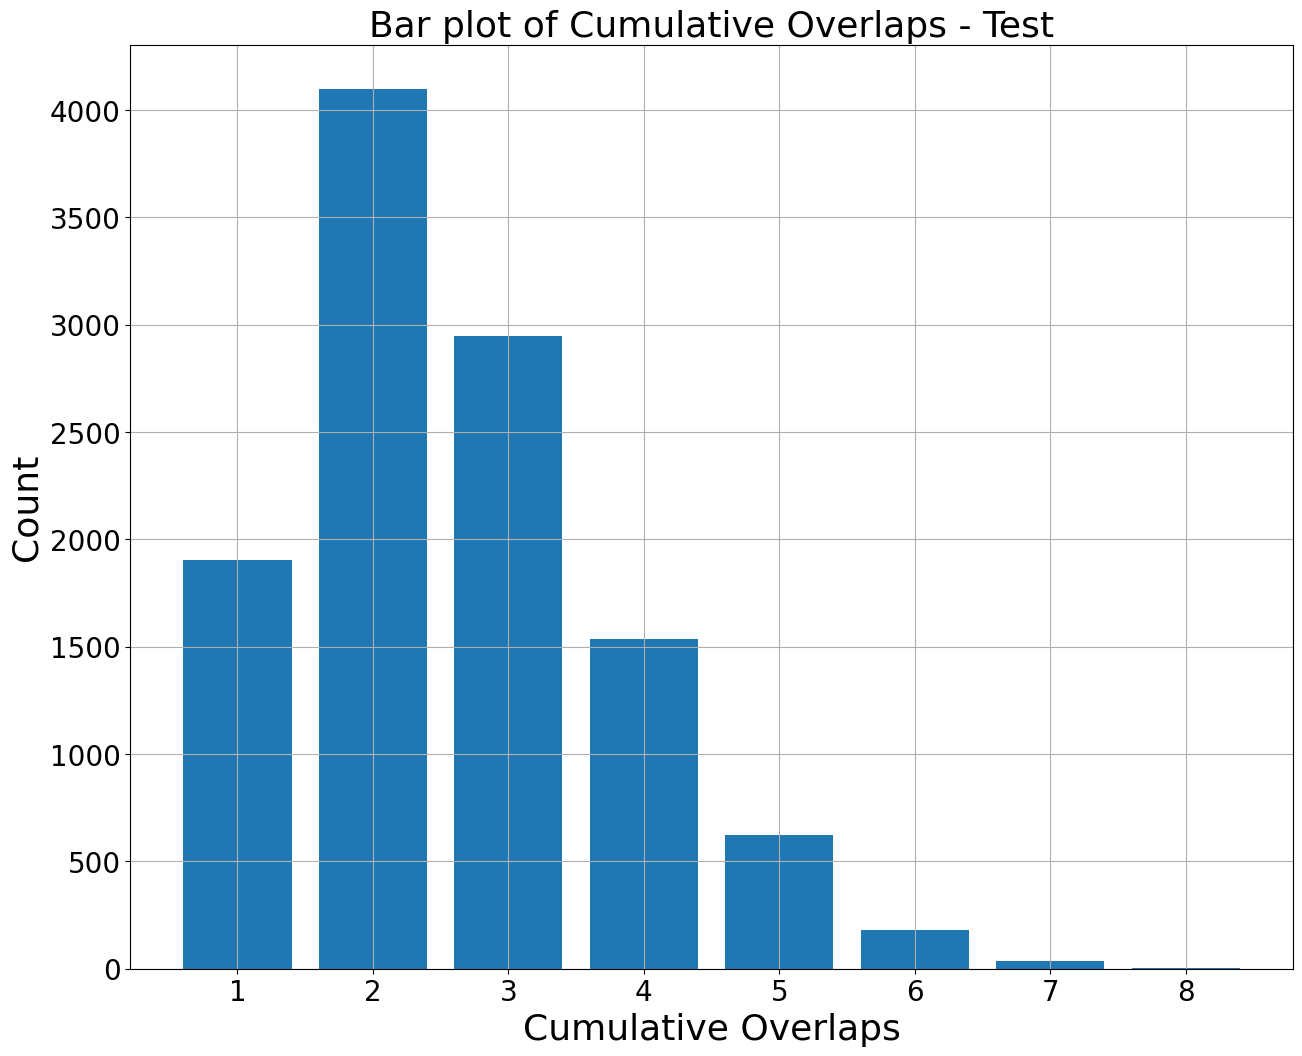

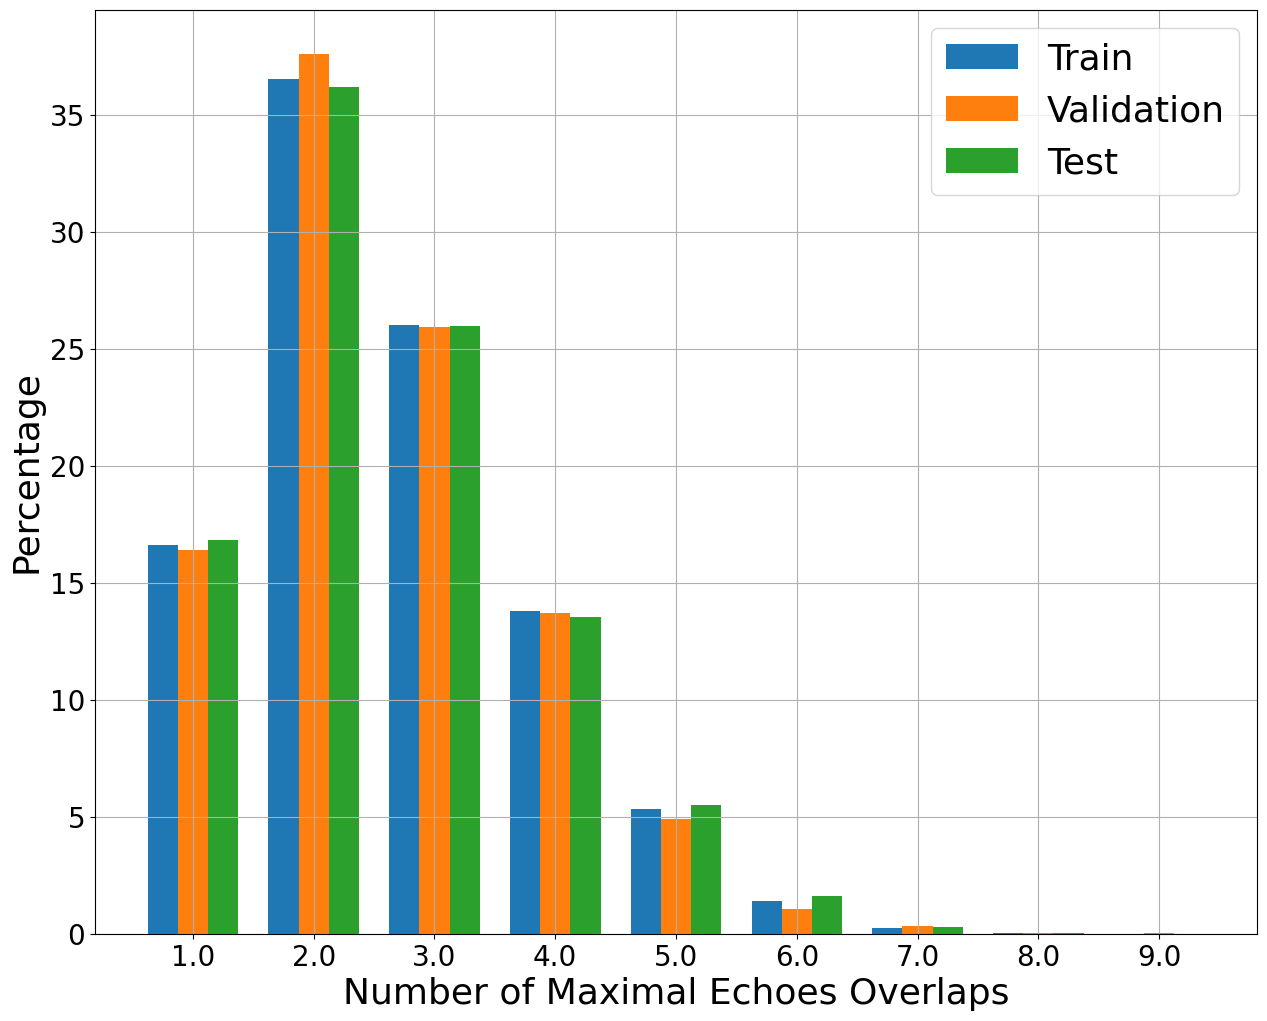

In [39]:
bins_num=int(np.max([np.max(train_num_overlaps_cumulative_flat),
                 np.max(val_num_overlaps_cumulative_flat),
                 np.max(test_num_overlaps_cumulative_flat)]))
density=False

plot_bar(train_num_overlaps_cumulative_flat,'Cumulative Overlaps','Count','Cumulative Overlaps - Train')
plot_bar(val_num_overlaps_cumulative_flat,'Cumulative Overlaps','Count','Cumulative Overlaps - Val')
plot_bar(test_num_overlaps_cumulative_flat,'Cumulative Overlaps','Count','Cumulative Overlaps - Test')

plot_bar_all(train_num_overlaps_cumulative_flat,val_num_overlaps_cumulative_flat,
             test_num_overlaps_cumulative_flat,'Number of Maximal Echoes Overlaps','Number of Maximal Echoes Overlaps',loc='upper right')

## Flat Ranges

In [40]:
train_ranges_flat=[r[0] for rs in train_ranges for r in rs]
val_ranges_flat=[r[0] for rs in val_ranges for r in rs]
test_ranges_flat=[r[0] for rs in test_ranges for r in rs]

print(train_ranges_flat)

[1.5498, 1.79402, 2.21955, 2.75803, 1.34789, 1.37205, 1.22271, 1.27371, 1.53625, 1.62964, 1.71125, 1.78129, 1.83649, 2.00823, 2.67543, 2.74039, 1.13156, 2.1492, 1.16943, 1.67098, 2.35668, 2.44652, 2.48357, 2.75392, 2.97088, 1.22165, 1.68561, 1.84938, 2.10179, 2.36445, 2.93711, 2.98938, 1.11394, 1.2524, 1.43818, 1.67957, 2.01859, 2.11471, 2.27017, 2.79509, 2.81254, 1.80802, 1.92696, 2.13515, 2.22356, 2.22584, 2.35891, 2.54298, 2.63427, 2.74837, 2.97616, 1.408, 1.43691, 1.70513, 2.60411, 2.83982, 1.37337, 2.34375, 2.42305, 2.621, 2.86599, 1.17453, 1.42693, 1.69913, 1.94757, 2.03963, 2.09389, 2.58323, 2.7048, 2.86559, 1.48398, 1.59347, 2.26928, 1.20588, 1.63284, 2.09119, 2.51797, 2.56411, 2.81632, 1.09228, 1.18544, 1.28655, 1.47025, 1.60054, 1.95426, 2.39268, 2.46085, 2.76486, 2.79762, 1.46298, 2.98121, 1.11165, 1.44391, 1.53513, 1.60066, 1.8247, 2.81162, 2.91177, 2.91426, 1.3422, 1.40675, 1.53568, 1.63295, 1.94866, 2.82815, 1.81543, 1.91434, 1.06974, 1.20283, 1.67523, 1.86158, 2.06003, 2

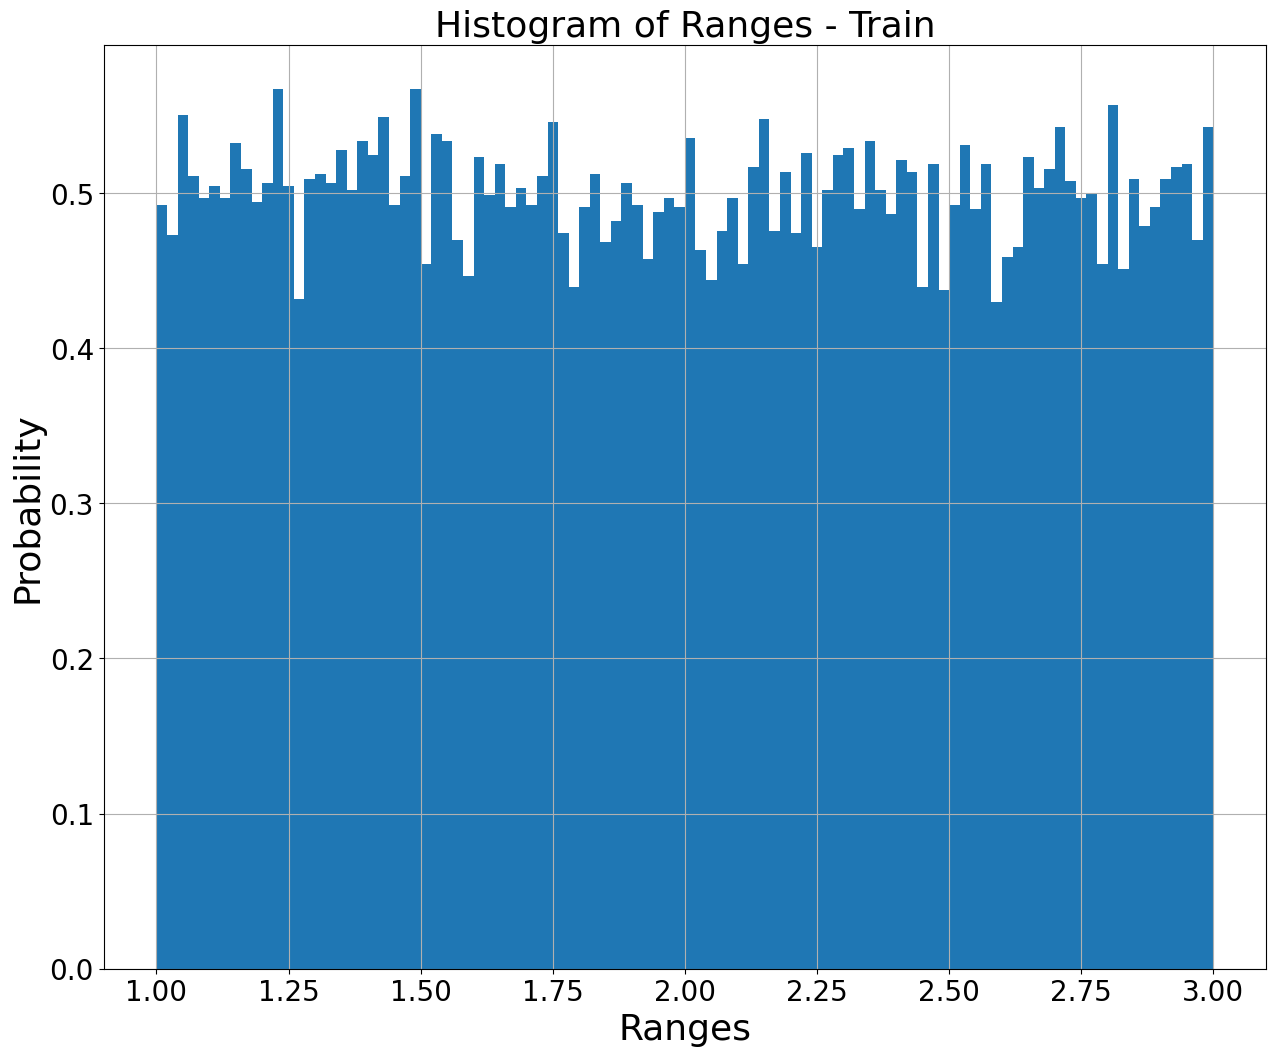

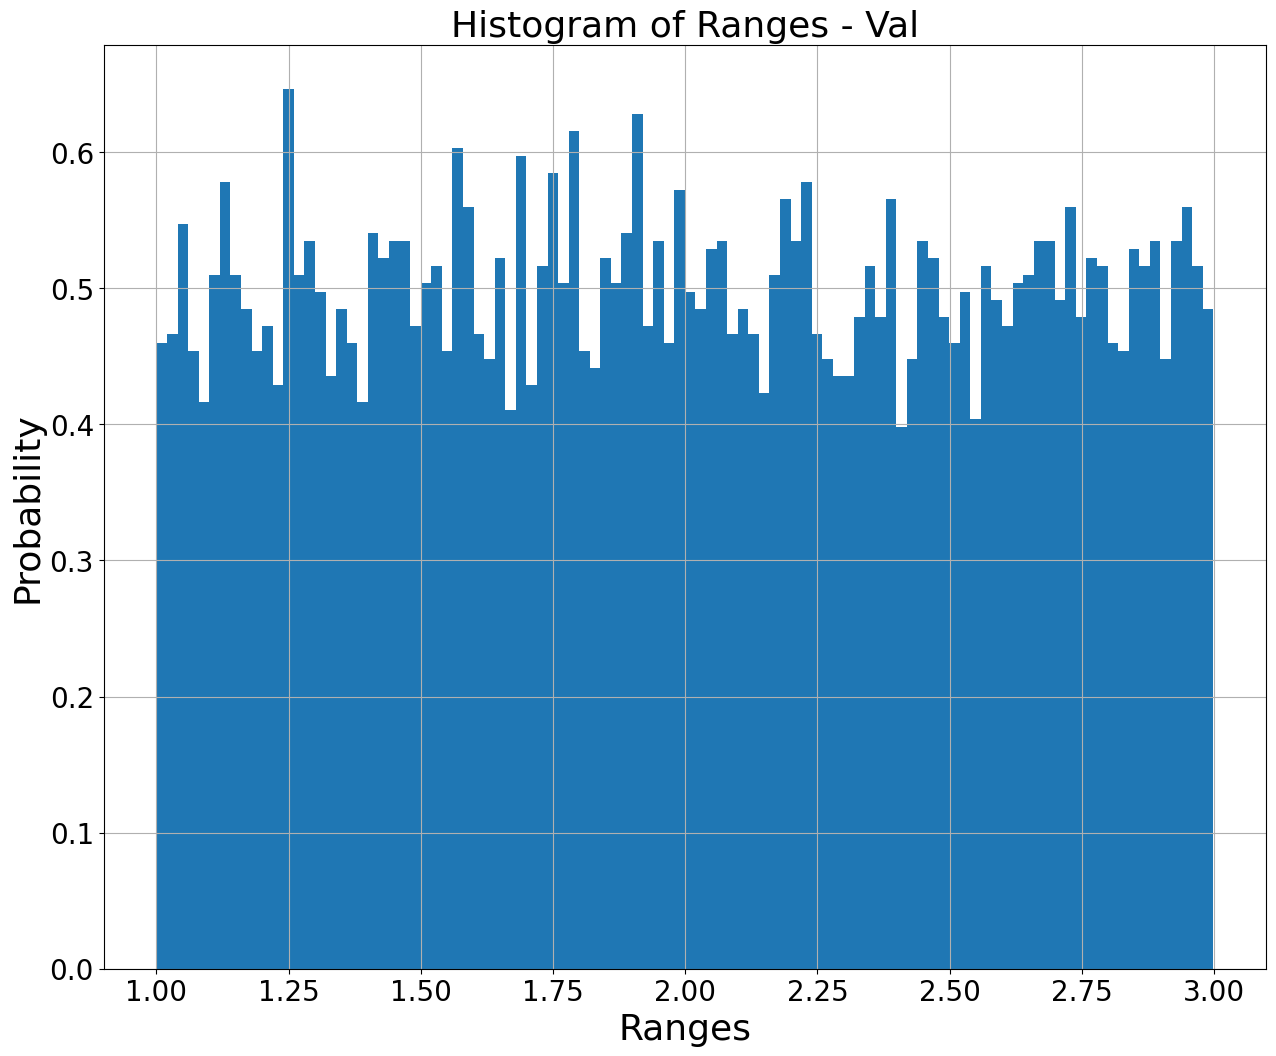

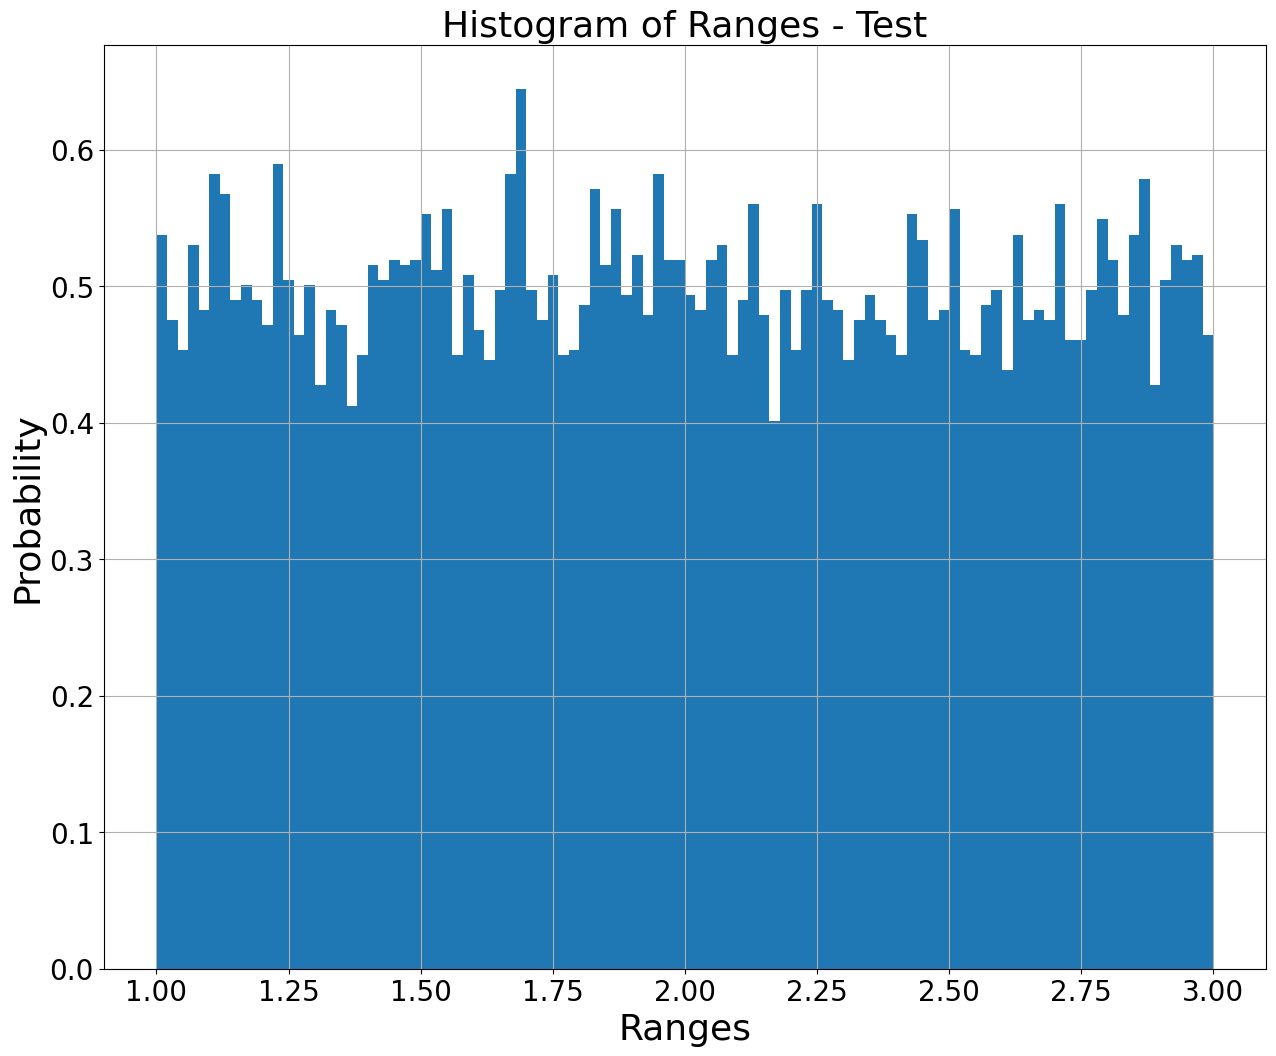

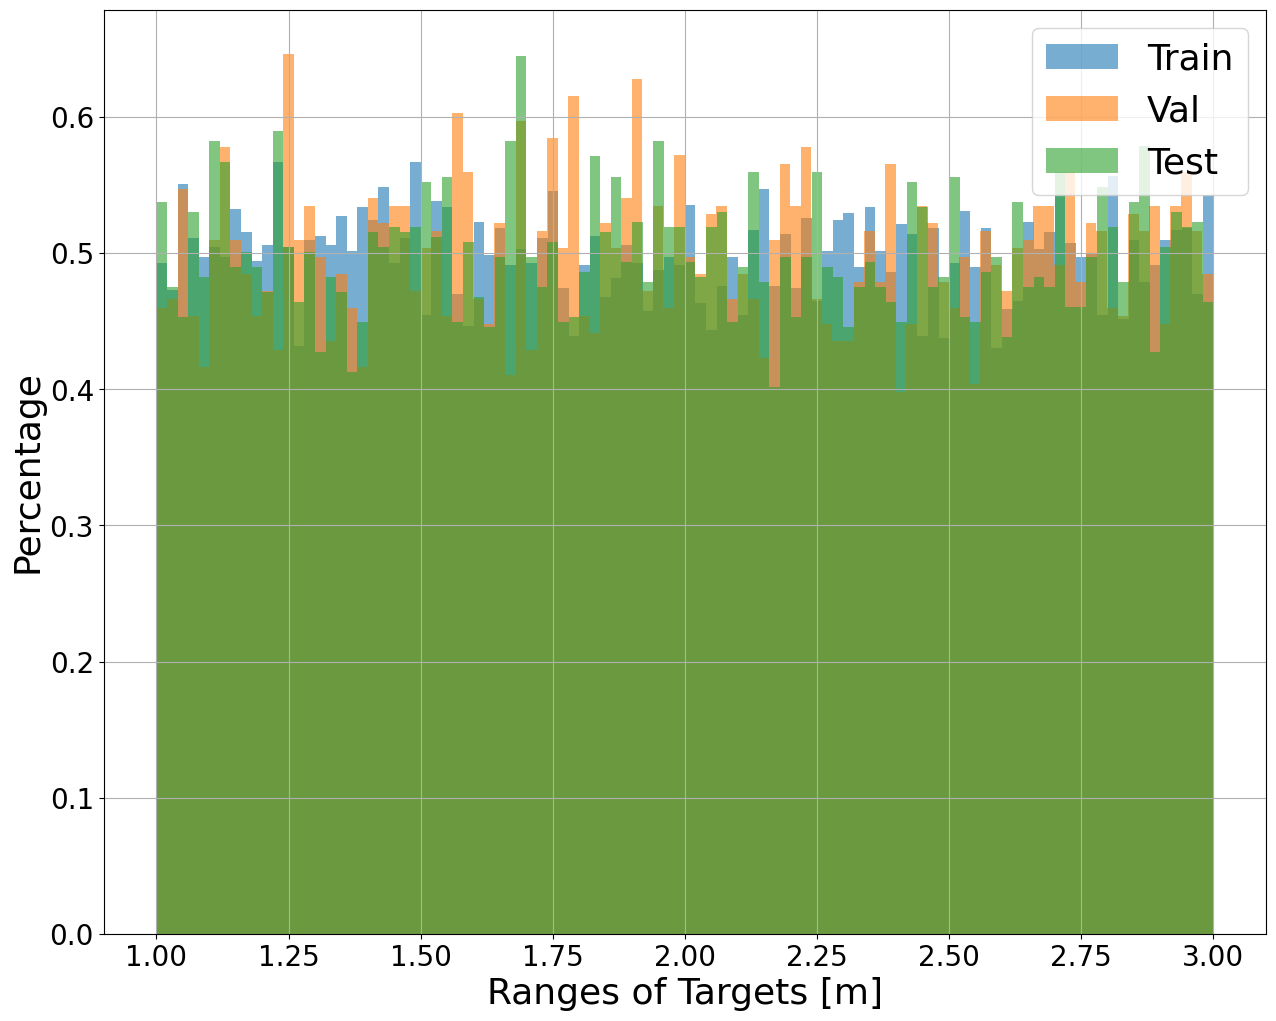

In [41]:
bins_num=100
density=True

plot_hist(train_ranges_flat,bins_num,density,'Ranges','Probability','Ranges - Train')
plot_hist(val_ranges_flat,bins_num,density,'Ranges','Probability','Ranges - Val')
plot_hist(test_ranges_flat,bins_num,density,'Ranges','Probability','Ranges - Test')

plot_hist_all(train_ranges_flat,val_ranges_flat,test_ranges_flat,bins_num,'Ranges of Targets [m]','Ranges of Targets')

In [42]:
train_ranges_sorted=np.sort(train_ranges_flat)
val_ranges_sorted=np.sort(val_ranges_flat)
test_ranges_sorted=np.sort(test_ranges_flat)
print(train_ranges_sorted)
print(val_ranges_sorted)
print(test_ranges_sorted)

[1.00001 1.00007 1.00008 ... 2.99991 2.99995 2.99998]
[1.00007 1.00056 1.00149 ... 2.99723 2.99725 2.99873]
[1.00005 1.00011 1.0002  ... 2.9994  2.99956 2.99982]


In [43]:
train_ranges_diff=train_ranges_sorted[1:]-train_ranges_sorted[0:-1]
val_ranges_diff=val_ranges_sorted[1:]-val_ranges_sorted[0:-1]
test_ranges_diff=test_ranges_sorted[1:]-test_ranges_sorted[0:-1]

train_ranges_diff_sorted=np.sort(train_ranges_diff)
val_ranges_diff_sorted=np.sort(val_ranges_diff)
test_ranges_diff_sorted=np.sort(test_ranges_diff)

print(train_ranges_diff_sorted)
print(val_ranges_diff_sorted)
print(test_ranges_diff_sorted)

train_ranges_diff_log10=np.log10(train_ranges_diff+1e-5)
val_ranges_diff_log10=np.log10(val_ranges_diff+1e-5)
test_ranges_diff_log10=np.log10(test_ranges_diff+1e-5)

[0.      0.      0.      ... 0.00058 0.00067 0.00069]
[0.      0.      0.      ... 0.0017  0.00171 0.00197]
[0.      0.      0.      ... 0.00133 0.00138 0.00164]


Mean:  -4.293601773905934  STD:  0.364738067037666


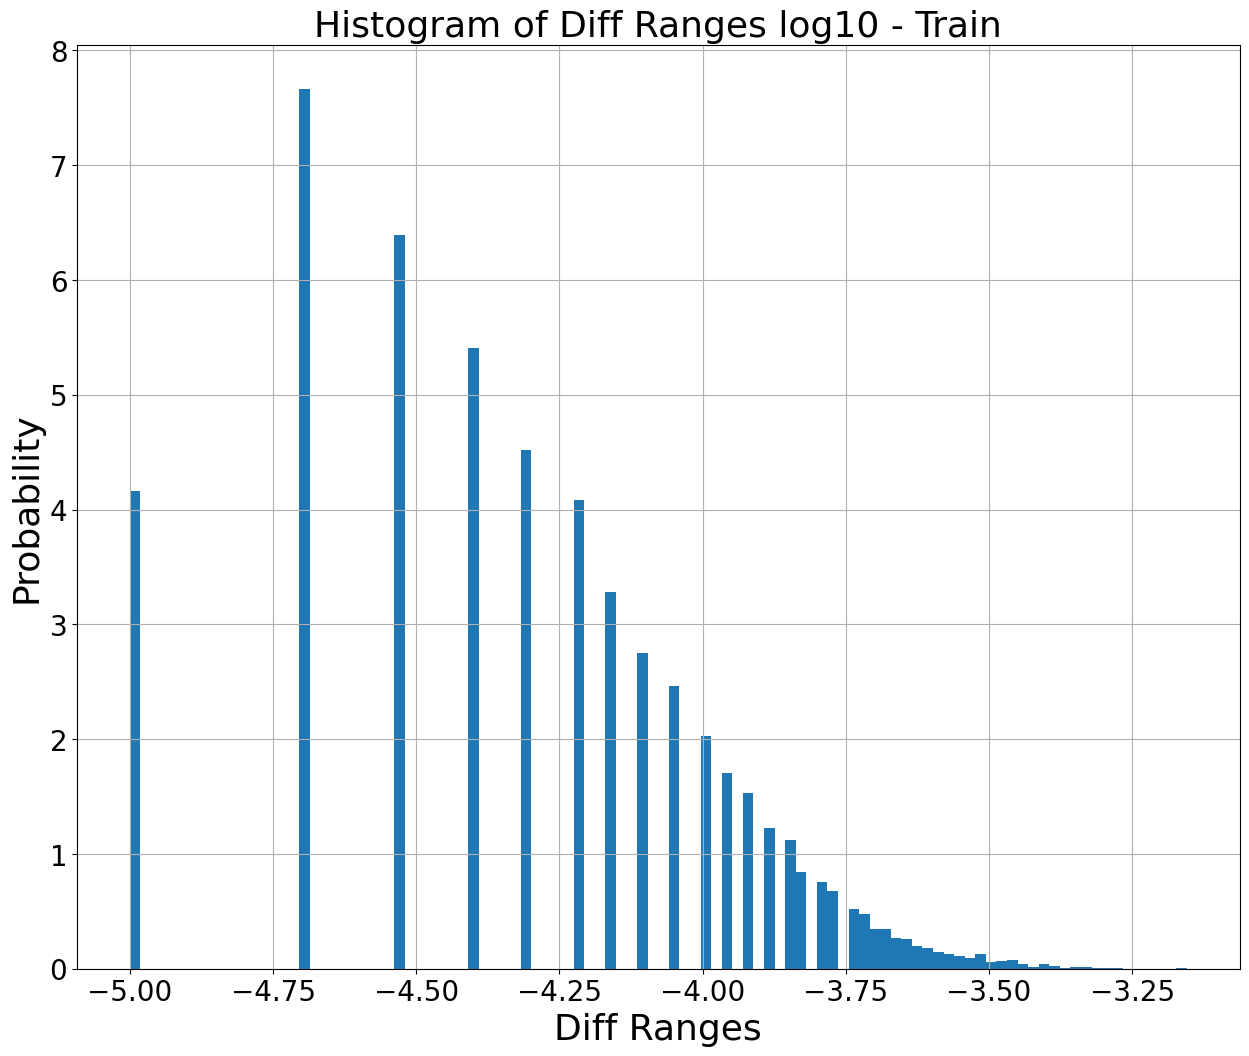

Mean:  -3.790738009724466  STD:  0.4595013872190898


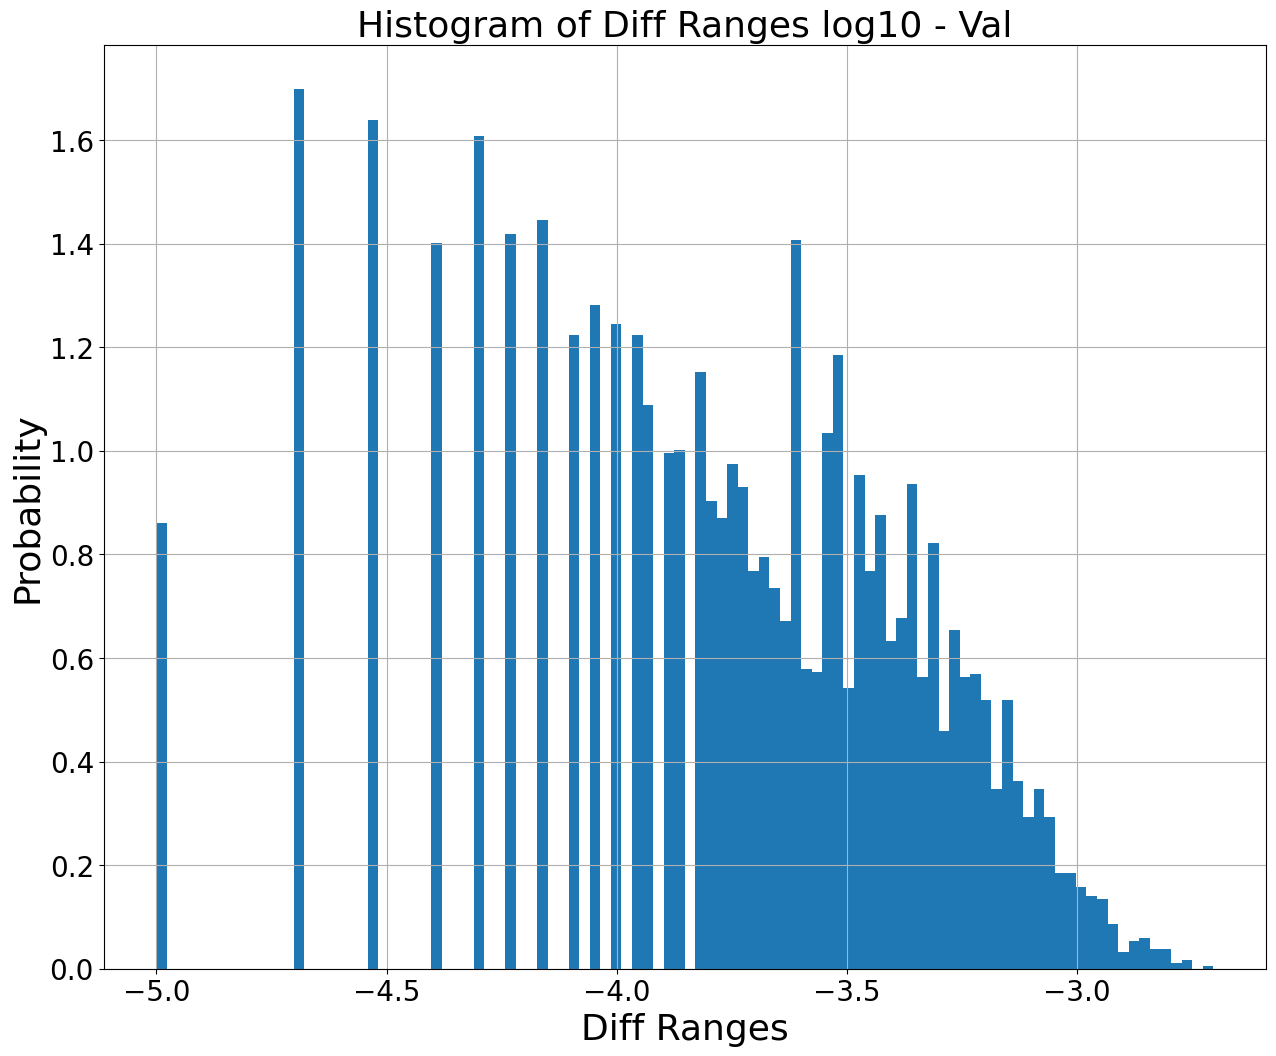

Mean:  -3.99173561225982  STD:  0.43211421136994765


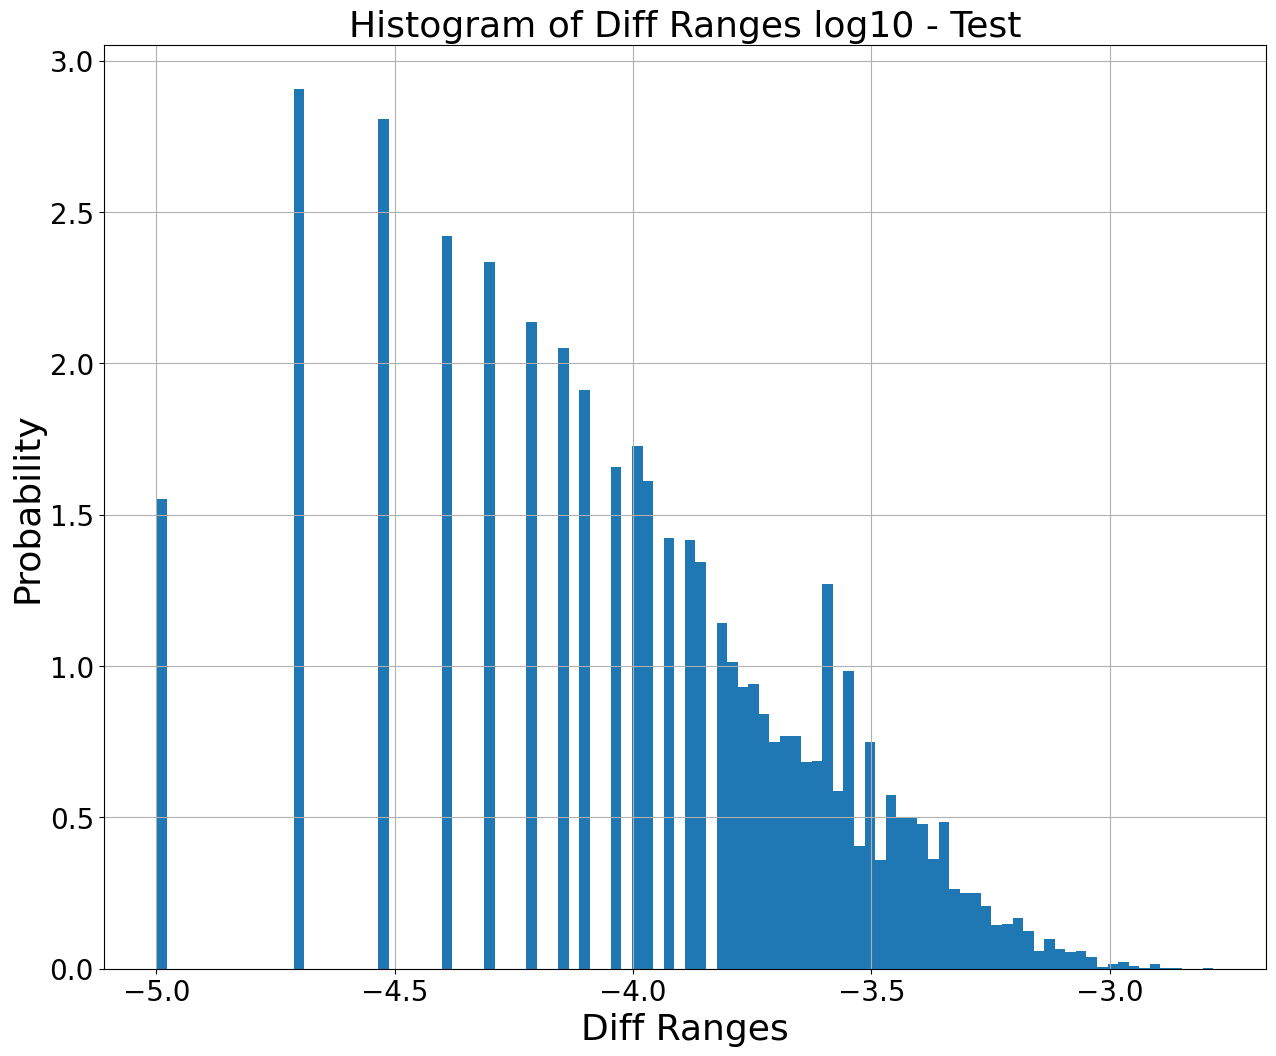

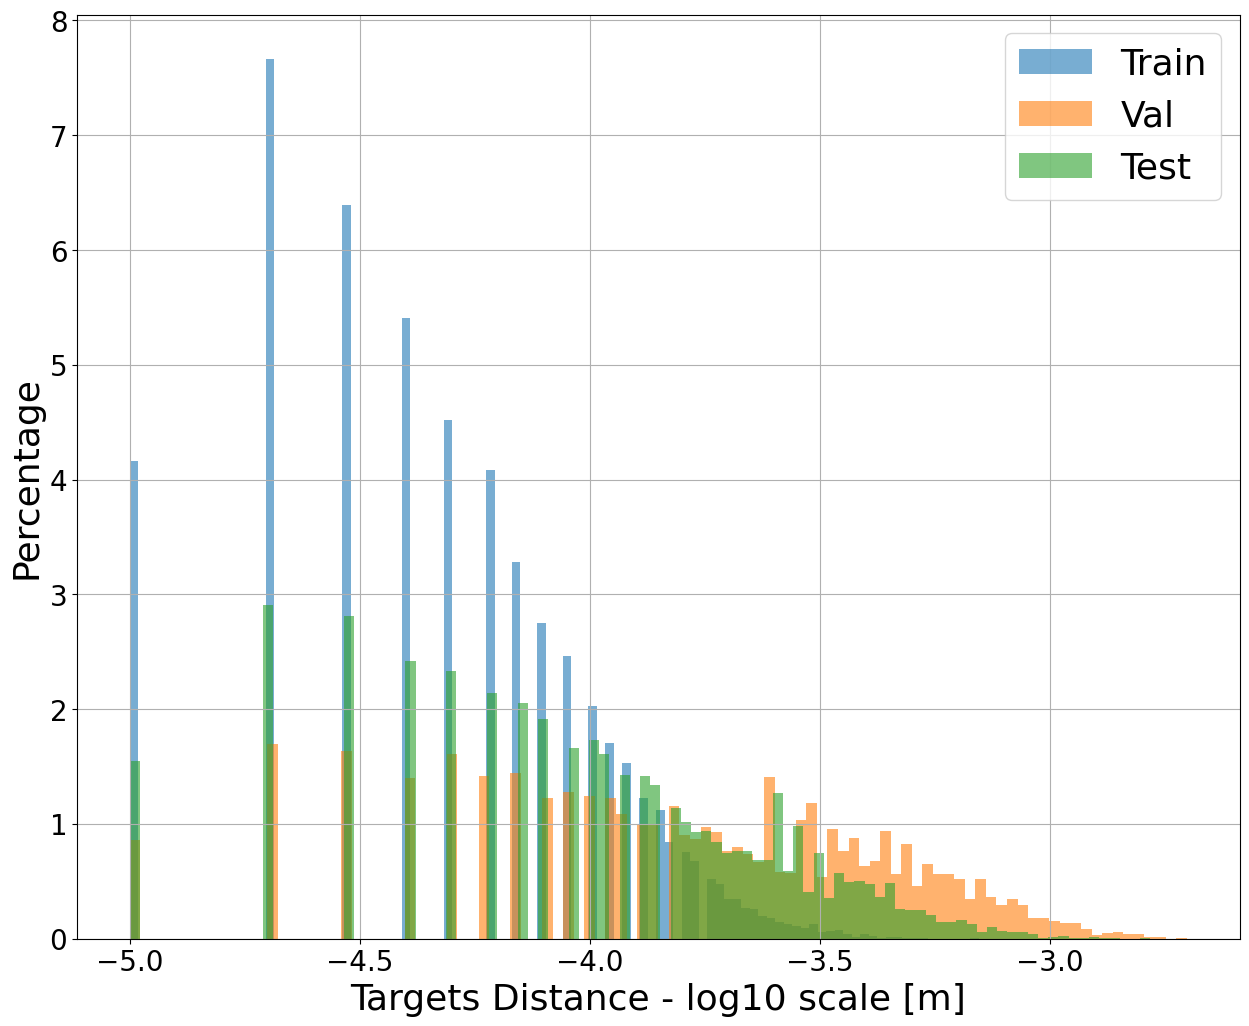

In [44]:
bins_num=100
density=True

print('Mean: ', np.mean(train_ranges_diff_log10),' STD: ',np.std(train_ranges_diff_log10))
plot_hist(train_ranges_diff_log10,bins_num,density,'Diff Ranges','Probability','Diff Ranges log10 - Train')

print('Mean: ', np.mean(val_ranges_diff_log10),' STD: ',np.std(val_ranges_diff_log10))
plot_hist(val_ranges_diff_log10,bins_num,density,'Diff Ranges','Probability','Diff Ranges log10 - Val')

print('Mean: ', np.mean(test_ranges_diff_log10),' STD: ',np.std(test_ranges_diff_log10))
plot_hist(test_ranges_diff_log10,bins_num,density,'Diff Ranges','Probability','Diff Ranges log10 - Test')

plot_hist_all(train_ranges_diff_log10,val_ranges_diff_log10,test_ranges_diff_log10,bins_num,'Targets Distance - log10 scale [m]','Targets Distance - log10 scale')

## Theta

In [45]:
print(train_set[0,:][1])
print(train_set[0,:][1][10:20])

tensor([ 1.5498,  1.7940,  2.2195,  2.7580,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  1.8691,  0.7137, -0.6780, -1.7925,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.4813,  0.5523,  1.4947,  0.2555,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)
tensor([ 1.8691,  0.7137, -0.6780, -1.7925,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000], dtype=torch.float64)


In [46]:
train_thetas=[train_set[i,:][1][10:20][train_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(train_set)) ]
val_thetas=[val_set[i,:][1][10:20][val_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(val_set))]
test_thetas=[test_set[i,:][1][10:20][test_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(test_set)) ]
print(train_thetas[:10])

train_flat_thetas=[theta[0] for thetas in train_thetas for theta in thetas]
val_flat_thetas=[theta[0] for thetas in val_thetas for theta in thetas]
test_flat_thetas=[theta[0] for thetas in test_thetas for theta in thetas]

print(train_flat_thetas)

[array([[ 1.86913061],
       [ 0.71373408],
       [-0.67797912],
       [-1.79245868]]), array([[-2.03998848],
       [ 1.64672816]]), array([[ 0.15329465],
       [-1.39178924],
       [ 0.58607663],
       [ 1.94559712],
       [-2.81822014],
       [ 0.45691448],
       [ 1.51640654],
       [ 2.7199731 ],
       [ 3.05526786],
       [ 2.15705125]]), array([[ 1.10713909],
       [-2.21144766]]), array([[ 2.10003214],
       [-1.62568484],
       [-2.32358688],
       [ 1.42697143],
       [ 3.05565804],
       [-2.52152098],
       [ 1.7508963 ]]), array([[ 2.12745862],
       [-0.49070857],
       [-0.14890187],
       [ 1.76227755],
       [ 1.25853512],
       [-0.31012966],
       [ 0.50852425]]), array([[ 1.53606241],
       [ 1.57415534],
       [-2.37542798],
       [ 0.25401663],
       [-1.87745978],
       [-2.53406631],
       [ 3.01135472],
       [-0.41410936],
       [-0.0838649 ]]), array([[-1.55069051],
       [-0.26080984],
       [-2.33200972],
       [-0.356682

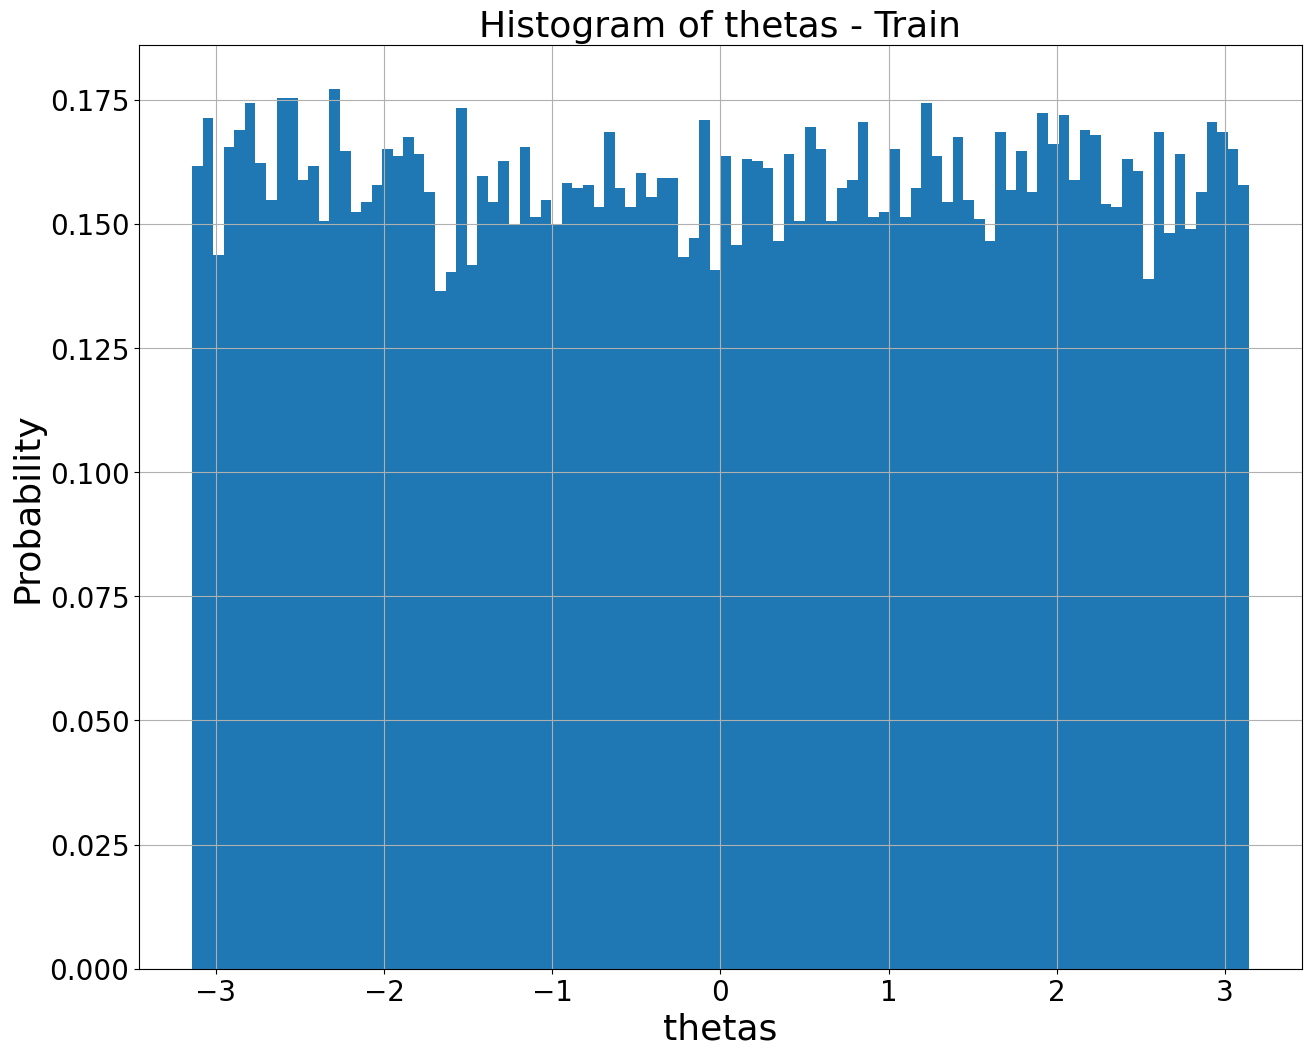

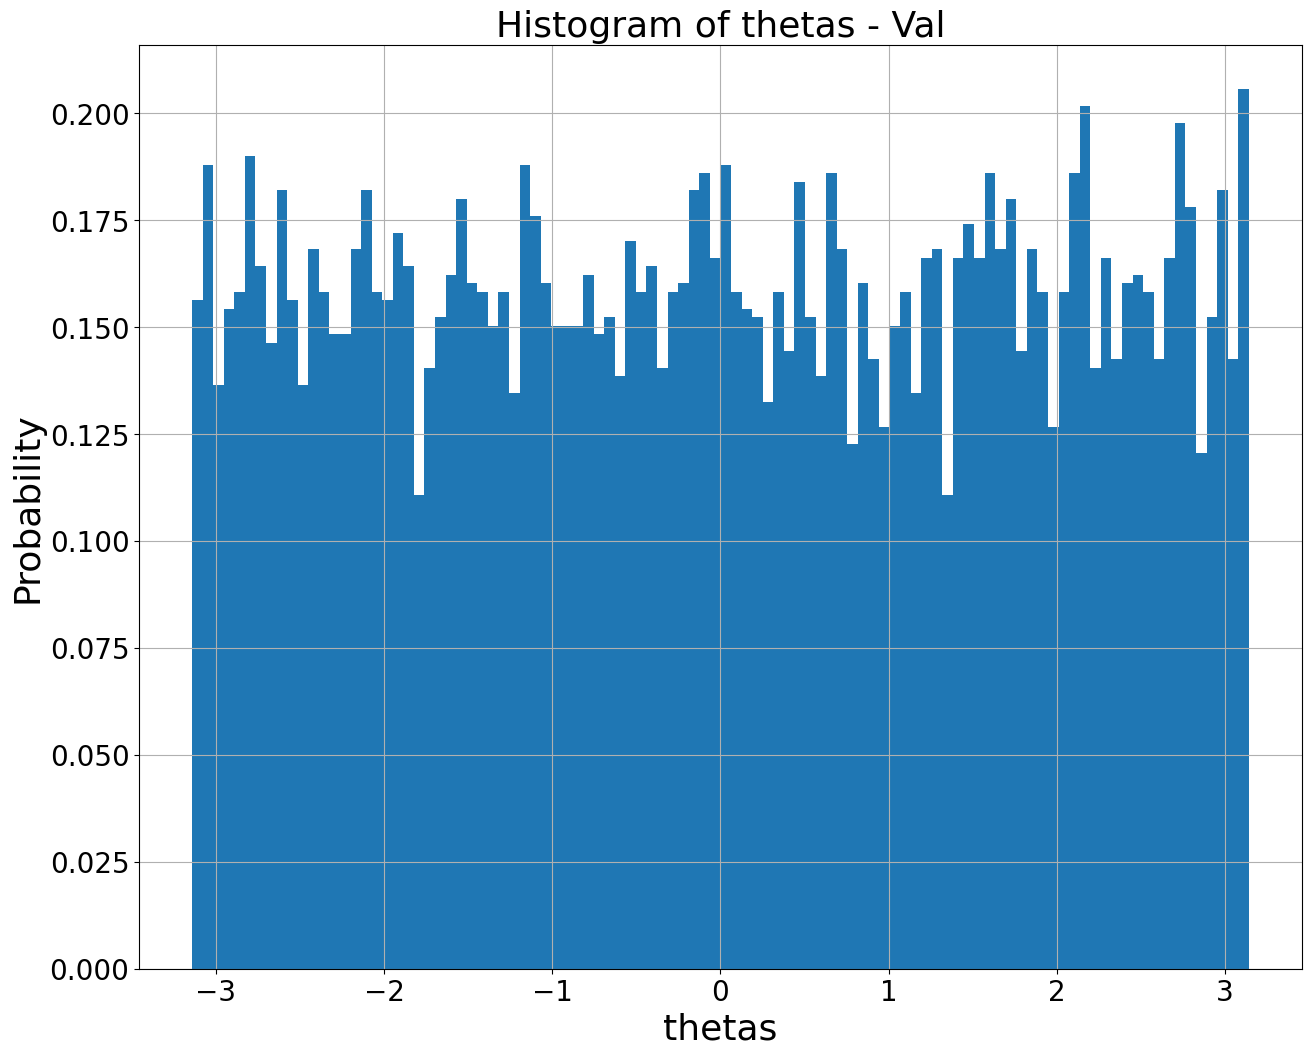

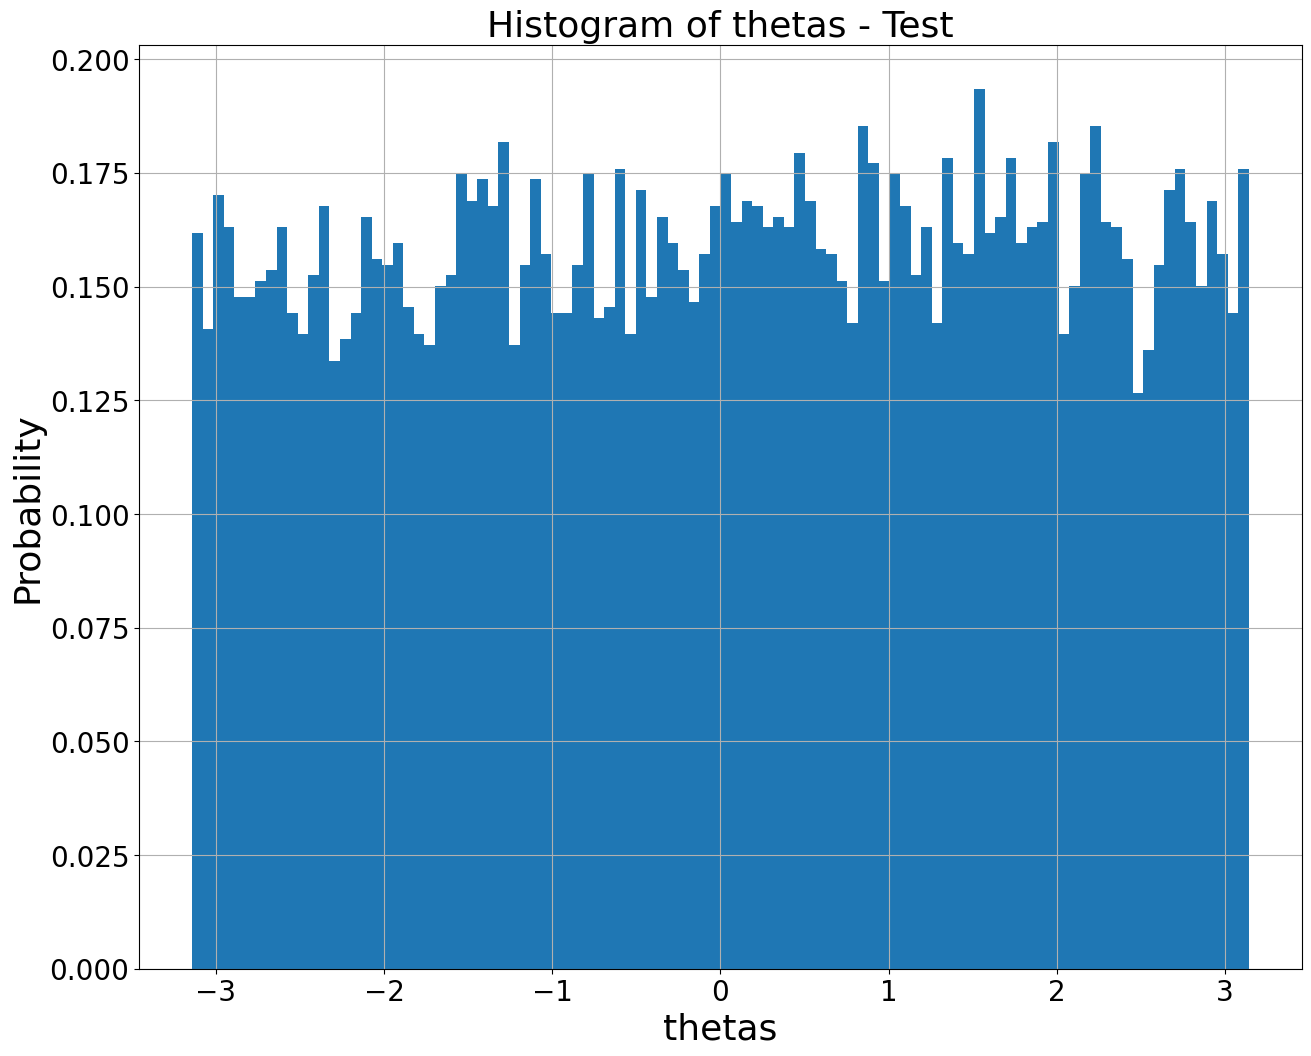

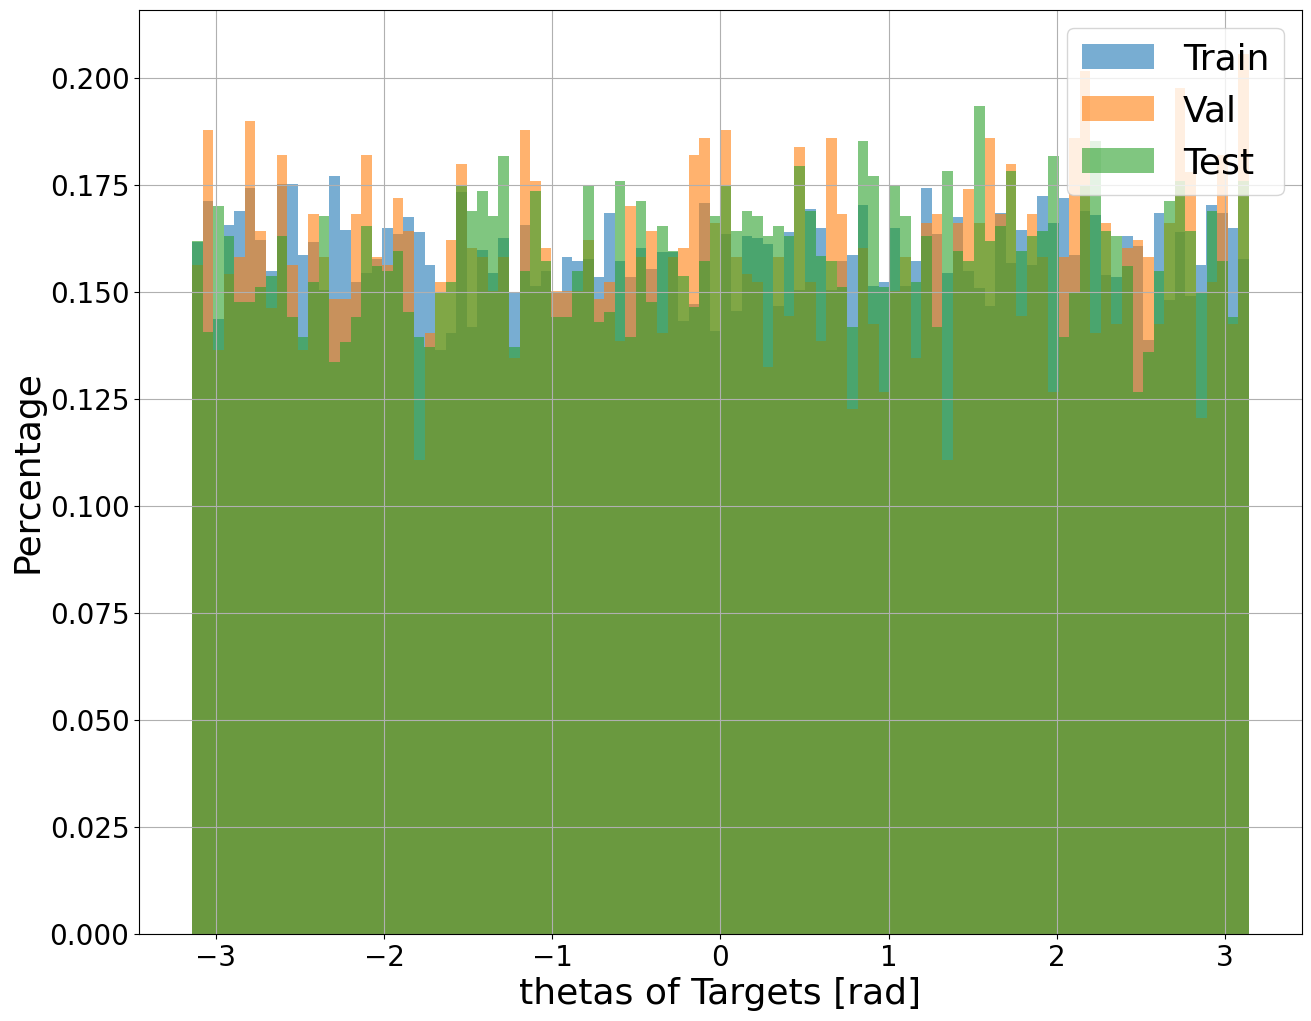

In [47]:
bins_num=100
density=True

plot_hist(train_flat_thetas,bins_num,density,'thetas','Probability','thetas - Train')
plot_hist(val_flat_thetas,bins_num,density,'thetas','Probability','thetas - Val')
plot_hist(test_flat_thetas,bins_num,density,'thetas','Probability','thetas - Test')

plot_hist_all(train_flat_thetas,val_flat_thetas,test_flat_thetas,bins_num,'thetas of Targets [rad]','thetas of Targets')

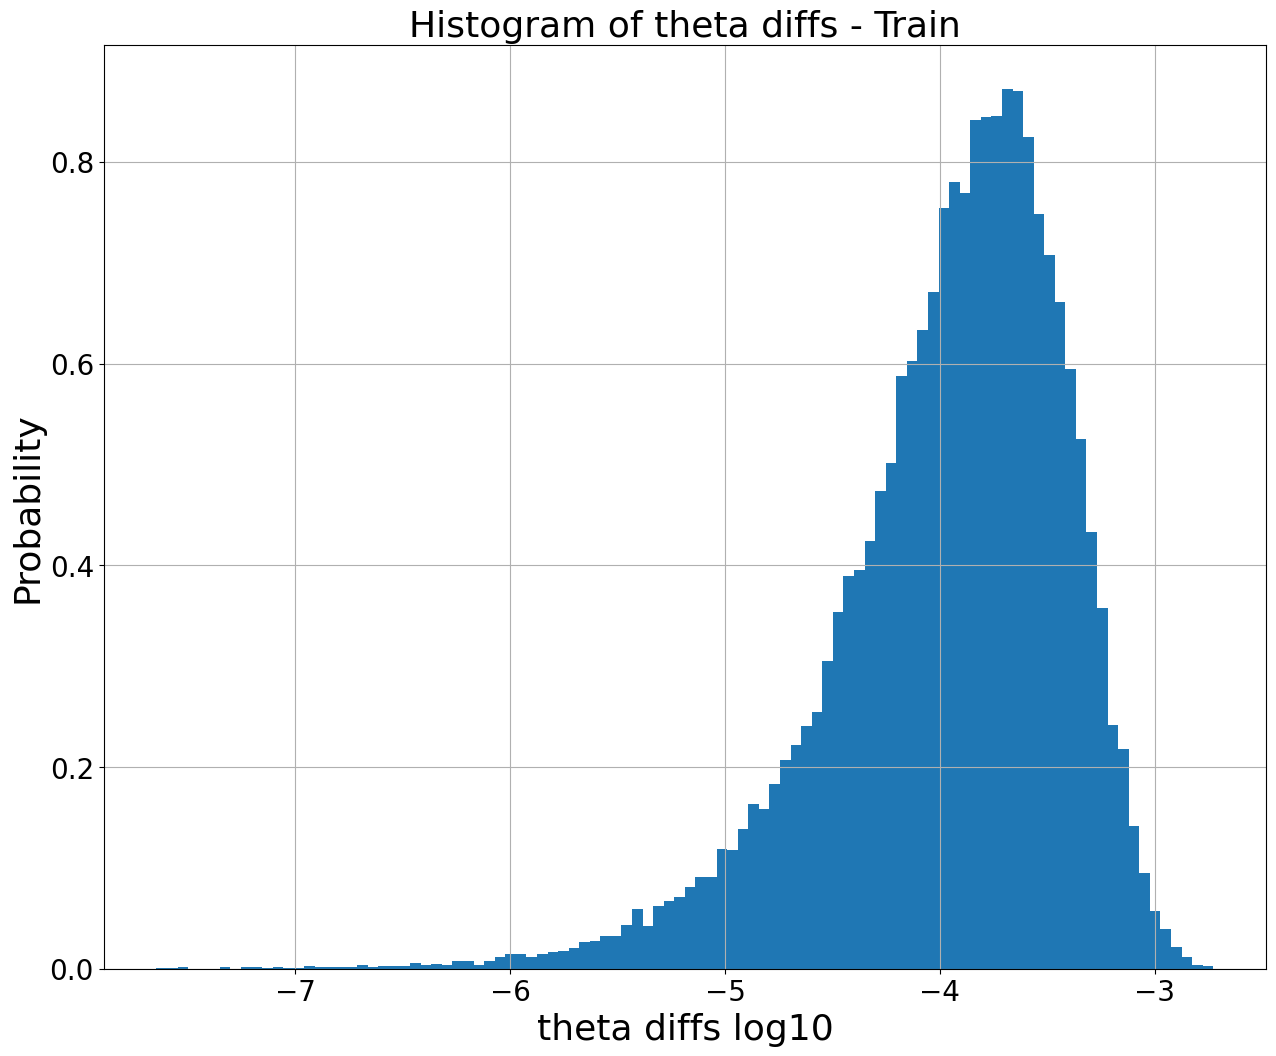

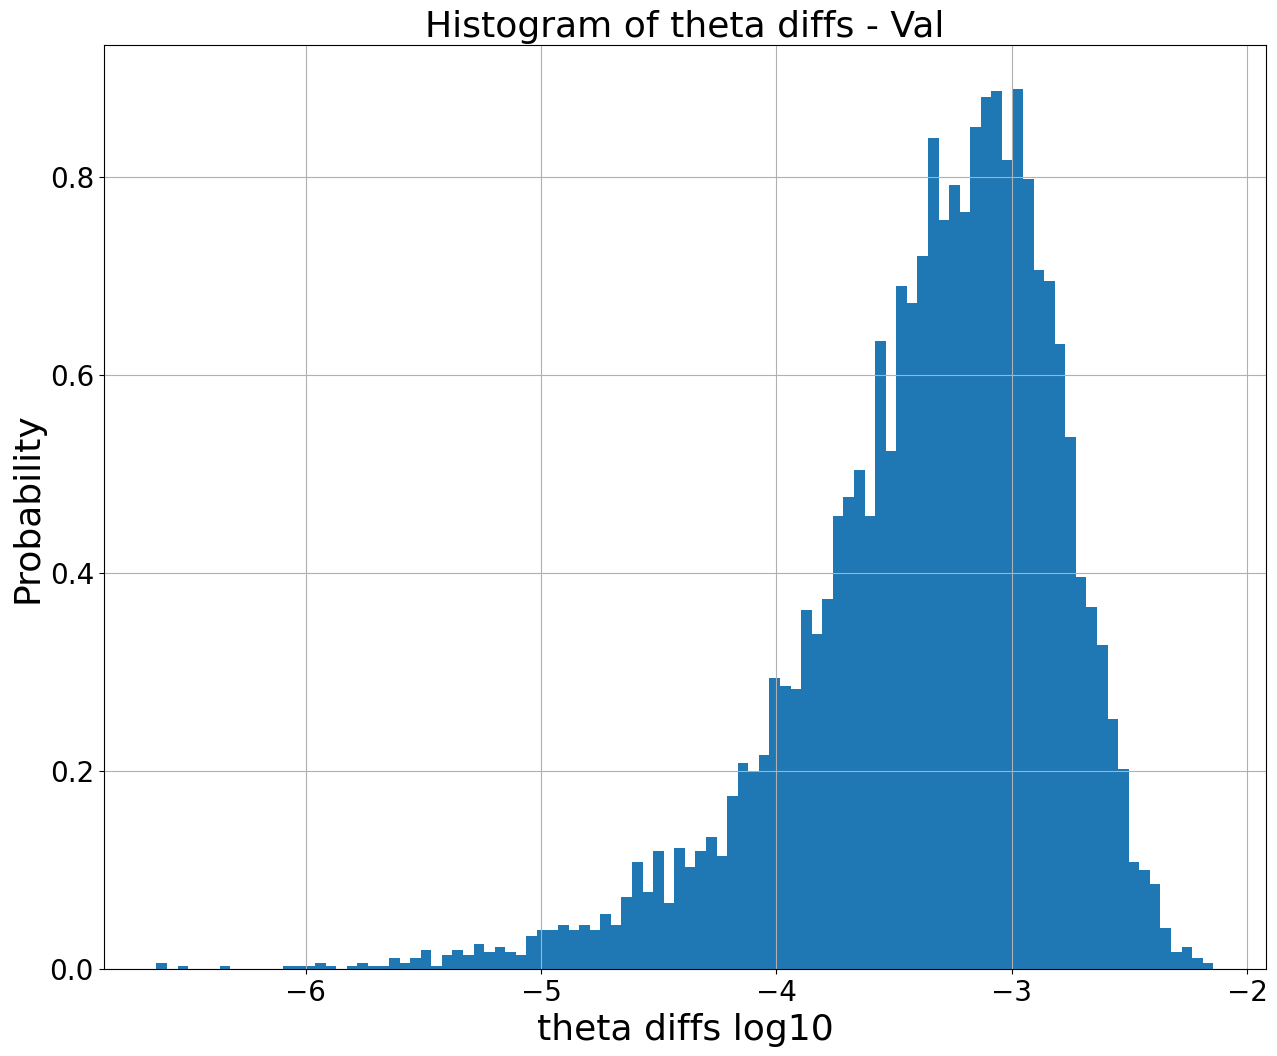

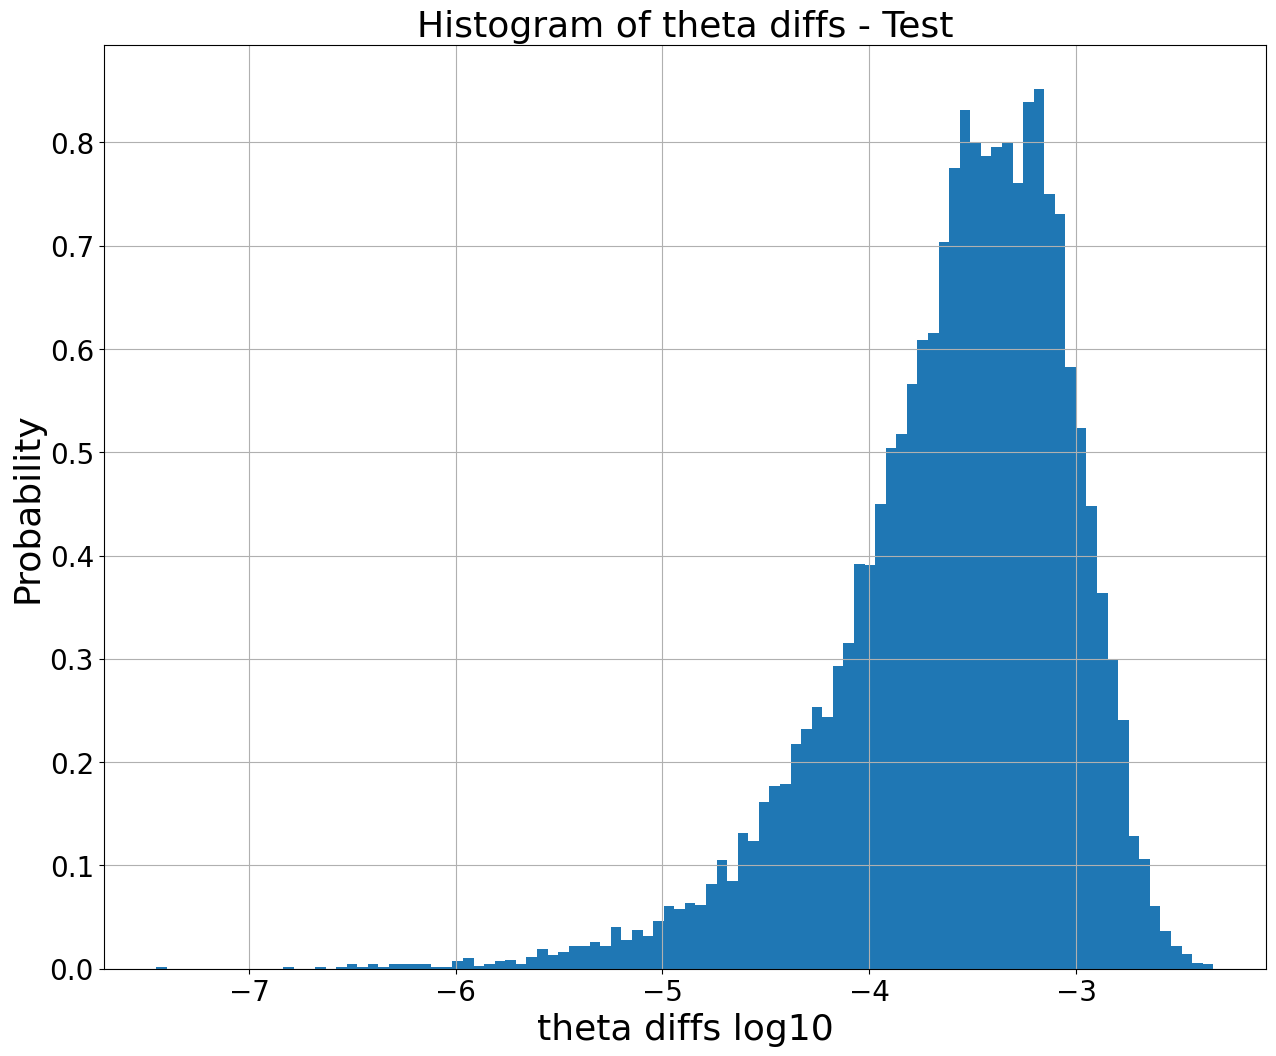

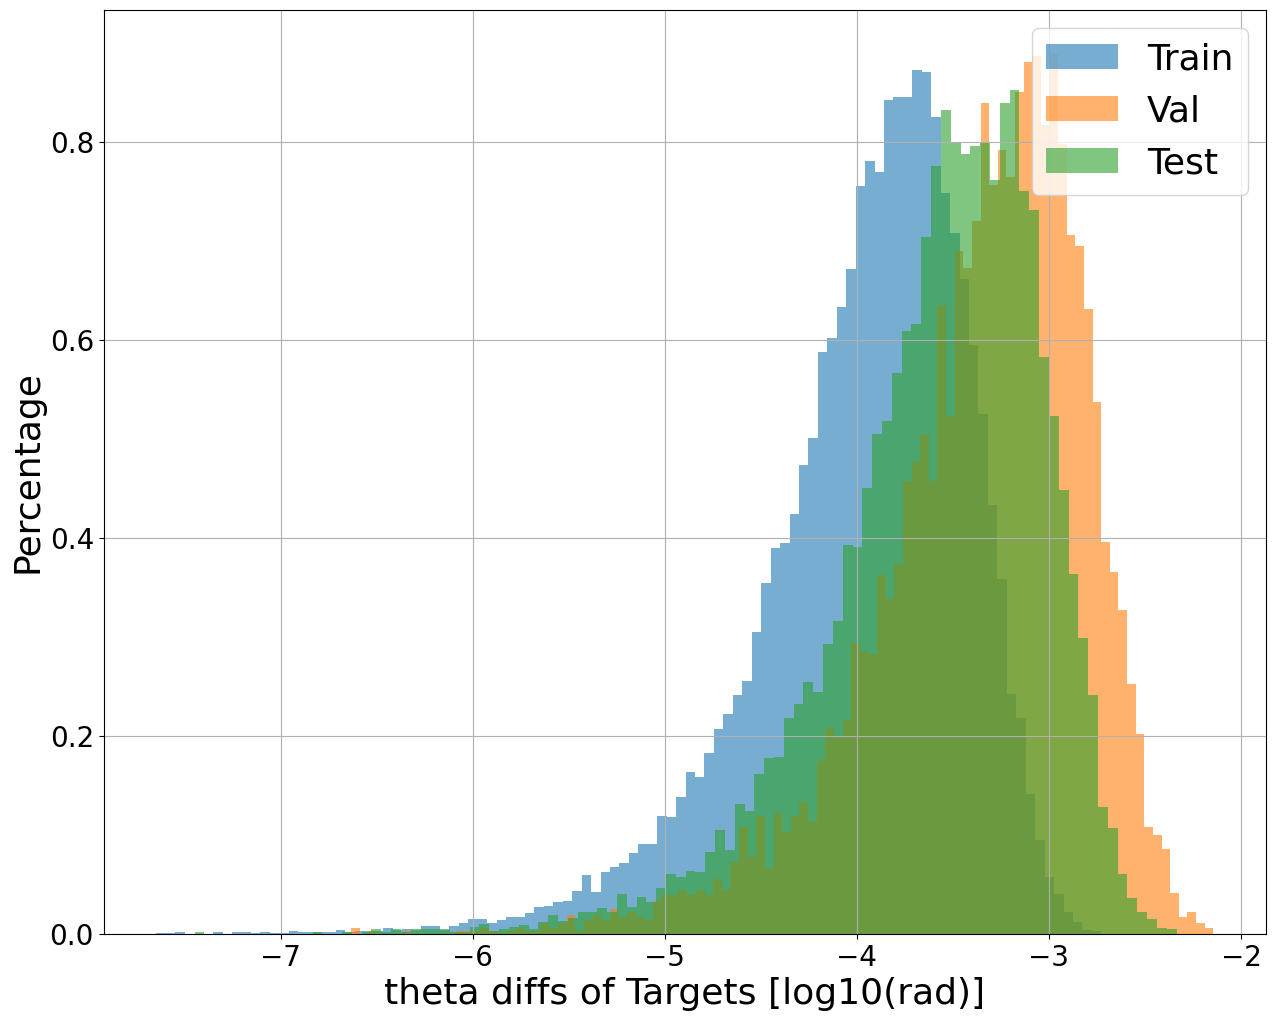

In [48]:
train_flat_thetas_sorted=np.sort(train_flat_thetas)
val_flat_thetas_sorted=np.sort(val_flat_thetas)
test_flat_thetas_sorted=np.sort(test_flat_thetas)

train_thetas_diff=train_flat_thetas_sorted[1:]-train_flat_thetas_sorted[:-1]
val_thetas_diff=val_flat_thetas_sorted[1:]-val_flat_thetas_sorted[:-1]
test_thetas_diff=test_flat_thetas_sorted[1:]-test_flat_thetas_sorted[:-1]

train_thetas_diff_log10=np.log10(train_thetas_diff+1e-8)
val_thetas_diff_log10=np.log10(val_thetas_diff)
test_thetas_diff_log10=np.log10(test_thetas_diff)

bins_num=100
density=True

plot_hist(train_thetas_diff_log10,bins_num,density,'theta diffs log10','Probability','theta diffs - Train')
plot_hist(val_thetas_diff_log10,bins_num,density,'theta diffs log10','Probability','theta diffs - Val')
plot_hist(test_thetas_diff_log10,bins_num,density,'theta diffs log10','Probability','theta diffs - Test')

plot_hist_all(train_thetas_diff_log10,val_thetas_diff_log10,test_thetas_diff_log10,bins_num,'theta diffs of Targets [log10(rad)]','theta diffs of Targets log10')



## Phi

In [49]:
print(train_set[0,:][1])

tensor([ 1.5498,  1.7940,  2.2195,  2.7580,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  1.8691,  0.7137, -0.6780, -1.7925,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.4813,  0.5523,  1.4947,  0.2555,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)


In [50]:
train_phis=[train_set[i,:][1][20:][train_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(train_set)) ]
val_phis=[val_set[i,:][1][20:][val_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(val_set))]
test_phis=[test_set[i,:][1][20:][test_set[i,:][1][:10].nonzero()].cpu().detach().numpy() for i in range(len(test_set)) ]
print(train_phis[:10])

train_flat_phis=[phi[0] for phis in train_phis for phi in phis]
val_flat_phis=[phi[0] for phis in val_phis for phi in phis]
test_flat_phis=[phi[0] for phis in test_phis for phi in phis]

print(train_flat_phis)

[array([[0.48131087],
       [0.55234651],
       [1.49468777],
       [0.25547926]]), array([[0.17999896],
       [1.19321975]]), array([[0.98827352],
       [0.21795722],
       [1.50213122],
       [1.17832639],
       [1.45643355],
       [0.08947706],
       [0.46715536],
       [1.11713057],
       [0.1811441 ],
       [1.22996409]]), array([[0.18488002],
       [0.71991598]]), array([[0.5636262 ],
       [0.63088848],
       [0.1341527 ],
       [0.67458262],
       [0.53739316],
       [0.84830611],
       [0.64014885]]), array([[0.15954262],
       [0.90074256],
       [1.51261903],
       [0.3002729 ],
       [0.14548391],
       [1.35309192],
       [1.22316971]]), array([[0.99672947],
       [0.12923528],
       [0.06806942],
       [0.54776909],
       [0.69980811],
       [0.27922268],
       [0.4117645 ],
       [0.0766146 ],
       [0.89636909]]), array([[0.13189651],
       [0.38900296],
       [0.27947199],
       [0.71010373],
       [0.56715489],
       [0.54400816]

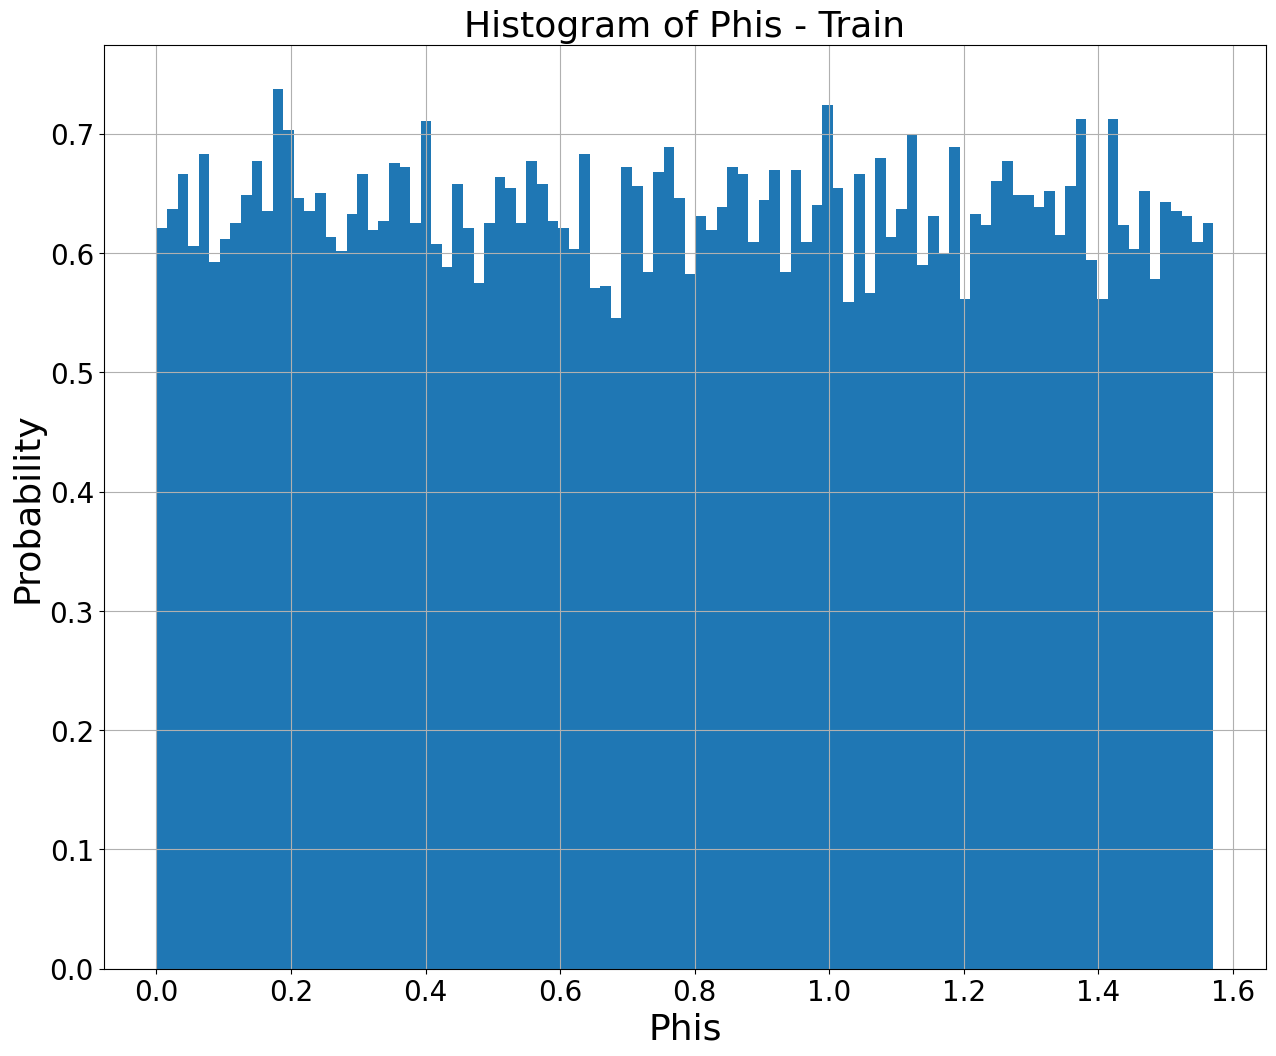

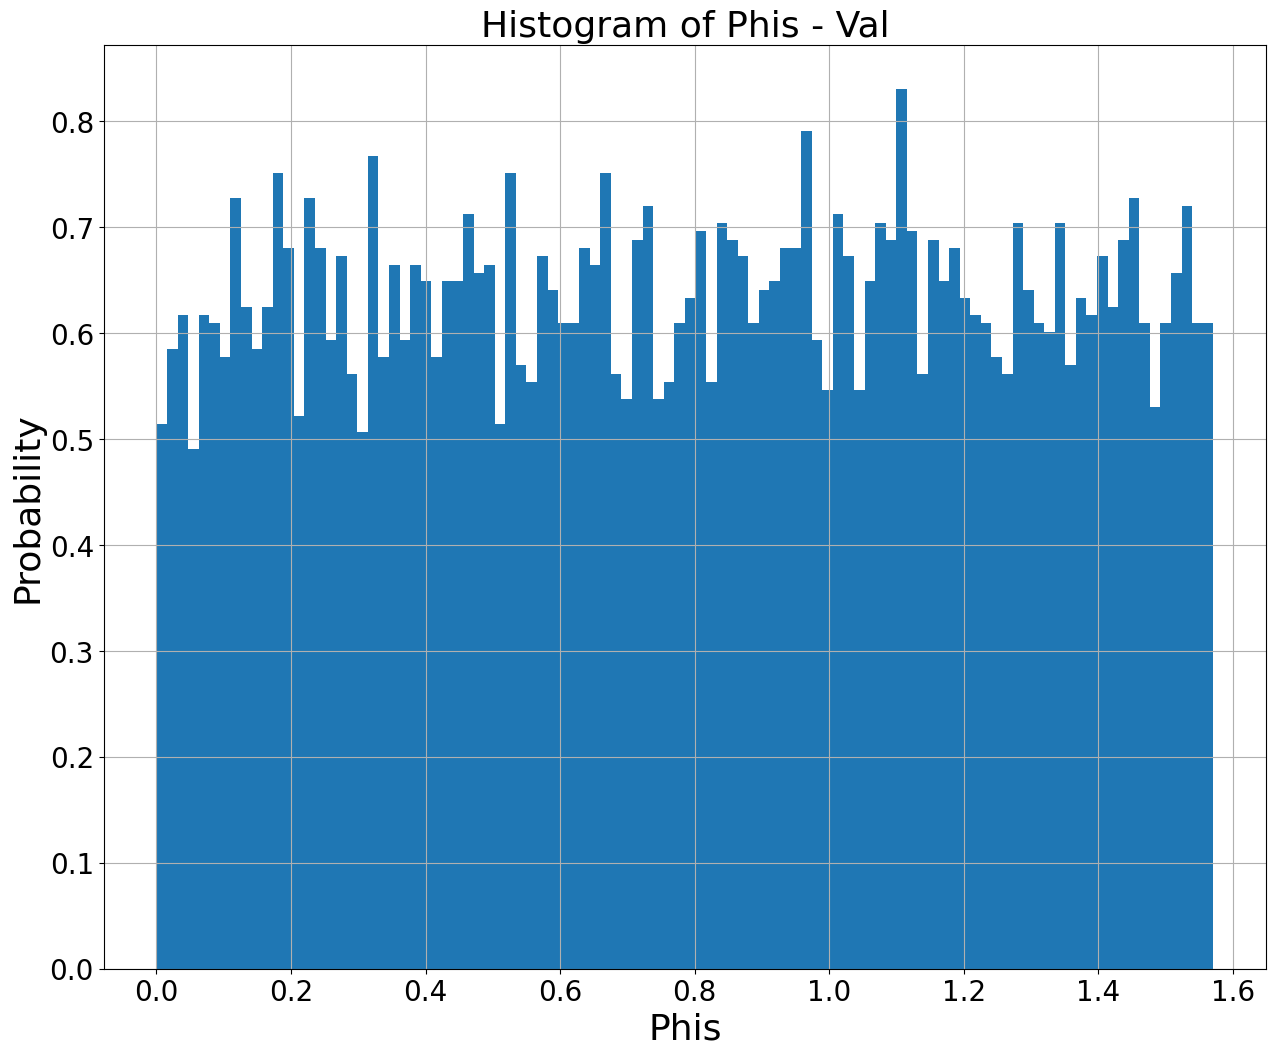

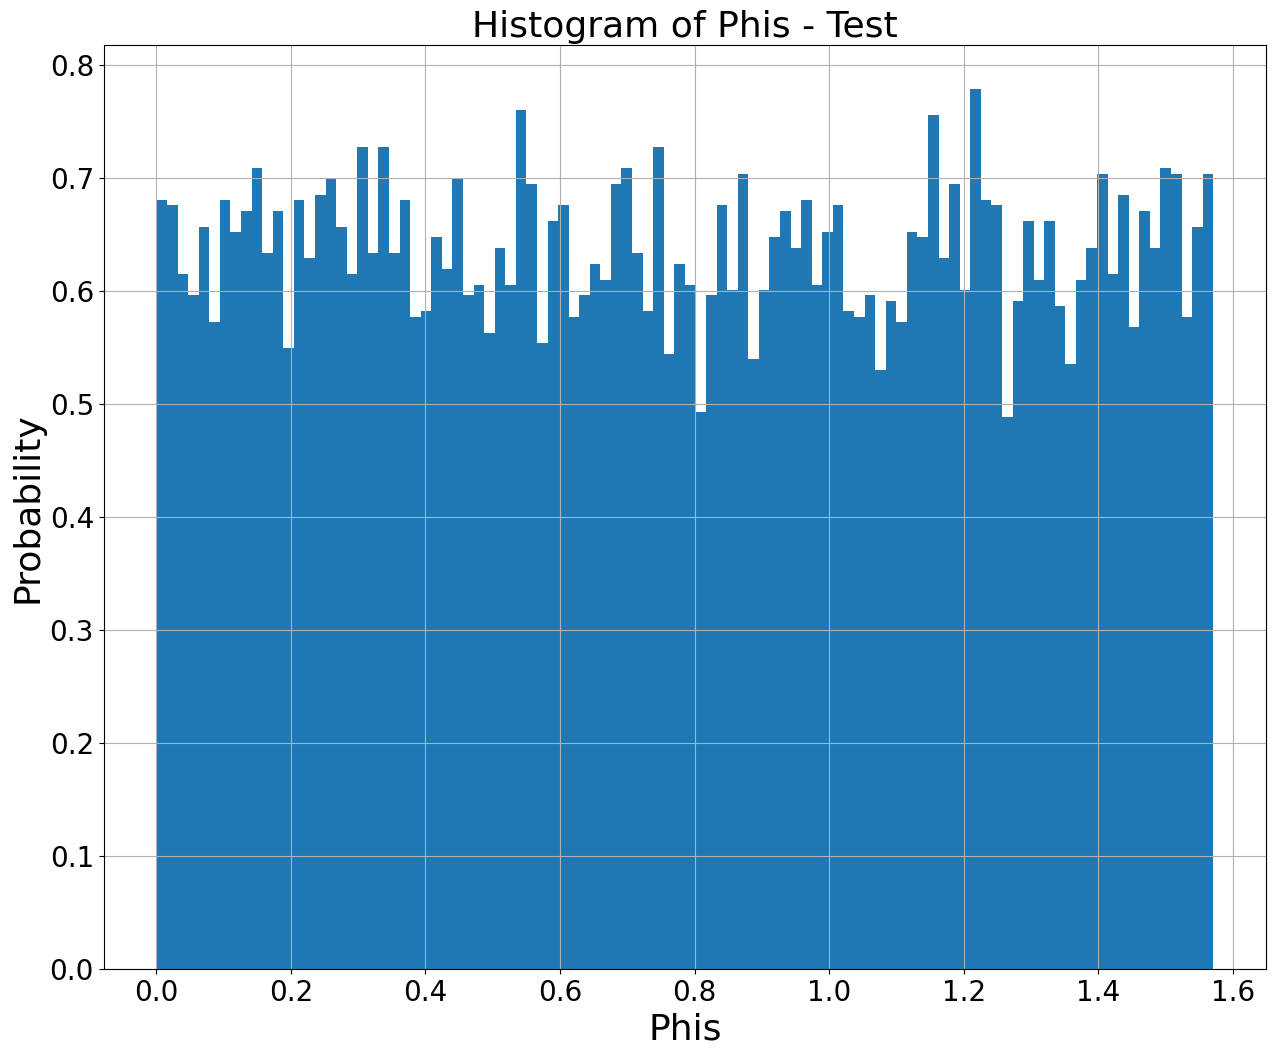

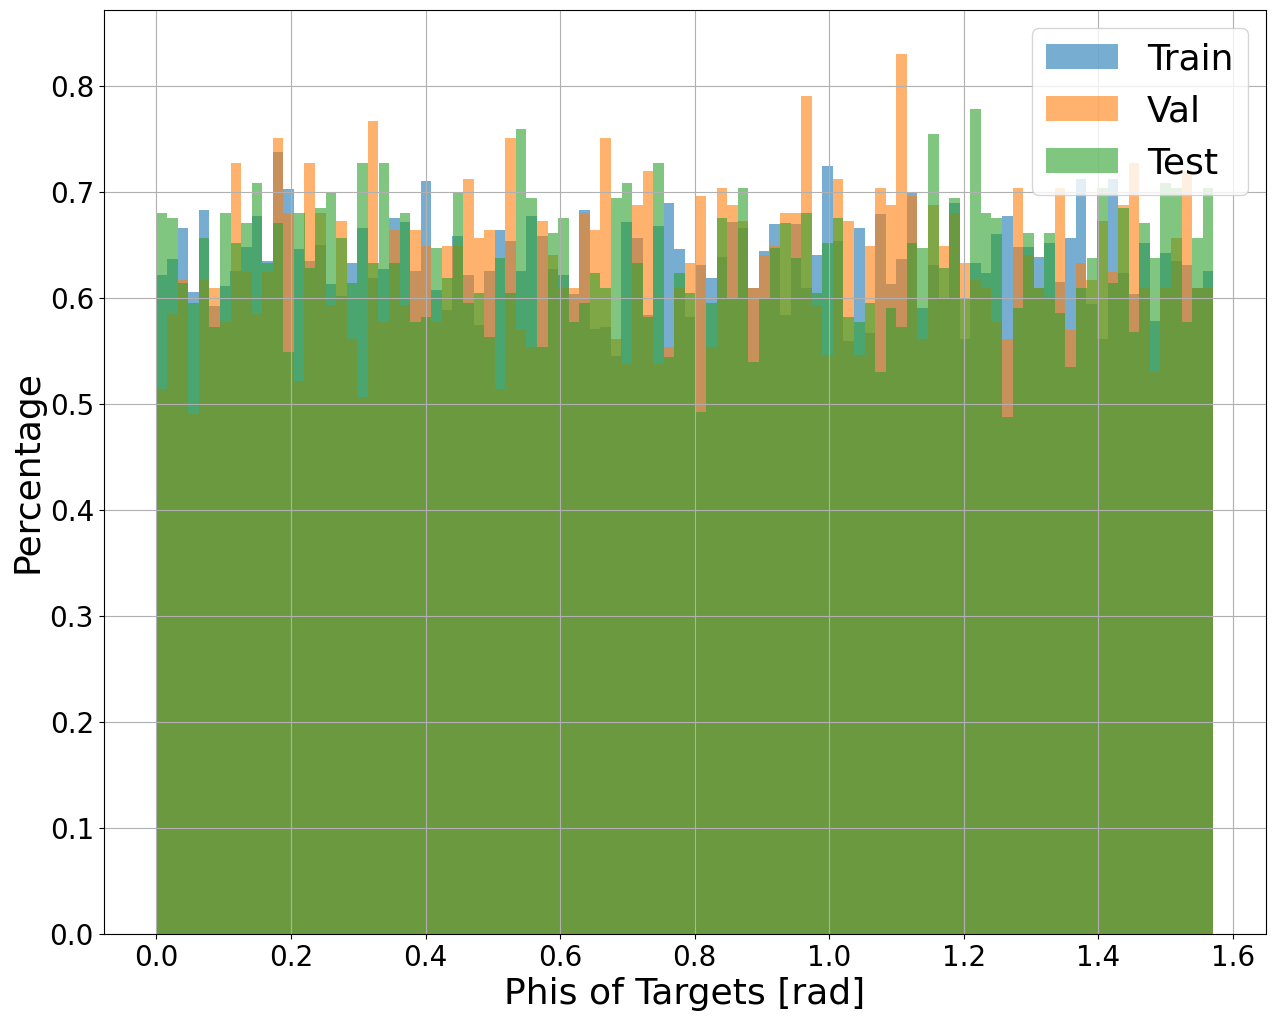

In [51]:
bins_num=100
density=True

plot_hist(train_flat_phis,bins_num,density,'Phis','Probability','Phis - Train')
plot_hist(val_flat_phis,bins_num,density,'Phis','Probability','Phis - Val')
plot_hist(test_flat_phis,bins_num,density,'Phis','Probability','Phis - Test')

plot_hist_all(train_flat_phis,val_flat_phis,test_flat_phis,bins_num,'Phis of Targets [rad]','Phis of Targets')

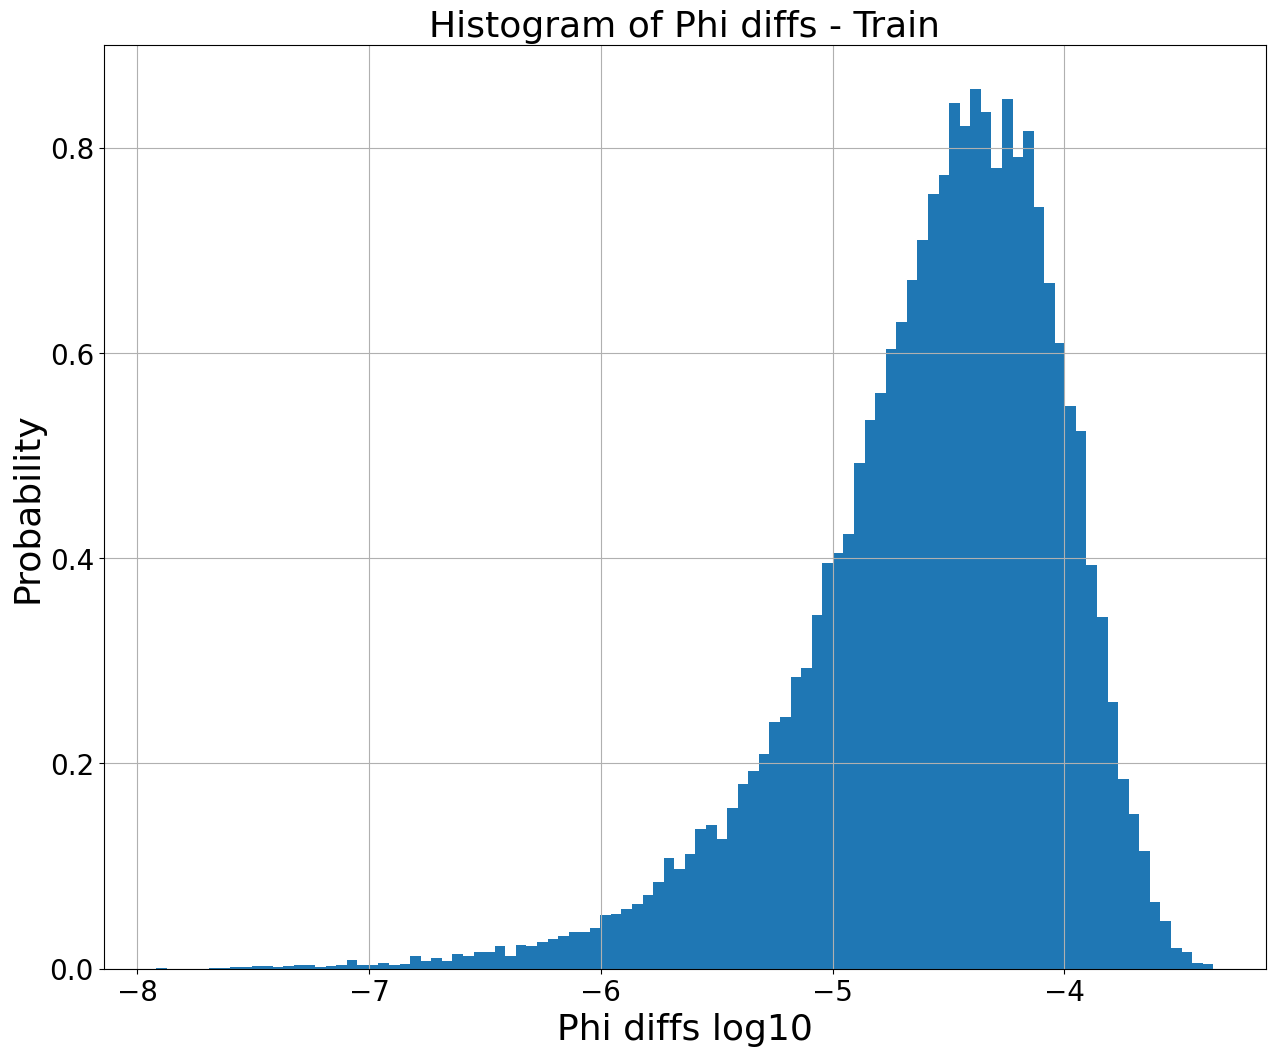

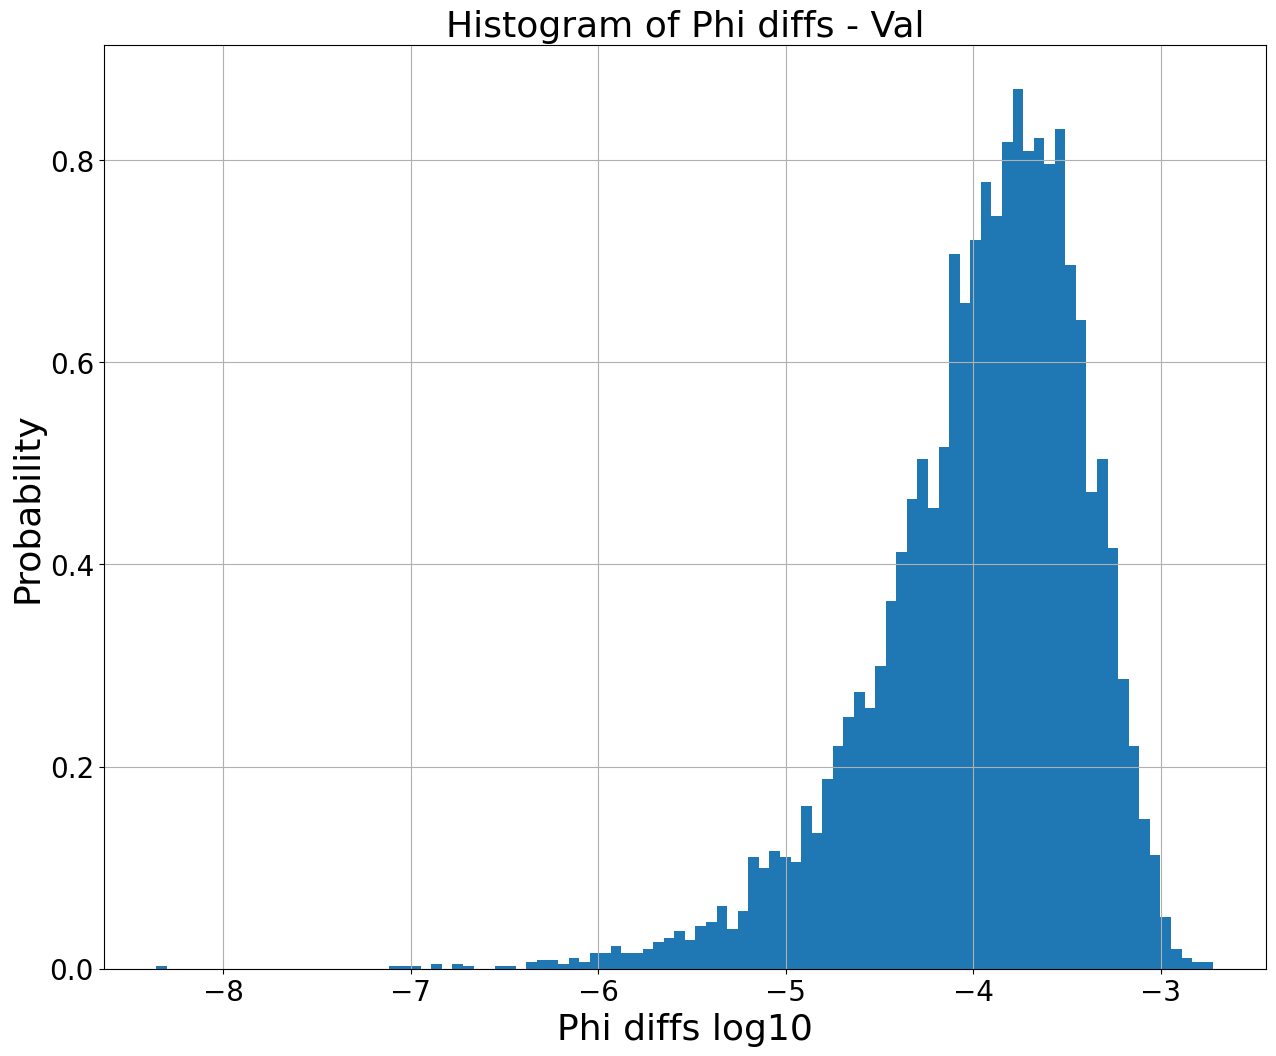

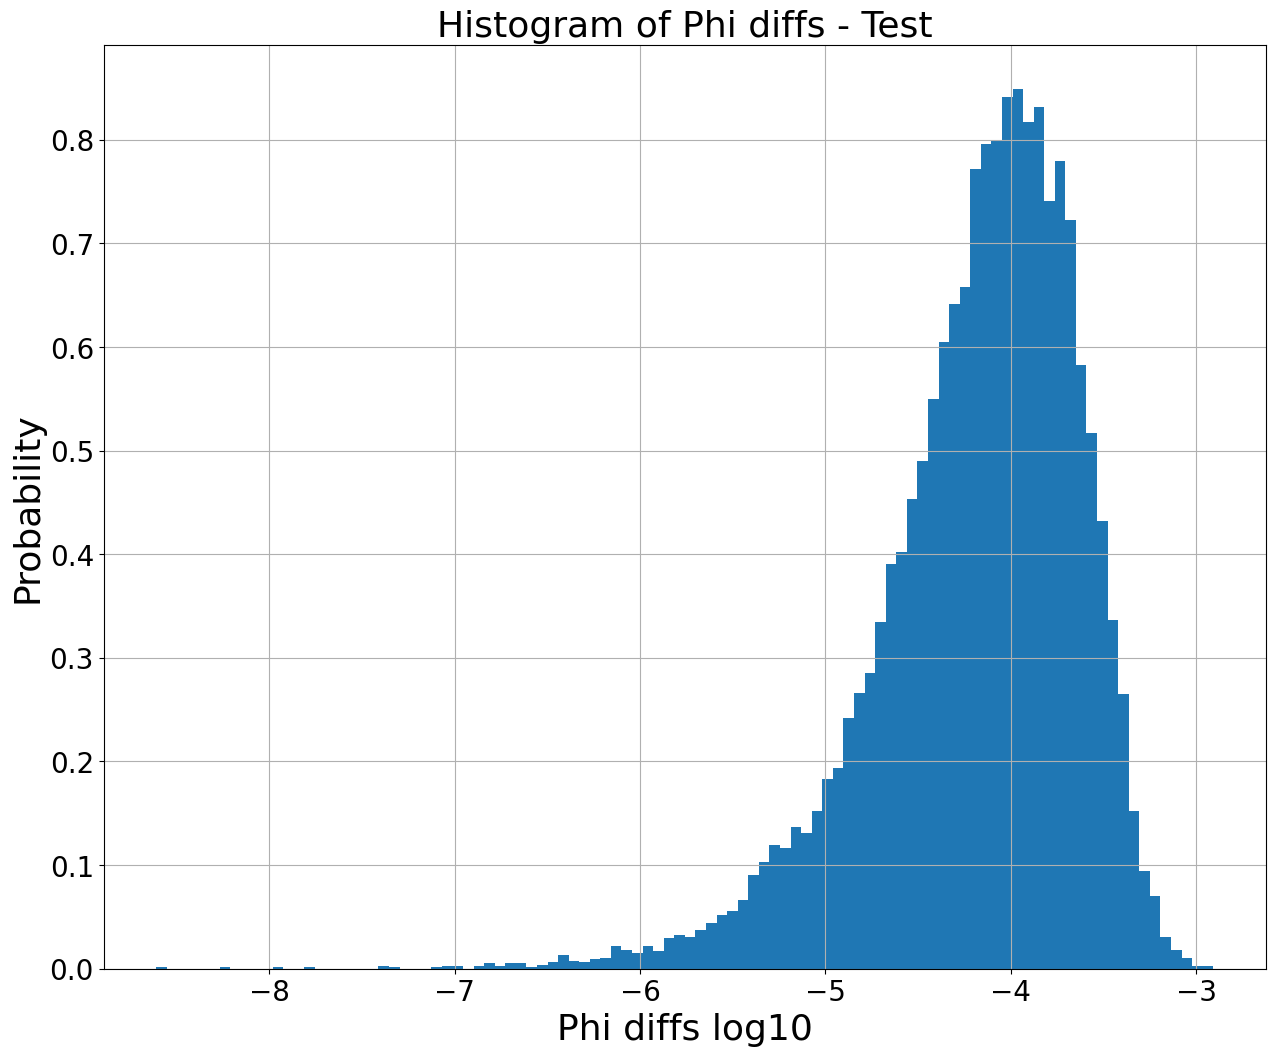

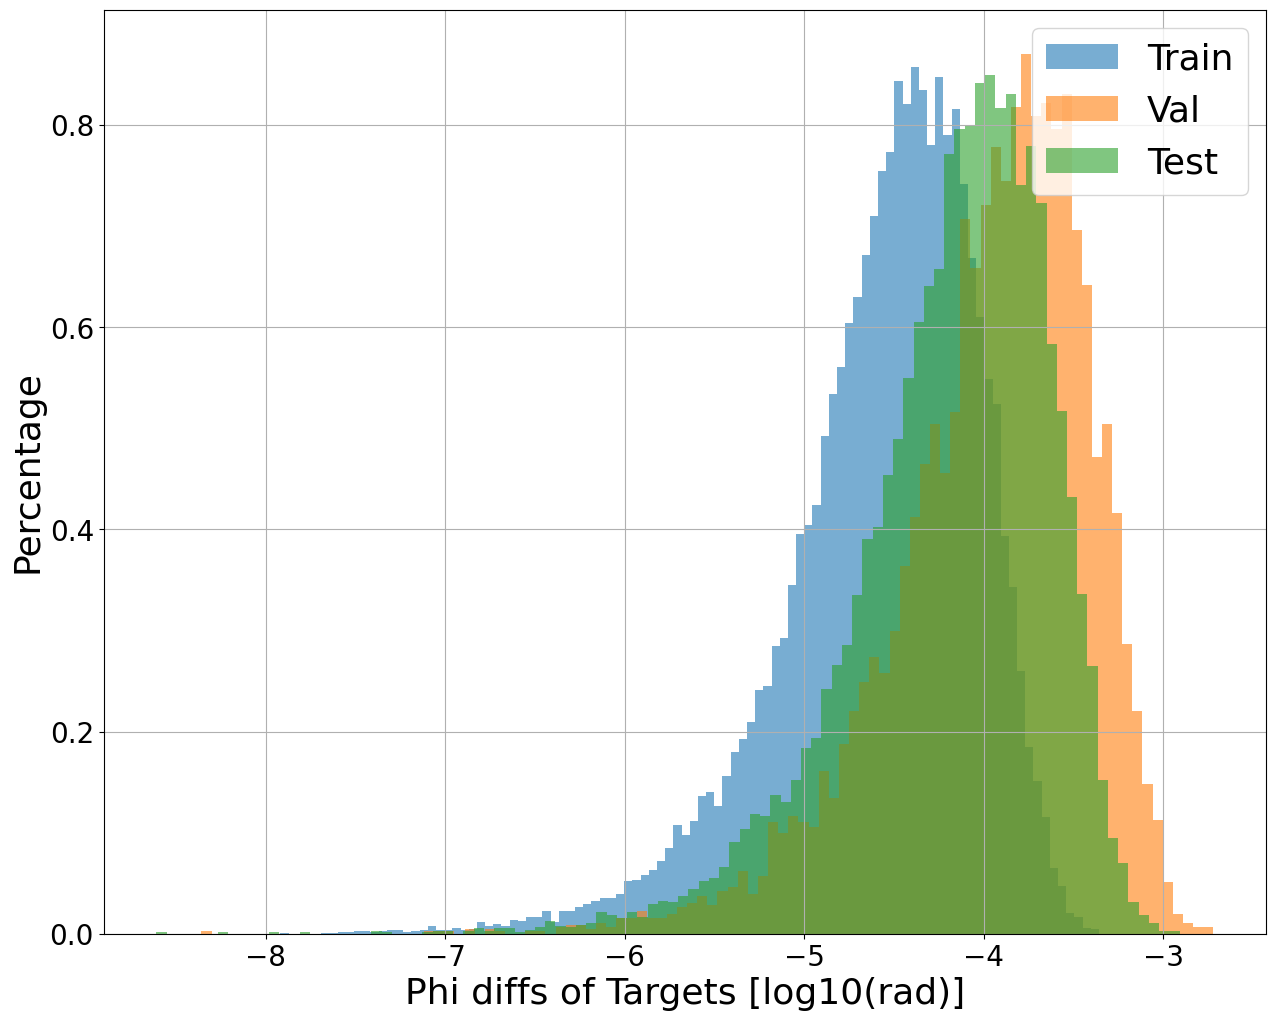

In [52]:
train_flat_phis_sorted=np.sort(train_flat_phis)
val_flat_phis_sorted=np.sort(val_flat_phis)
test_flat_phis_sorted=np.sort(test_flat_phis)

train_phis_diff=train_flat_phis_sorted[1:]-train_flat_phis_sorted[:-1]
val_phis_diff=val_flat_phis_sorted[1:]-val_flat_phis_sorted[:-1]
test_phis_diff=test_flat_phis_sorted[1:]-test_flat_phis_sorted[:-1]

train_phis_diff_log10=np.log10(train_phis_diff+1e-8)
val_phis_diff_log10=np.log10(val_phis_diff)
test_phis_diff_log10=np.log10(test_phis_diff)

bins_num=100
density=True

plot_hist(train_phis_diff_log10,bins_num,density,'Phi diffs log10','Probability','Phi diffs - Train')
plot_hist(val_phis_diff_log10,bins_num,density,'Phi diffs log10','Probability','Phi diffs - Val')
plot_hist(test_phis_diff_log10,bins_num,density,'Phi diffs log10','Probability','Phi diffs - Test')

plot_hist_all(train_phis_diff_log10,val_phis_diff_log10,test_phis_diff_log10,bins_num,'Phi diffs of Targets [log10(rad)]','Phi diffs of Targets log10')



## Range-Theta-Phi

In [54]:
def plot2dhist(ar1,ar2,bins,xlabel,ylabel,title):
  plt.hist2d(ar1, ar2, bins=bins)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.colorbar()
  plt.show()

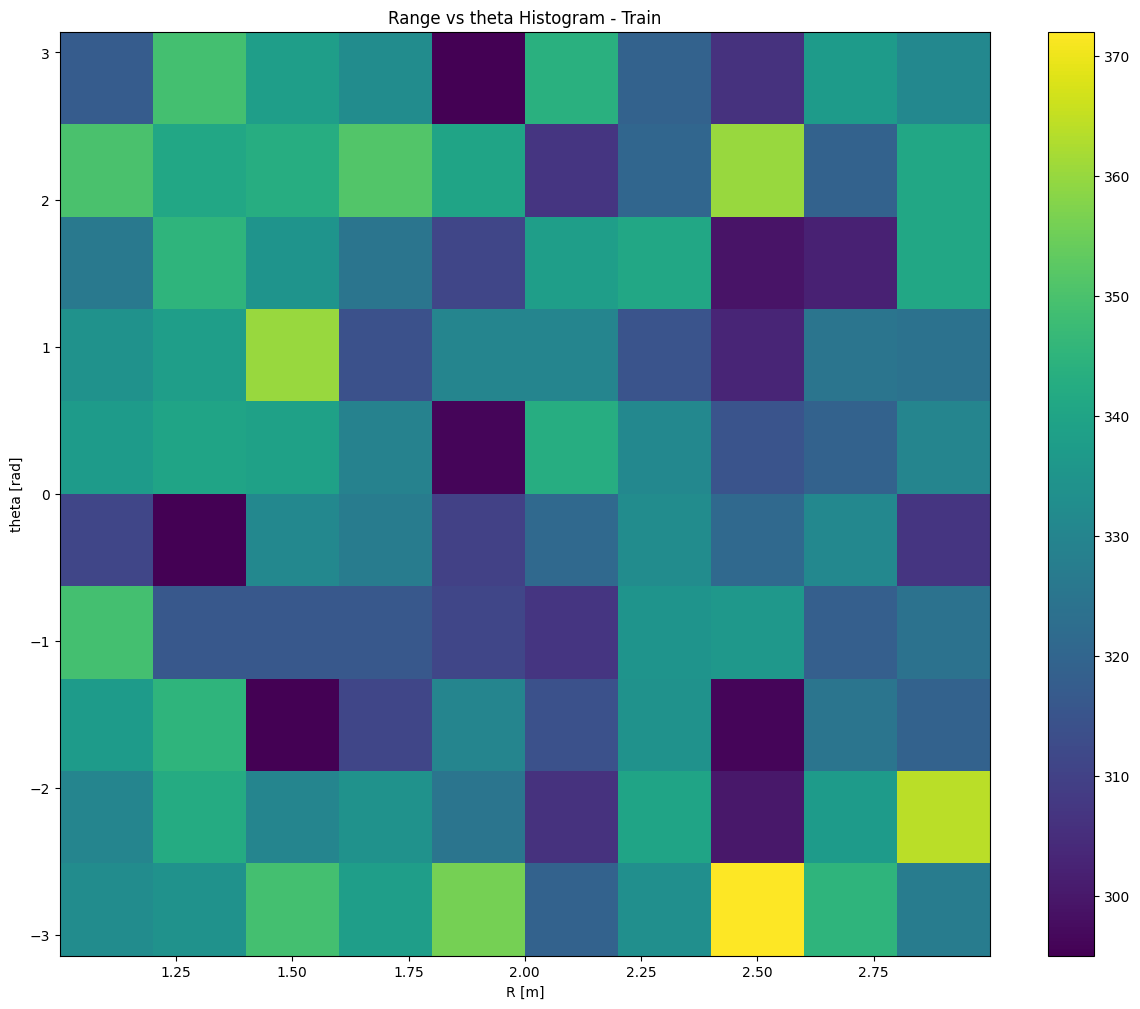

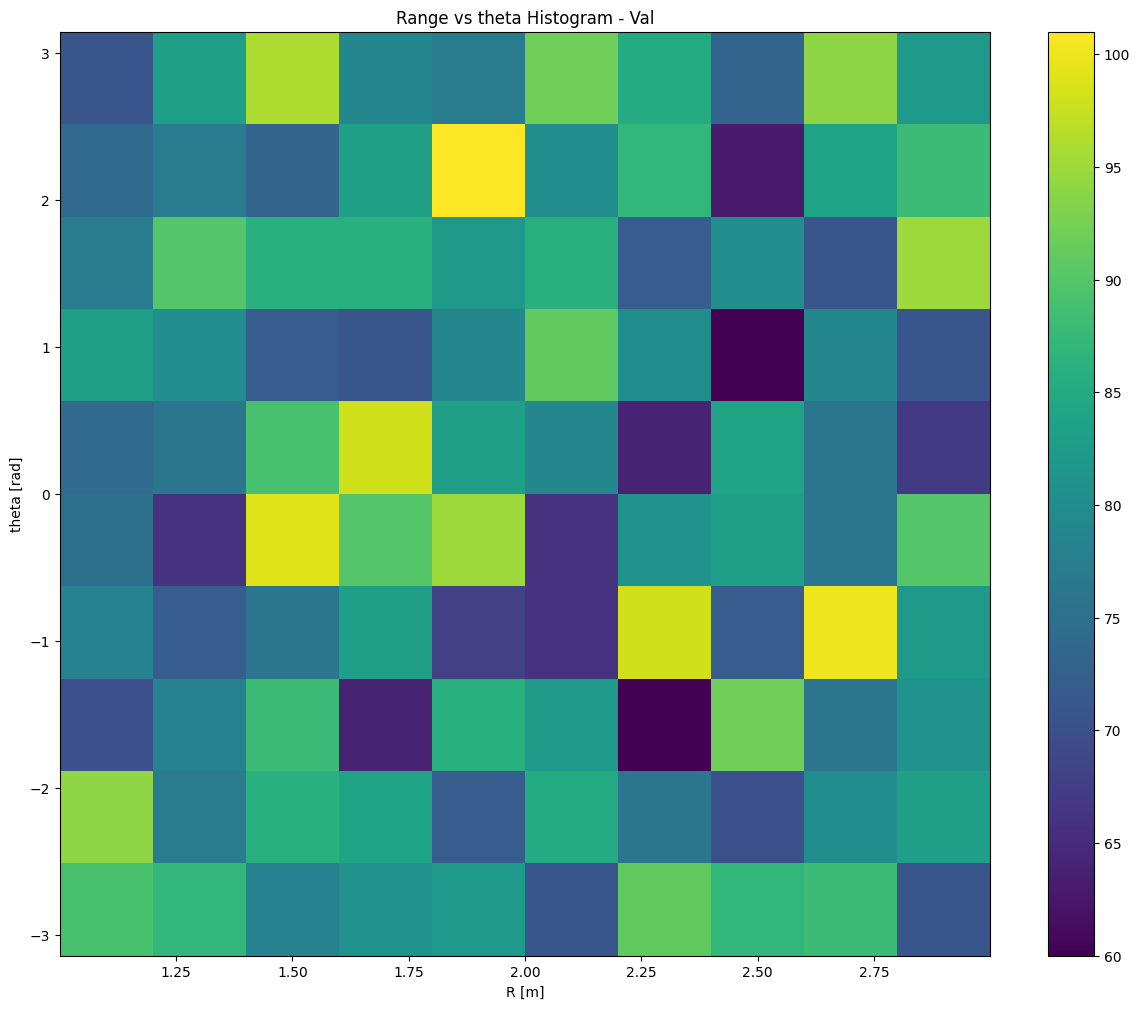

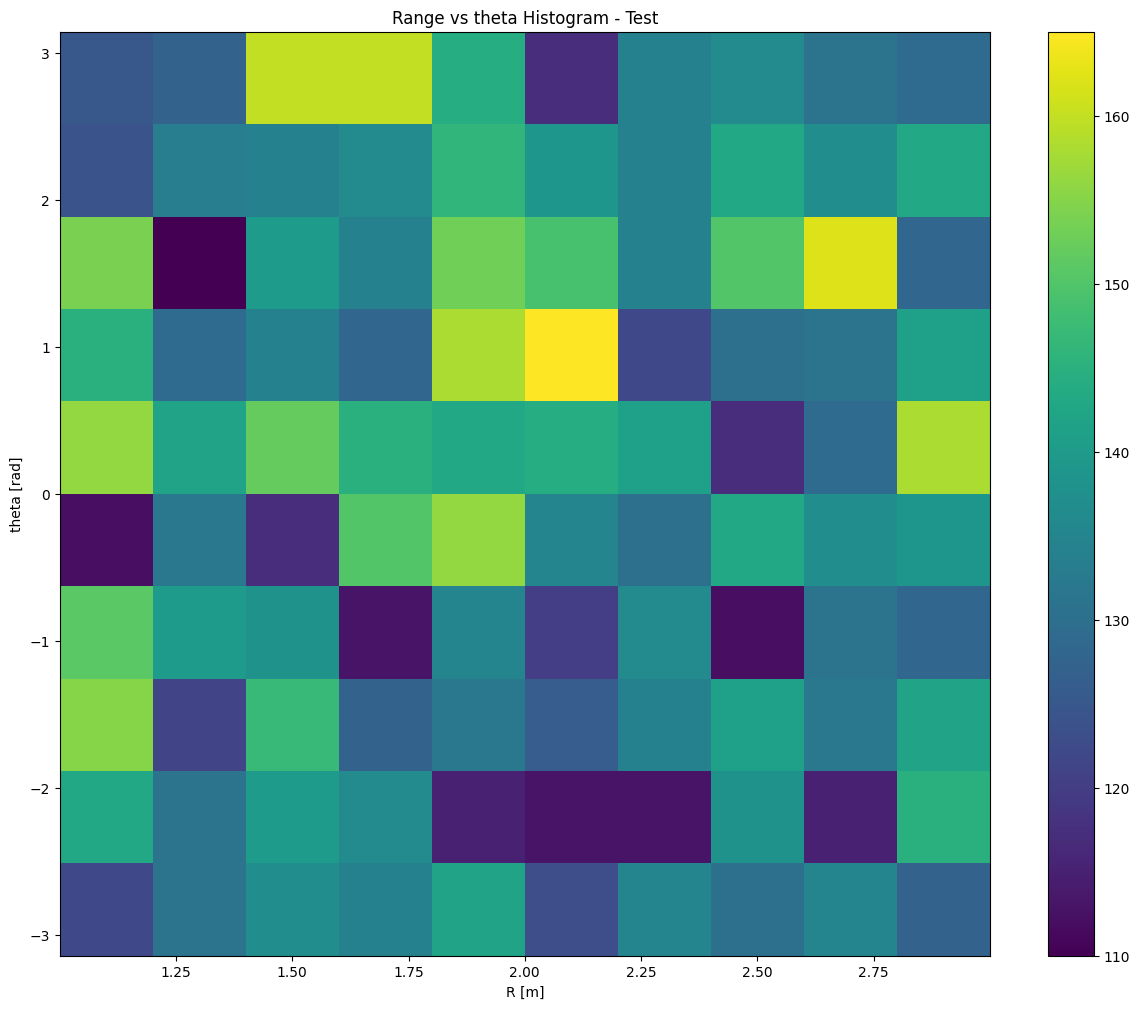

In [55]:
plot2dhist(train_ranges_flat,train_flat_thetas,10,"R [m]","theta [rad]","Range vs theta Histogram - Train")
plot2dhist(val_ranges_flat,val_flat_thetas,10,"R [m]","theta [rad]","Range vs theta Histogram - Val")
plot2dhist(test_ranges_flat,test_flat_thetas,10,"R [m]","theta [rad]","Range vs theta Histogram - Test")

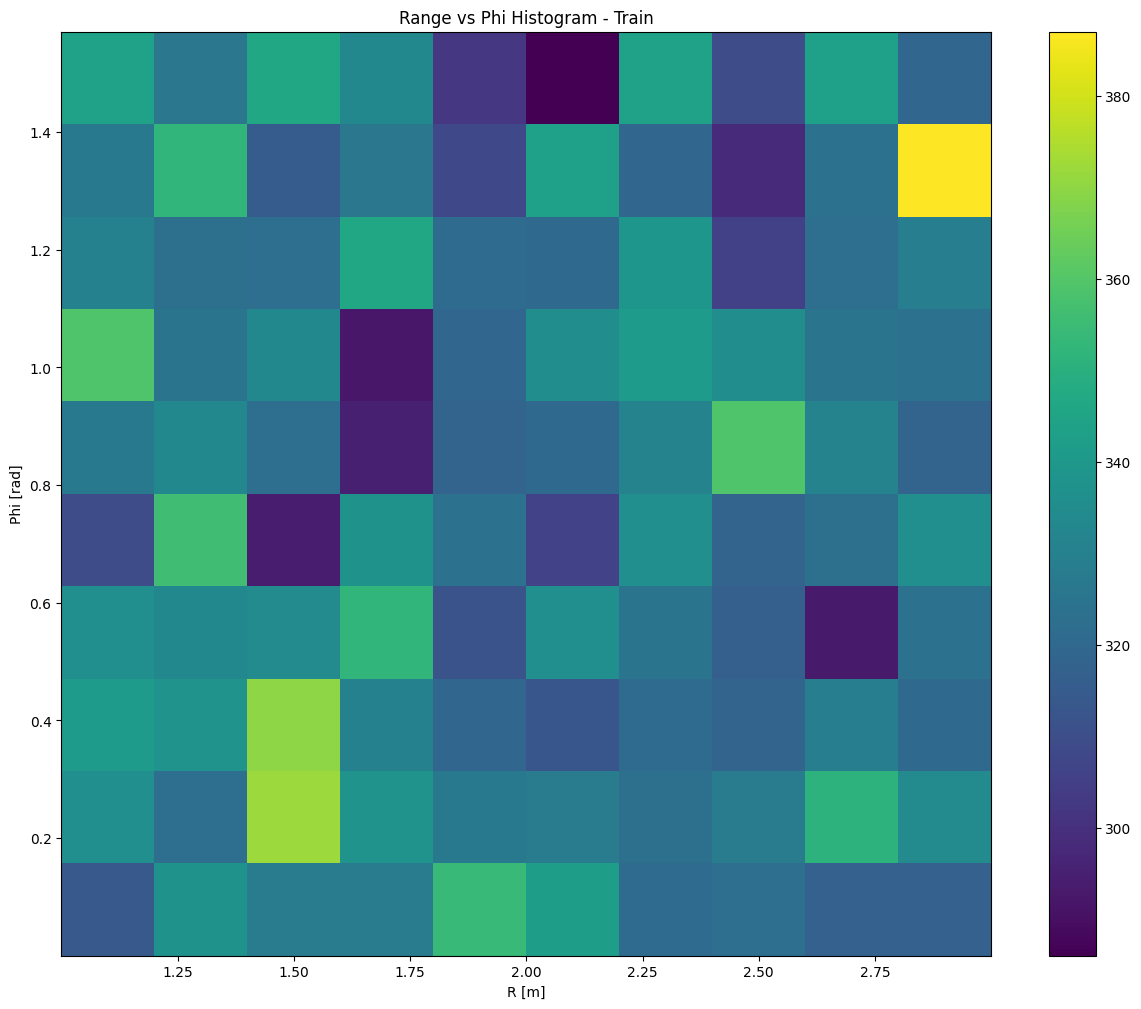

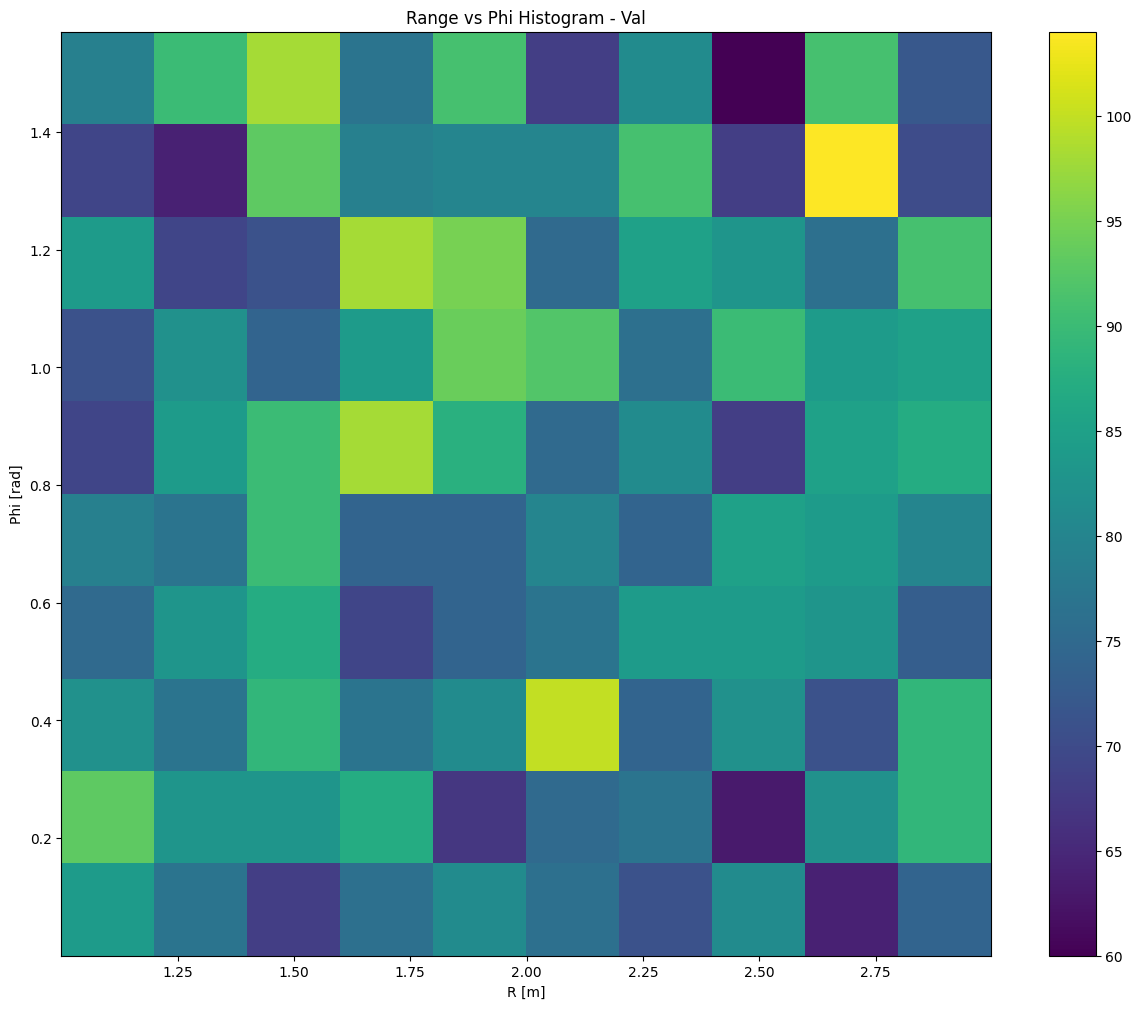

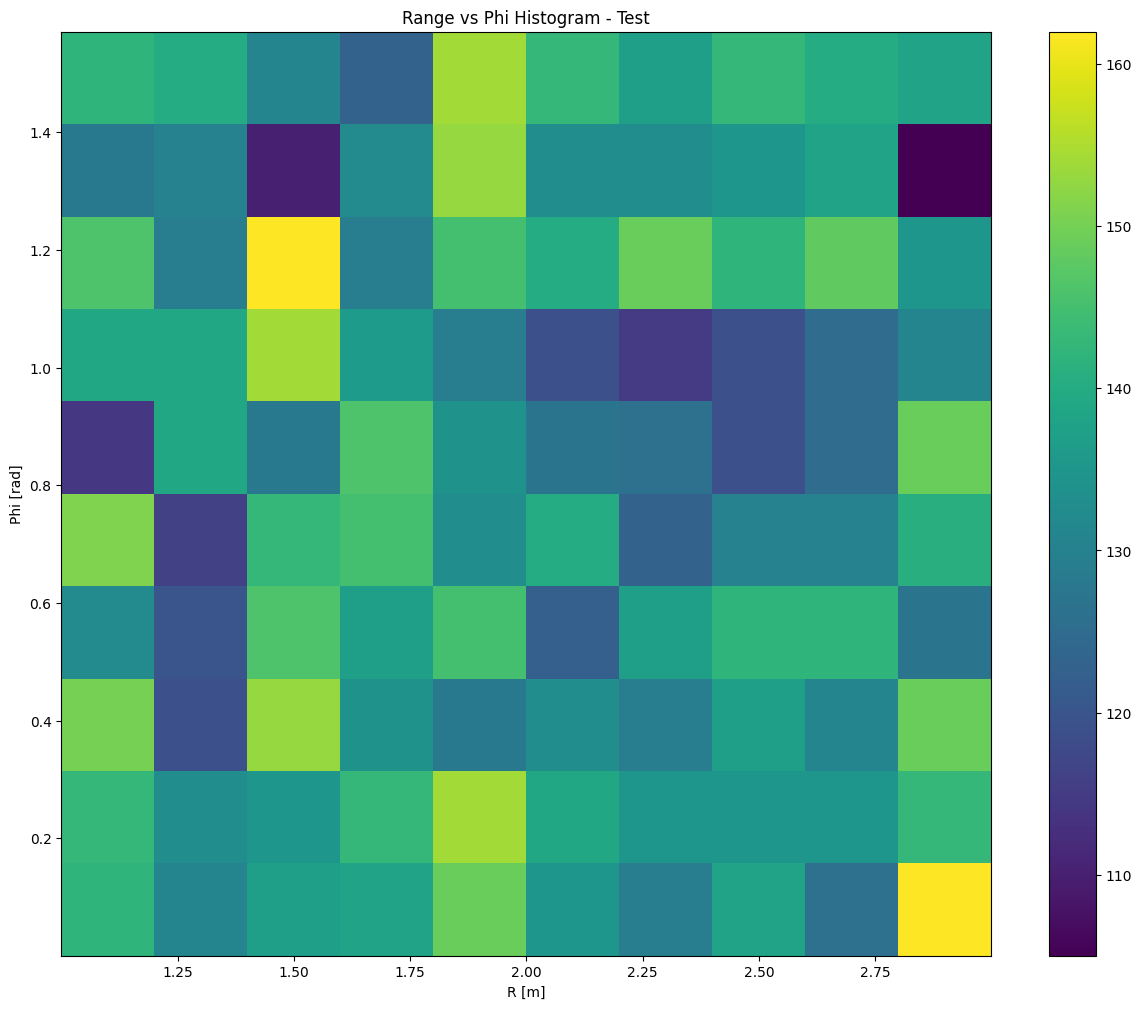

In [56]:
plot2dhist(train_ranges_flat,train_flat_phis,10,"R [m]","Phi [rad]","Range vs Phi Histogram - Train")
plot2dhist(val_ranges_flat,val_flat_phis,10,"R [m]","Phi [rad]","Range vs Phi Histogram - Val")
plot2dhist(test_ranges_flat,test_flat_phis,10,"R [m]","Phi [rad]","Range vs Phi Histogram - Test")

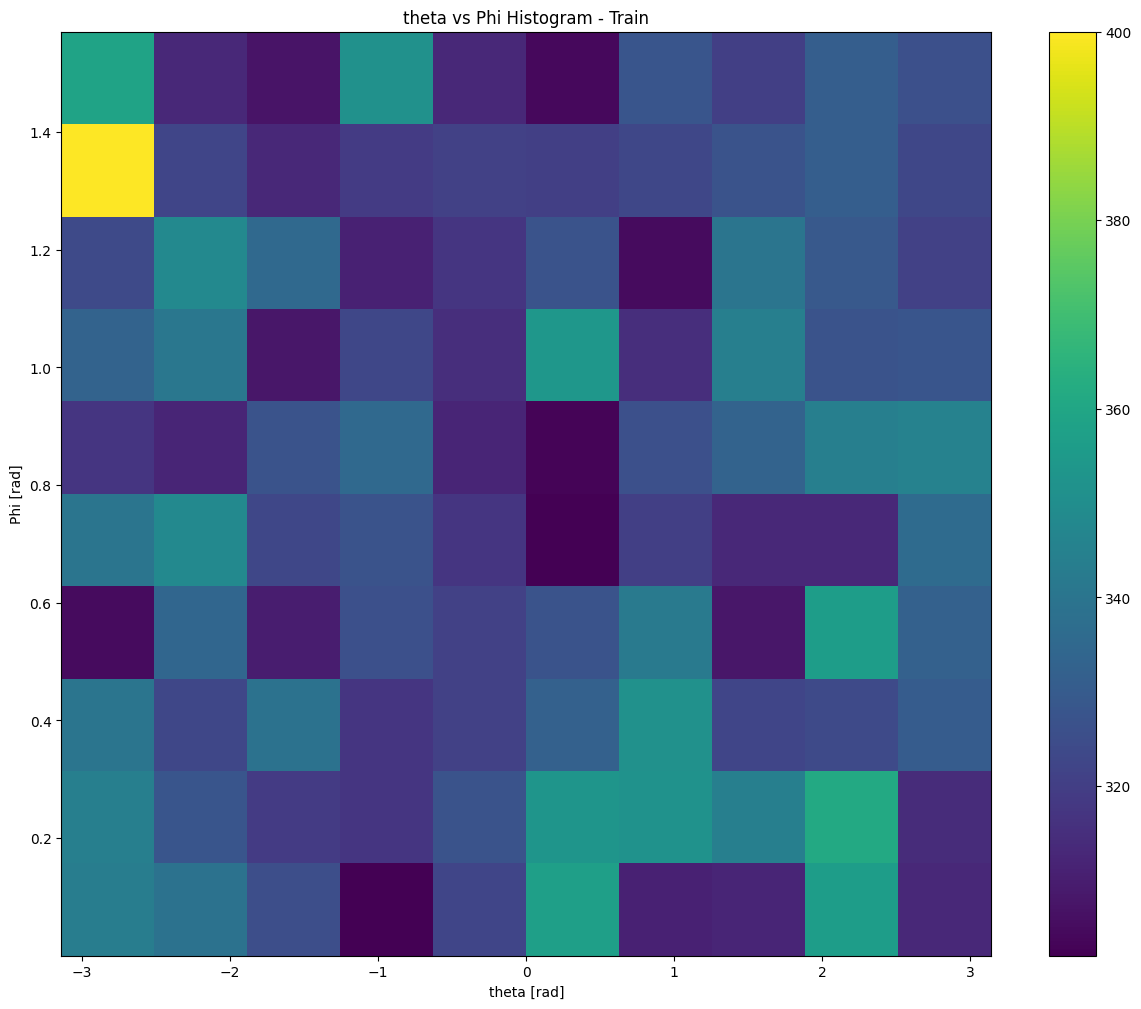

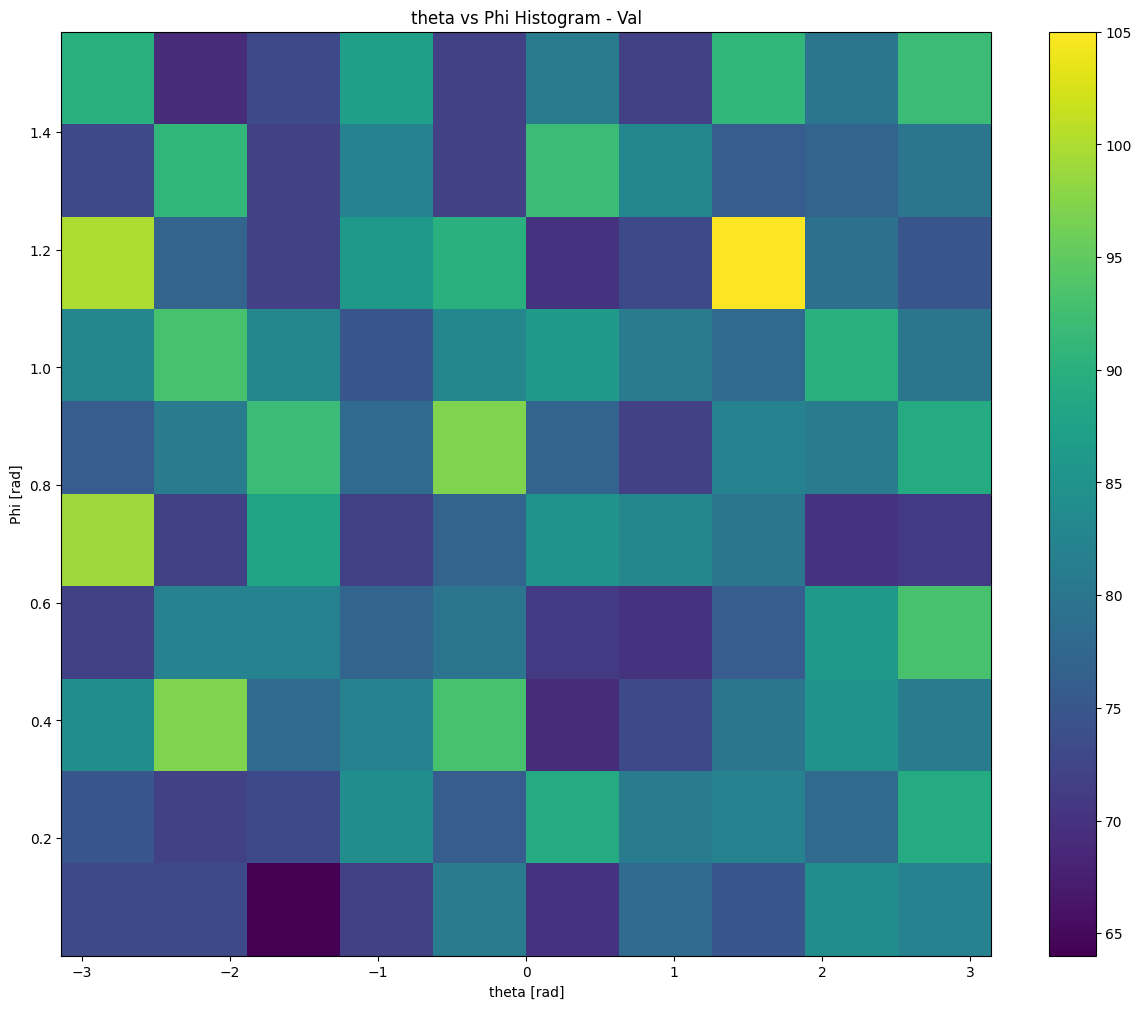

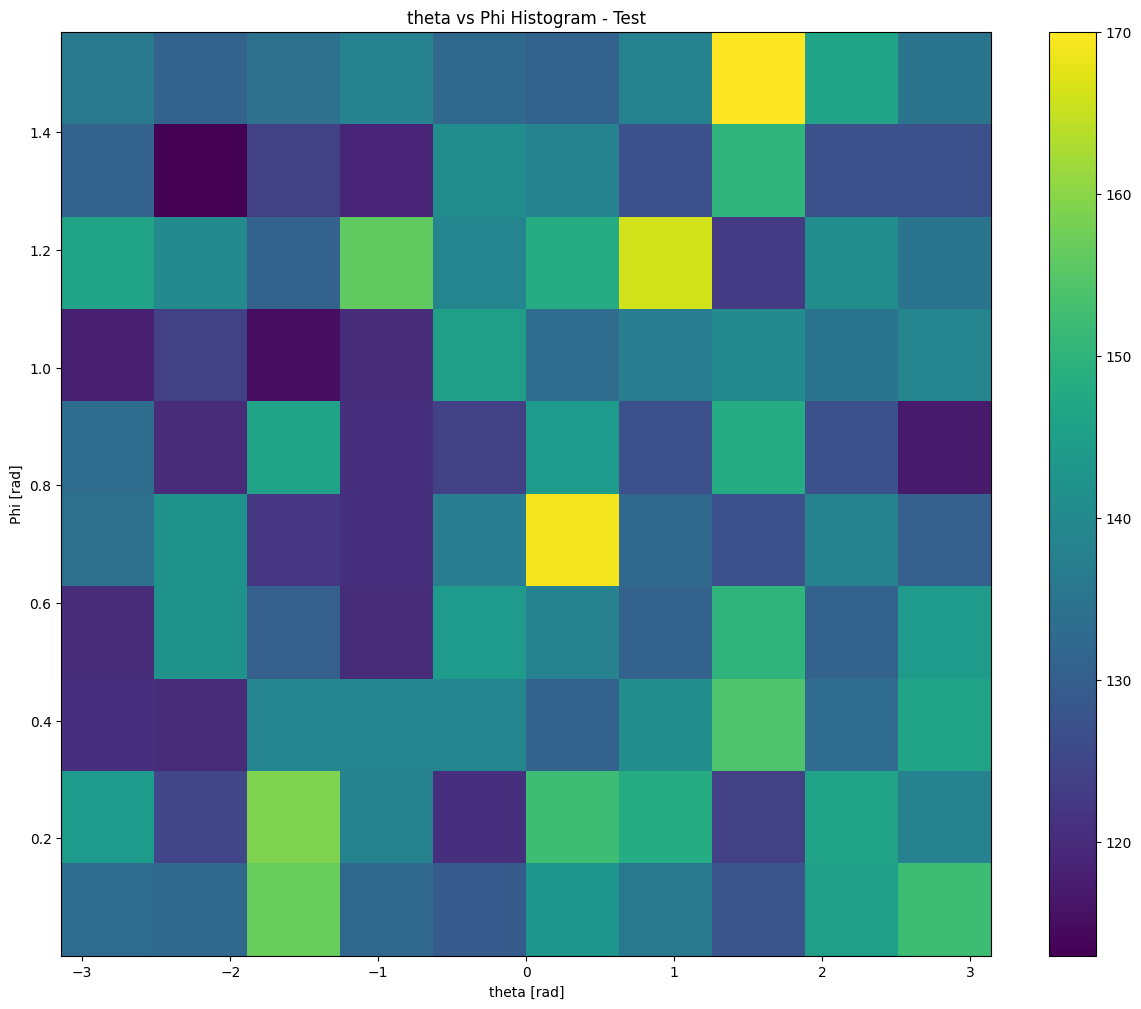

In [57]:
plot2dhist(train_flat_thetas,train_flat_phis,10,"theta [rad]","Phi [rad]","theta vs Phi Histogram - Train")
plot2dhist(val_flat_thetas,val_flat_phis,10,"theta [rad]","Phi [rad]","theta vs Phi Histogram - Val")
plot2dhist(test_flat_thetas,test_flat_phis,10,"theta [rad]","Phi [rad]","theta vs Phi Histogram - Test")

In [58]:
def sph2cart(cord):
  r = cord[:, 0]
  theta = cord[:, 1]
  phi = cord[:, 2]
  x = r * (np.sin(phi) * np.cos(theta))
  y = r * (np.sin(phi) * np.sin(theta))
  z = r * np.cos(phi)

  return np.vstack((x, y, z)).T

def dist2points_cart(cord1, cord2):
  return  np.sqrt(np.sum((cord1-cord2)**2, axis = 1))

import gc
import pandas as pd
from itertools import combinations
from scipy.spatial.distance import pdist

def compute_differences(arr):
    # create a generator expression to compute pairs on-the-fly
    pairs = combinations(arr, 2)

    # process pairs one at a time and yield differences
    for pair in pairs:
        yield pair[1] - pair[0]

def dist_3d_func(r_ar,theta_ar,phi_ar):
  length = len(r_ar)
  print(length)
  data = np.vstack((r_ar, theta_ar, phi_ar)).T
  data_cart = sph2cart(data)

  dist_ar = pdist(data_cart)

  return np.sort(dist_ar)

32788
8048
13573


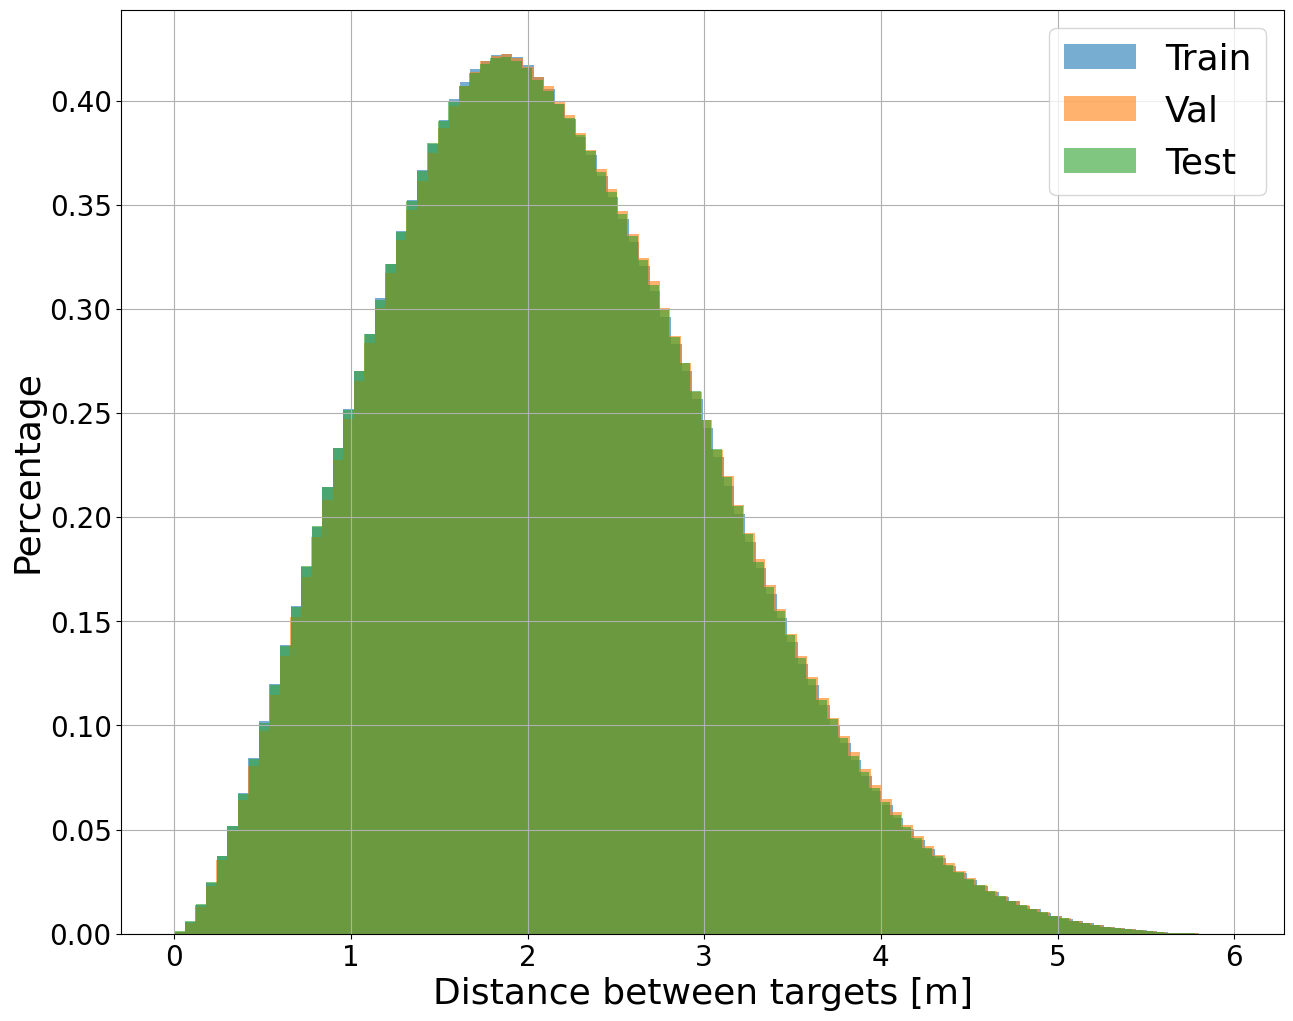

In [59]:
dist_ar_train = dist_3d_func(train_ranges_flat, train_flat_thetas, train_flat_phis)
dist_ar_val = dist_3d_func(val_ranges_flat, val_flat_thetas, val_flat_phis)
dist_ar_test = dist_3d_func(test_ranges_flat, test_flat_thetas, test_flat_phis)

plot_hist_all(dist_ar_train,dist_ar_val,dist_ar_test,100,'Distance between targets [m]','Distance between targets')

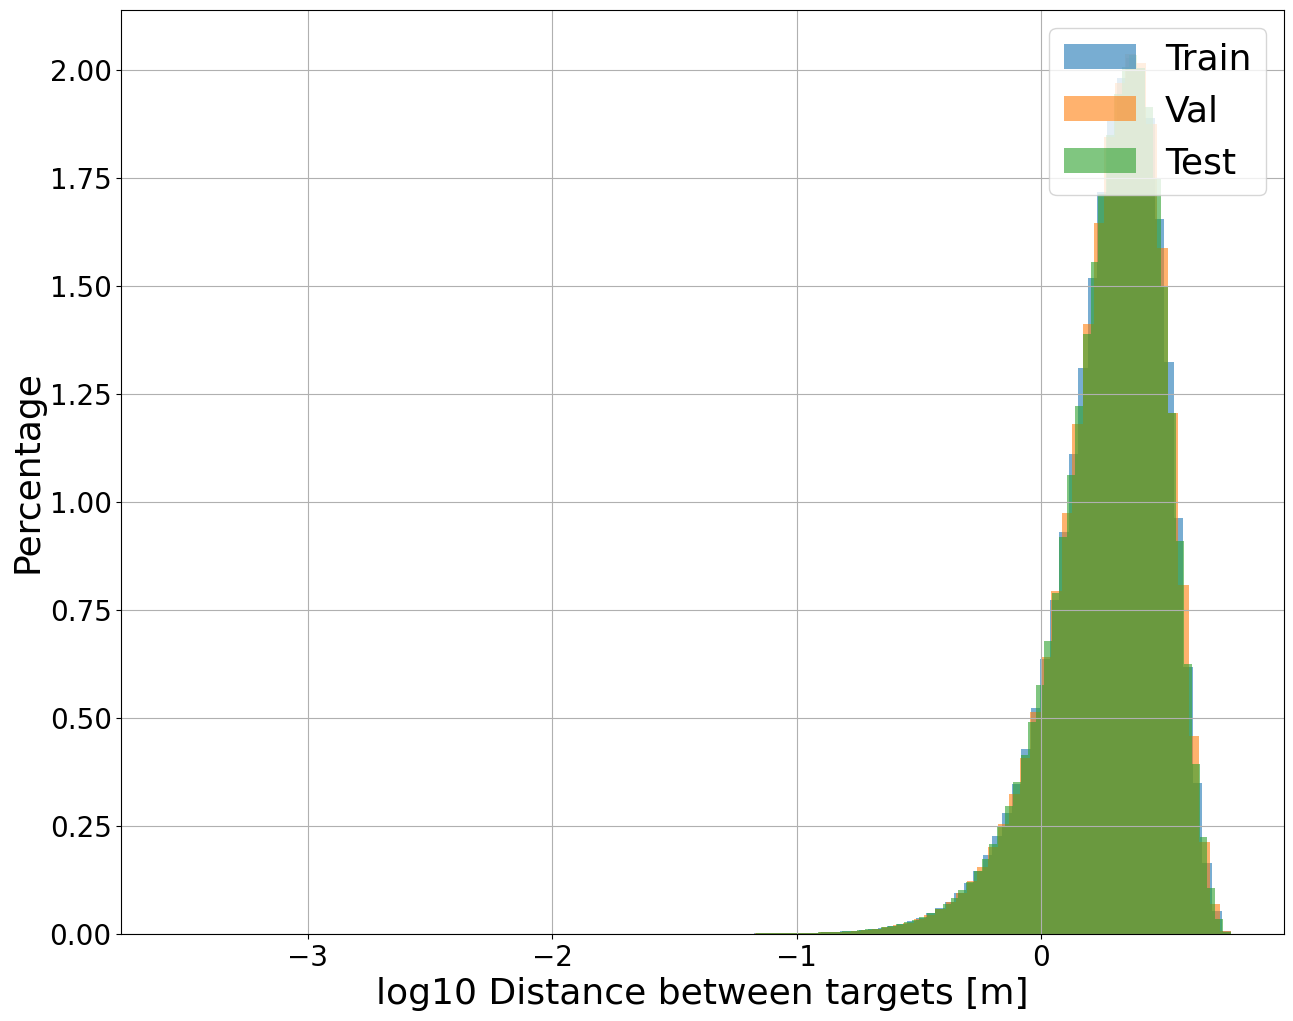

In [60]:
plot_hist_all(np.log10(dist_ar_train),np.log10(dist_ar_val),np.log10(dist_ar_test),100,'log10 Distance between targets [m]','log10 Distance between targets')

In [61]:
print(dist_ar_train[:100])
print(dist_ar_val[:100])
print(dist_ar_test[:100])

[0.00074561 0.00157013 0.00186611 0.00188823 0.00232262 0.00243452
 0.0024959  0.00250409 0.00252835 0.00256799 0.00276007 0.00277669
 0.00318743 0.00319499 0.00347617 0.00354591 0.00362315 0.00386485
 0.00391811 0.00396094 0.00402584 0.00405468 0.00409764 0.00419631
 0.00447537 0.00455981 0.00458374 0.00464965 0.00466822 0.00472821
 0.00475627 0.00476703 0.00481468 0.00519285 0.00520768 0.00525858
 0.00540347 0.00545099 0.00546344 0.00553126 0.00560289 0.00563345
 0.00575049 0.00578902 0.00584651 0.00589102 0.00598645 0.00598914
 0.006007   0.00605434 0.00616761 0.00630382 0.00635956 0.00637194
 0.00641656 0.00647765 0.00648833 0.00651933 0.00656529 0.00658243
 0.00668742 0.00673013 0.00683406 0.00691162 0.00696826 0.00700223
 0.00700571 0.00717542 0.00720989 0.00732059 0.00733843 0.00734279
 0.00736336 0.0074264  0.00743692 0.00746333 0.00746676 0.00751507
 0.00755264 0.00759074 0.00760139 0.00766664 0.00777829 0.00778071
 0.00779287 0.00779807 0.00785927 0.00786375 0.00790134 0.0079

# Waveforms - Features

[0.55791   0.0080528 1.3077953 ... 0.7215892 1.3989171 0.9037135]
12330


C:\Users\nurie\AppData\Local\Temp\ipykernel_16848\2867733994.py:17: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(train_waveforms[5000]))


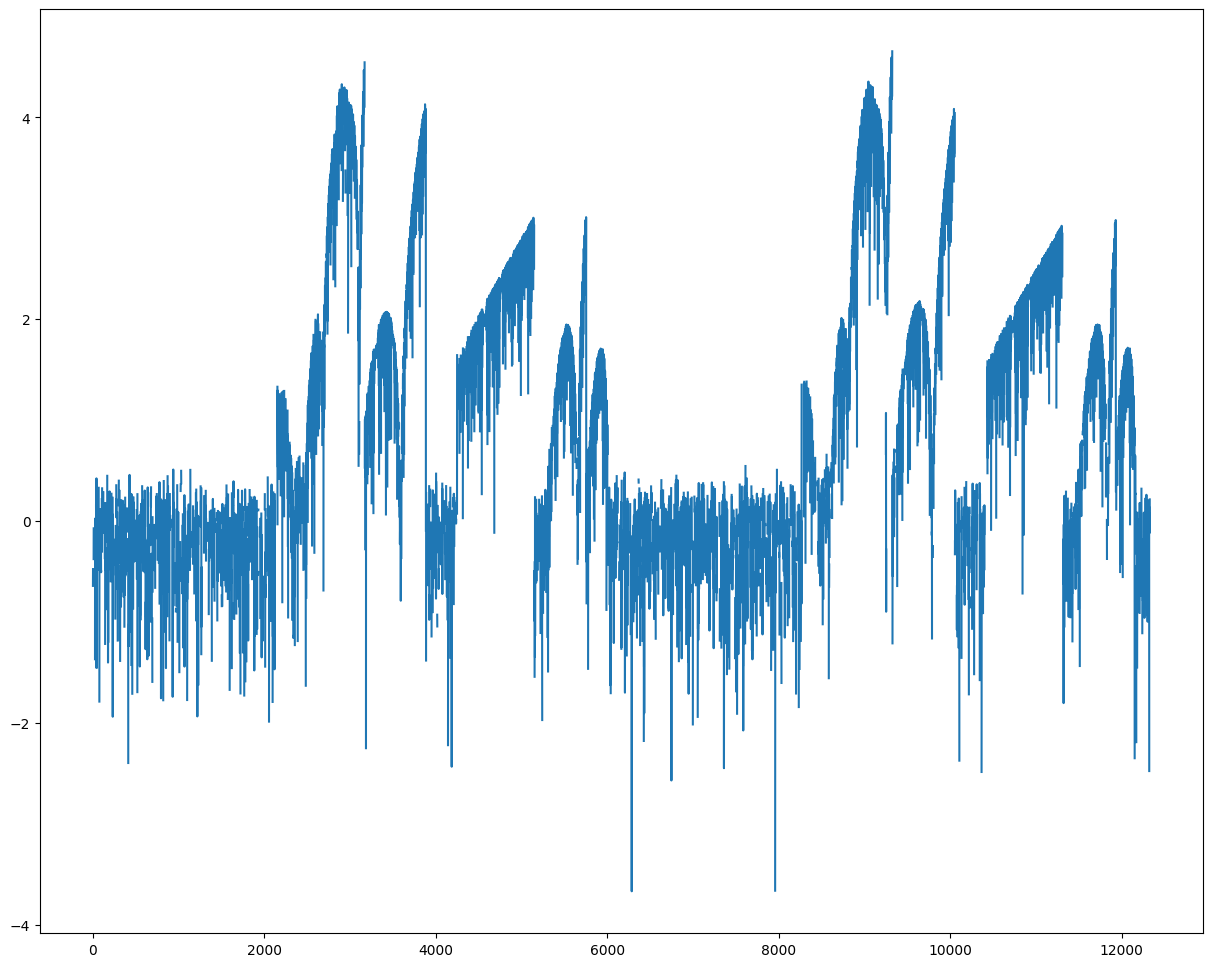

In [62]:
train_waveforms=[train_set[i,:][0].cpu().detach().numpy() for i in range(len(train_set)) ]
val_waveforms=[val_set[i,:][0].cpu().detach().numpy() for i in range(len(val_set)) ]
test_waveforms=[test_set[i,:][0].cpu().detach().numpy() for i in range(len(test_set)) ]

print(train_waveforms[0])
print(len(train_waveforms[0]))

f_sample=params.F_SAMPLE
t_arr=np.array(range(len(train_waveforms[5000])))/f_sample

df = pd.DataFrame(train_waveforms[5000])
df.to_csv("echo_power_5000.csv", header=False, index=False)

df = pd.DataFrame(t_arr)
df.to_csv("echo_time_5000.csv", header=False, index=False)

plt.plot(np.log10(train_waveforms[5000]))

In [64]:
from torch.utils.data import DataLoader
dataloader = DataLoader(train_set, batch_size=1, shuffle=False)
for waveform, labels, seg_mask in dataloader:
  if waveform.shape[1] != 12330:
    print(waveform.shape[1])
  if labels.shape[1] != 30:
    print(labels.shape[1])
  if seg_mask.shape[1] != 12330:
    print(seg_mask.shape[1])


In [65]:
def moving_max(ar,n):
  m_max = np.copy(ar)
  for i in range(1,n):
    m_max[i] = np.max(np.abs(ar[:i]))
  for i in range(n,len(ar)):
    m_max[i] = np.max(np.abs(ar[i-n:i]))

  return m_max

def waveform_analysis_per_echo(train_waveforms,train_ranges):
  pr_over_noise_ar = np.array([])
  snr_ar = np.array([])
  for waveform, ranges in zip(train_waveforms,train_ranges):
    for range in ranges:
      ind_start = int(range*params.DISTANCE2IND)
      ind_end = ind_start+params.TX_SIGNAL_LENGTH_IND
      echo = waveform[ind_start:ind_end]
      where_over_noise = np.where(moving_max(echo,10)>4)[0]
      pr_over_noise = len(where_over_noise) / params.TX_SIGNAL_LENGTH_IND
      pr_over_noise_ar = np.append(pr_over_noise_ar, pr_over_noise)

      snr_echo = np.mean(np.abs(echo))
      snr_ar = np.append(snr_ar,snr_echo)

  return pr_over_noise_ar, snr_ar

def log10_ar(ar):
  ar = np.copy(ar)
  ind_pos = np.where(ar>0)[0]
  ind_zero = np.where(ar==0)[0]
  ind_neg = np.where(ar<0)[0]

  ar[ind_pos]=np.log10(ar[ind_pos])
  ar[ind_zero]=0
  ar[ind_neg]=-np.log10(-ar[ind_neg])

  return ar

In [66]:
train_pr_over_noise_ar, train_snr_ar = waveform_analysis_per_echo(train_waveforms,train_ranges)
val_pr_over_noise_ar, val_snr_ar = waveform_analysis_per_echo(val_waveforms,val_ranges)
test_pr_over_noise_ar, test_snr_ar = waveform_analysis_per_echo(test_waveforms,test_ranges)

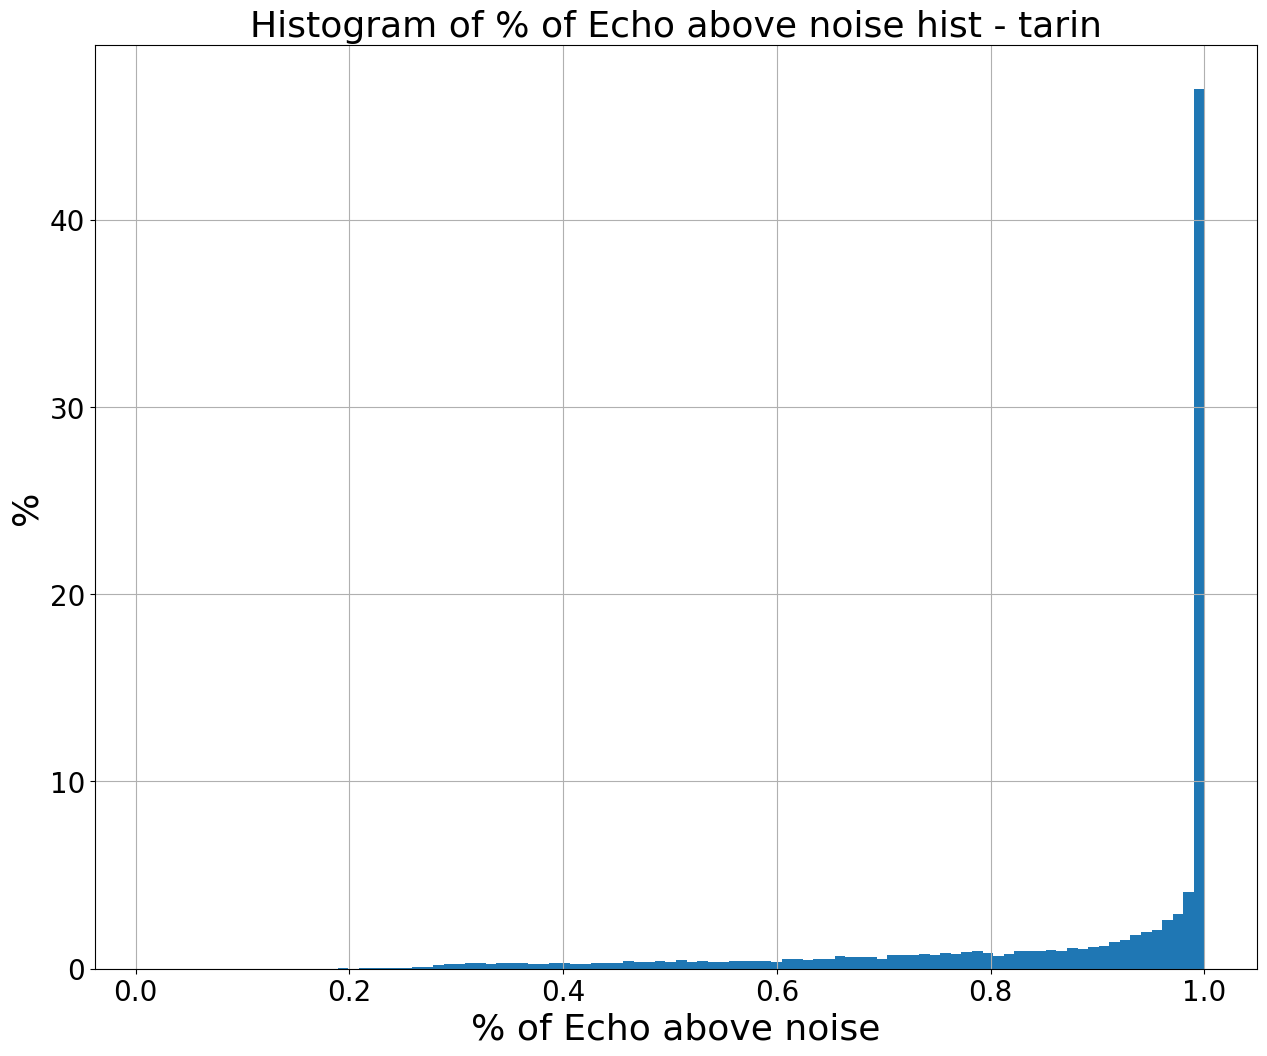

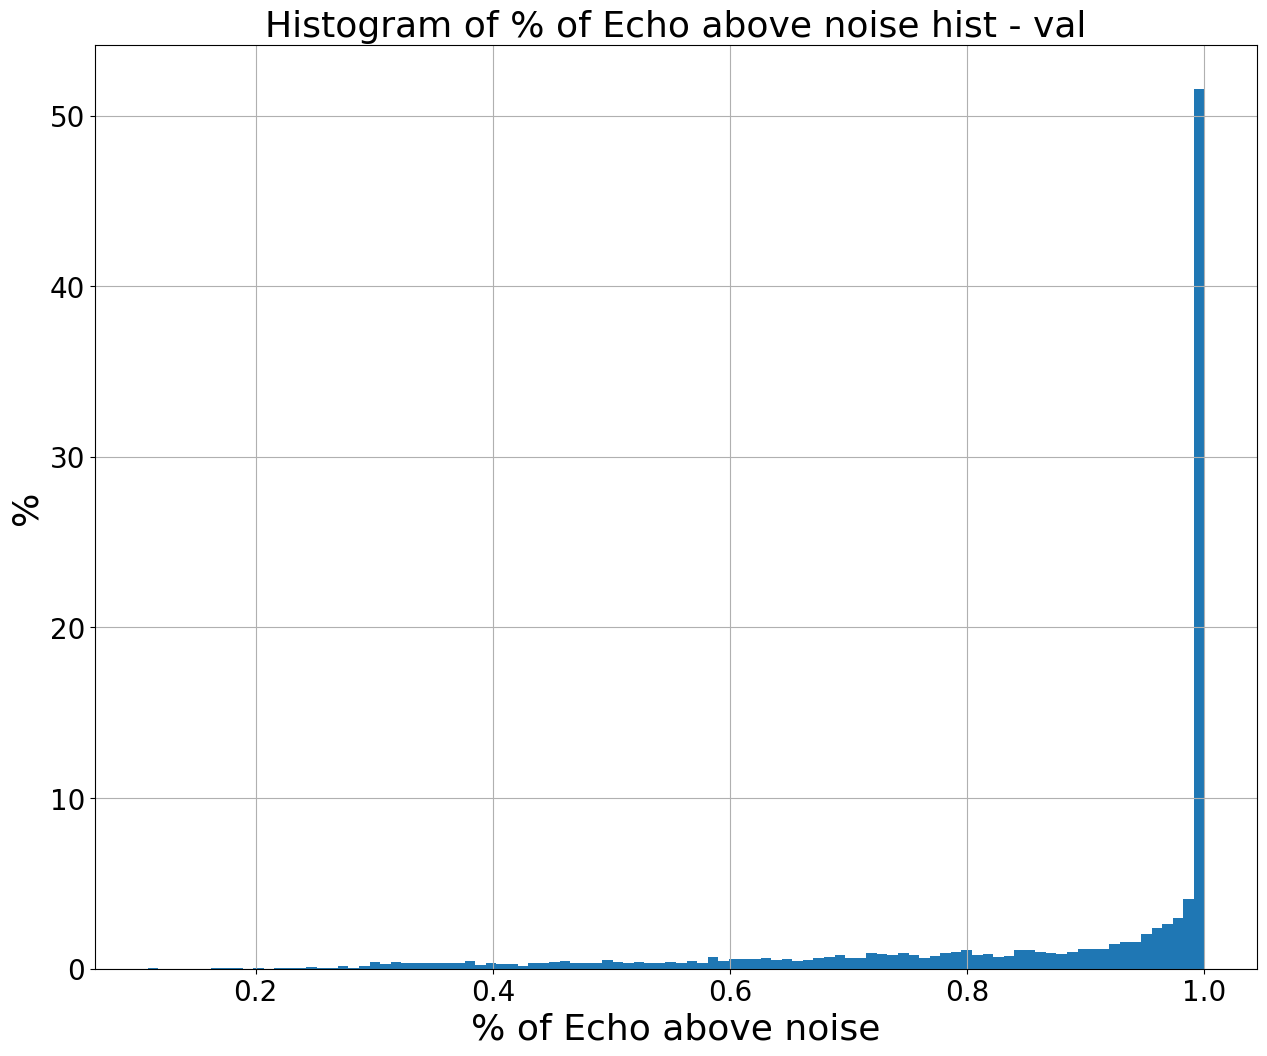

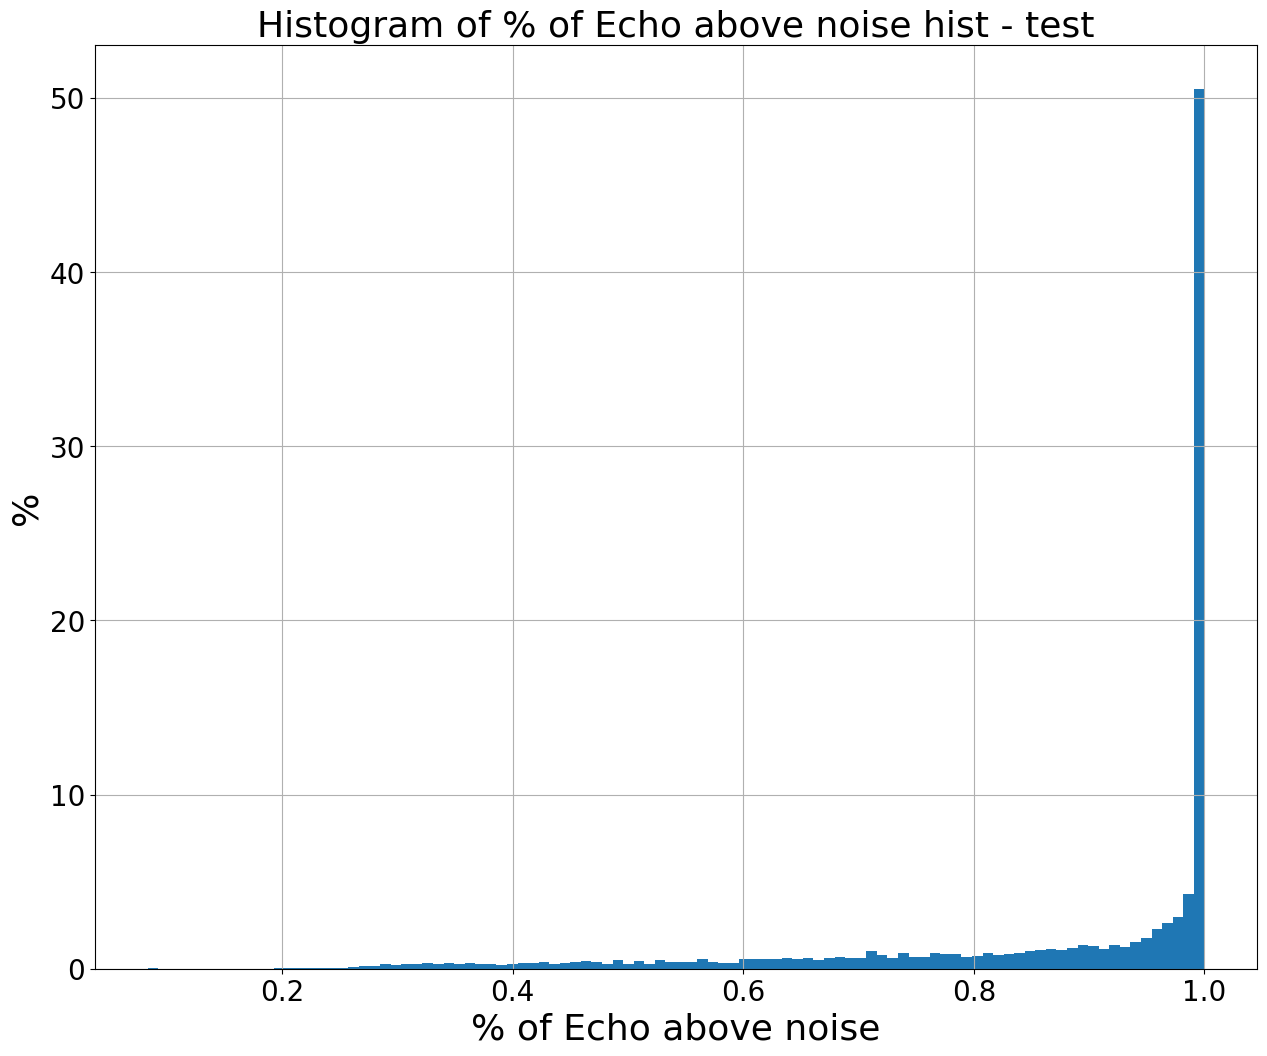

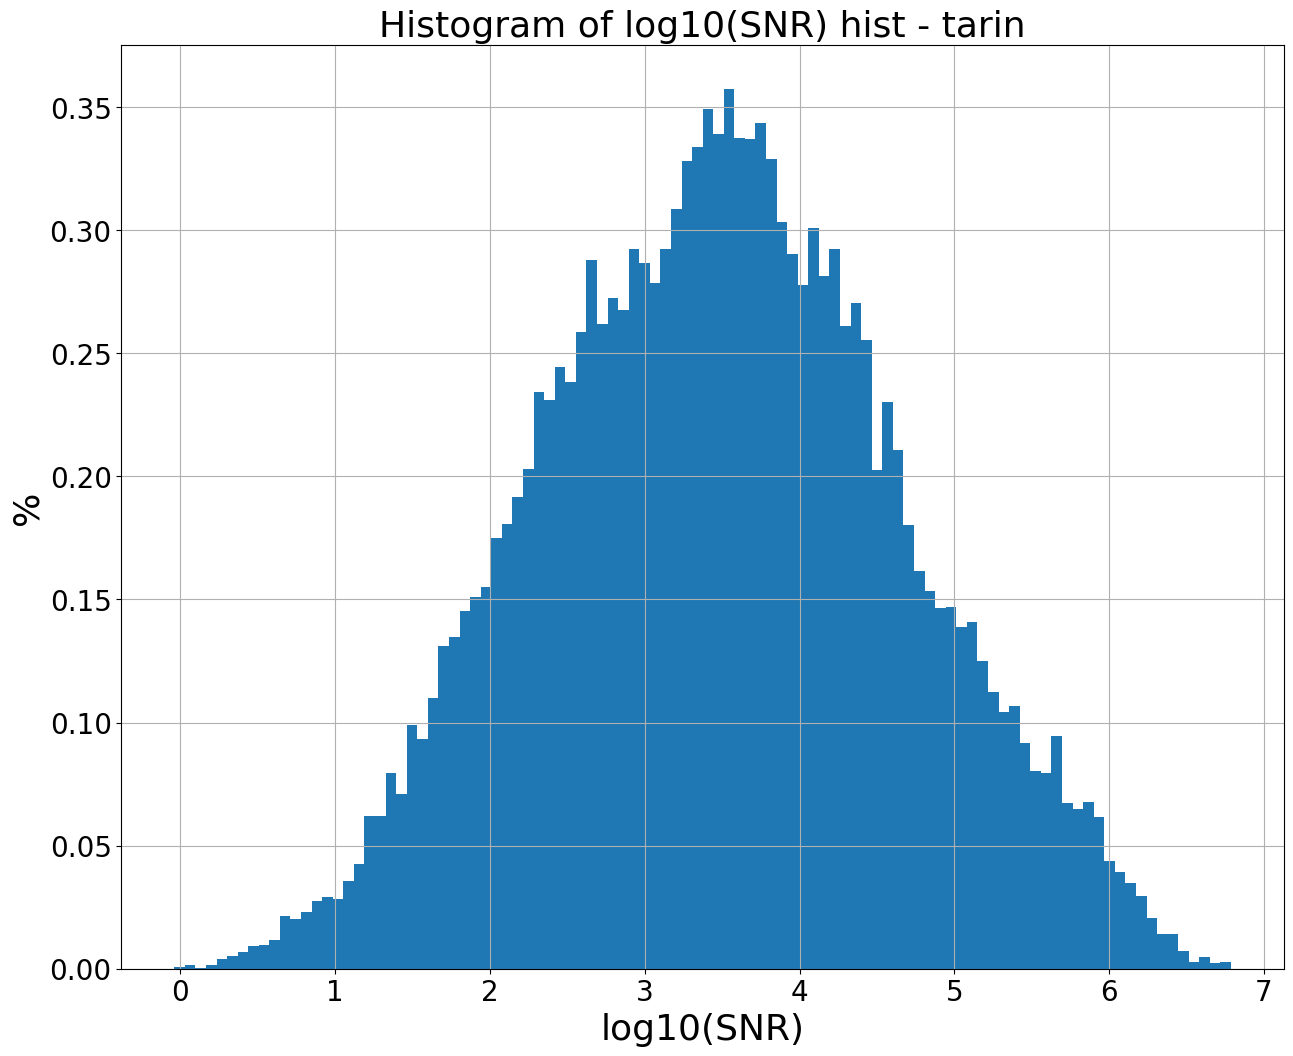

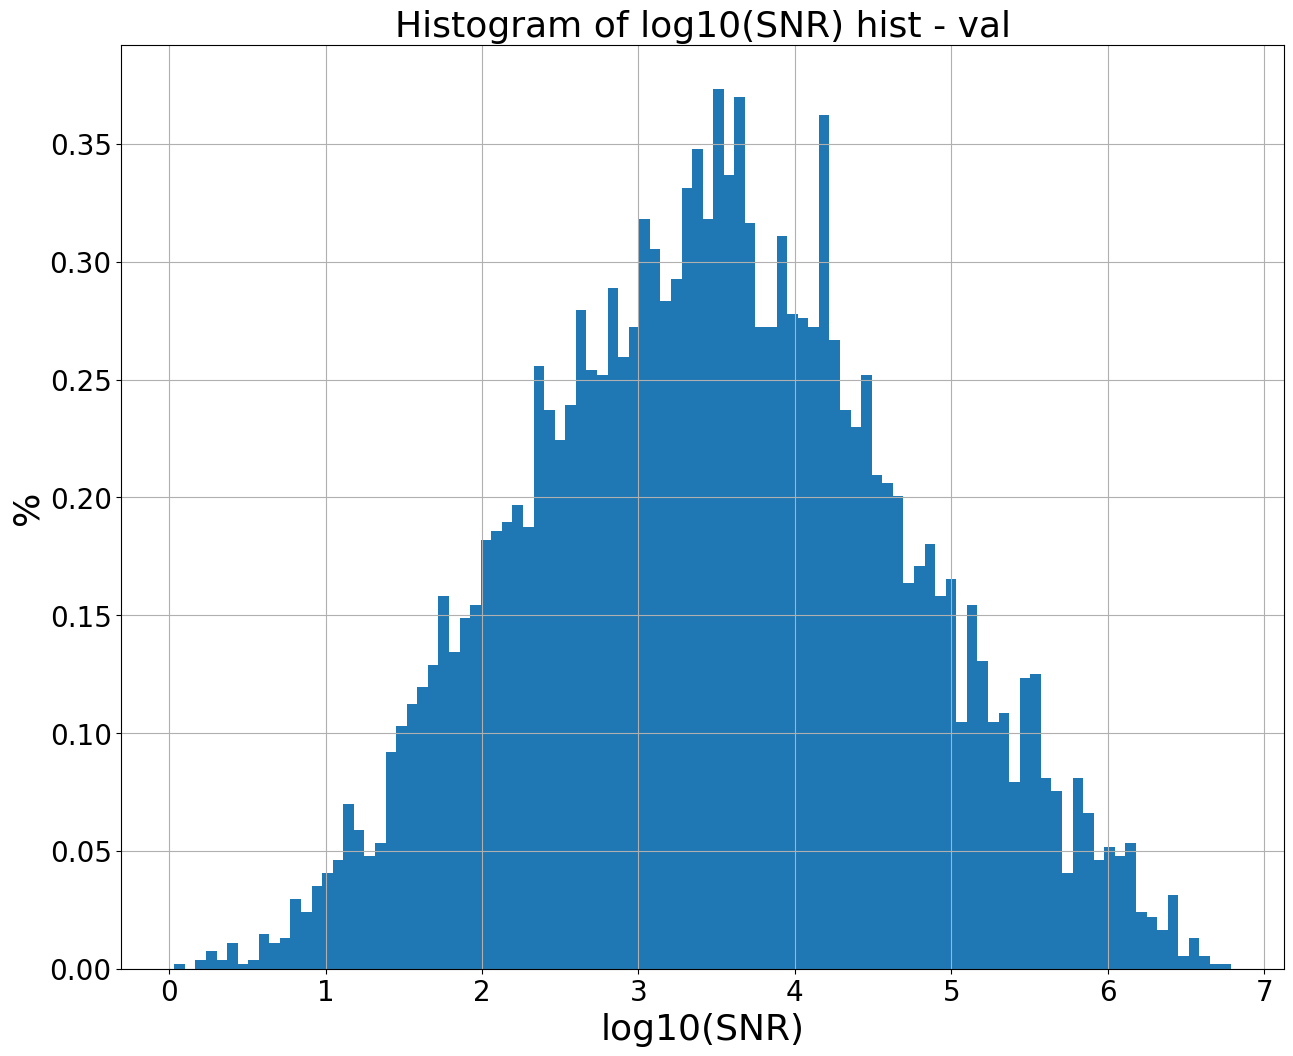

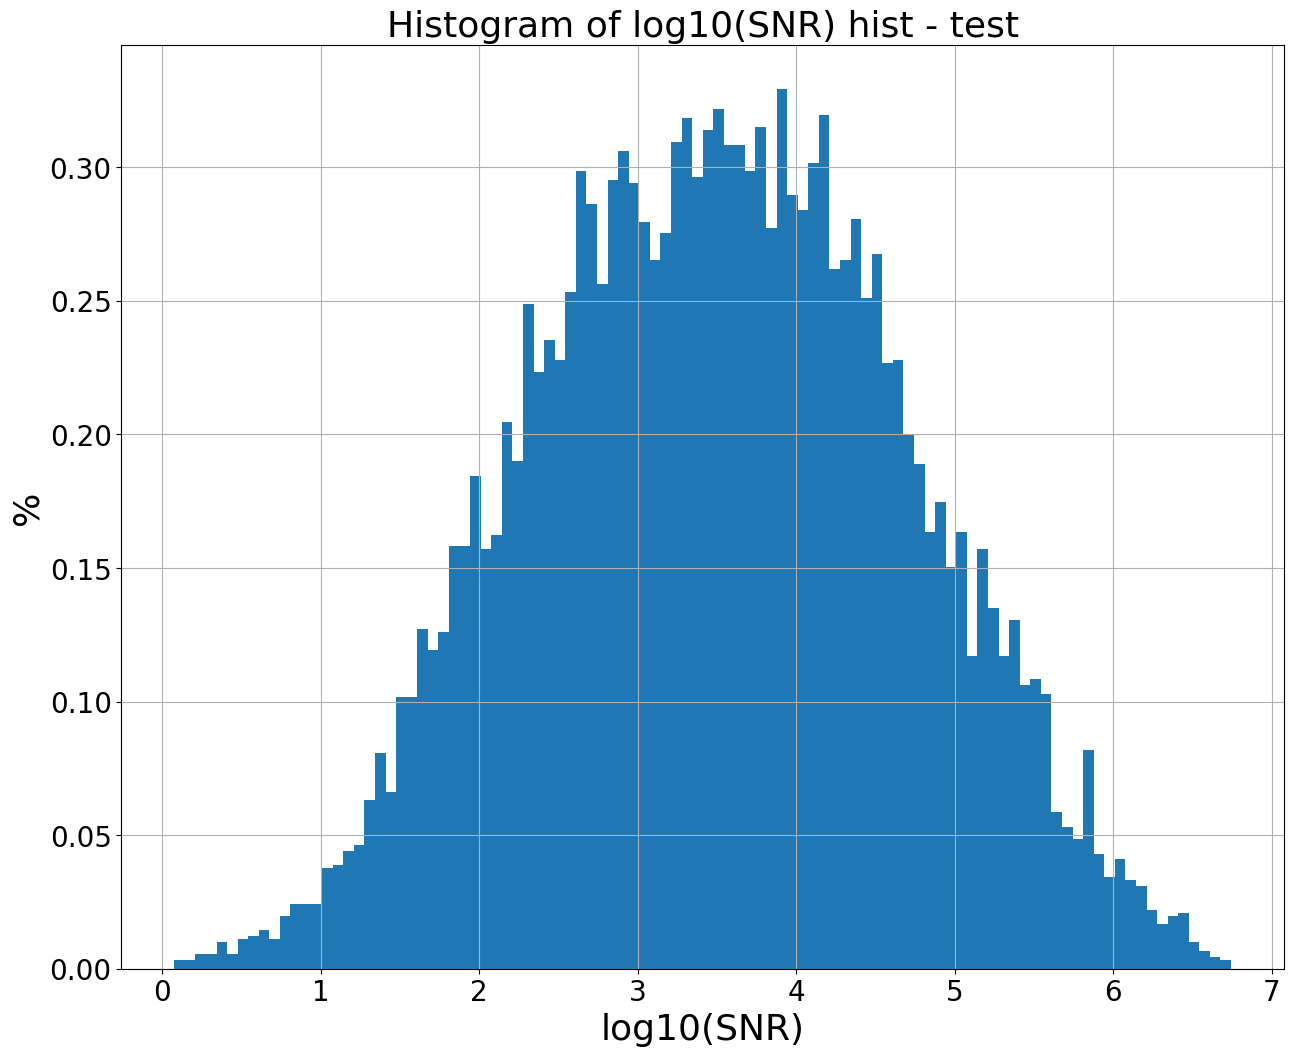

In [67]:
plot_hist(train_pr_over_noise_ar,100,True,"% of Echo above noise","%","% of Echo above noise hist - tarin")
plot_hist(val_pr_over_noise_ar,100,True,"% of Echo above noise","%","% of Echo above noise hist - val")
plot_hist(test_pr_over_noise_ar,100,True,"% of Echo above noise","%","% of Echo above noise hist - test")

plot_hist(log10_ar(train_snr_ar),100,True,"log10(SNR)","%","log10(SNR) hist - tarin")
plot_hist(log10_ar(val_snr_ar),100,True,"log10(SNR)","%","log10(SNR) hist - val")
plot_hist(log10_ar(test_snr_ar),100,True,"log10(SNR)","%","log10(SNR) hist - test")

In [68]:
print(np.min(train_pr_over_noise_ar))
print(np.min(val_pr_over_noise_ar))
print(np.min(test_pr_over_noise_ar))

0.011111111111111112
0.10888888888888888
0.08333333333333333


## Waveform vs Segmask

In [69]:
train_segmasks=[train_set[i,:][2].cpu().detach().numpy() for i in range(len(train_set)) ]
val_segmasks=[val_set[i,:][2].cpu().detach().numpy() for i in range(len(val_set)) ]
test_segmasks=[test_set[i,:][2].cpu().detach().numpy() for i in range(len(test_set)) ]

print(train_segmasks[0])

[0. 0. 0. ... 0. 0. 0.]


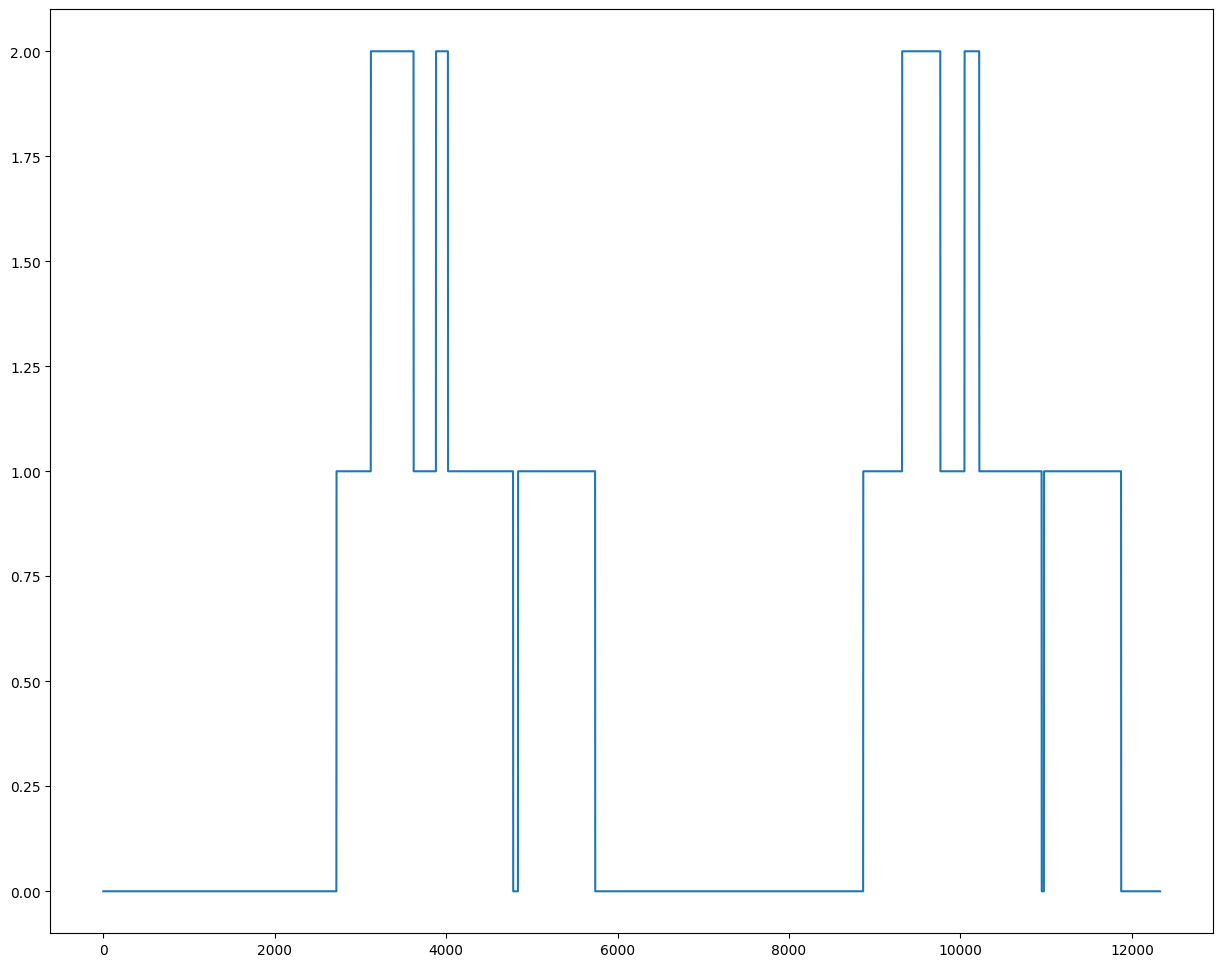

In [70]:
plt.plot(train_segmasks[0])

In [71]:
def snr_per_segmask(waves,segs):
  snr_ar = np.array([])
  seg_ar = np.array([])
  range_ar = np.array([])
  for wave, seg in zip(waves,segs):
    delta_seg = seg[1:] - seg[:-1]
    ind_changes = np.where(np.abs(delta_seg)>0)[0]

    for i in range(len(ind_changes)):
      ind = ind_changes[i]
      if i == len(ind_changes)-1:
        ind_next = len(wave)
      else:
        ind_next = ind_changes[i+1]

      if delta_seg[ind]<0:
        r = (ind_next - params.TX_SIGNAL_LENGTH_IND + 1)*params.IND2DISTANCE
      else:
        r = (ind+1)*params.IND2DISTANCE
      seg_val = seg[ind]
      if ind < ind_next - 1:
        snr = np.mean(np.abs(wave[ind:ind_next-1]))
      else:
        snr = np.abs(wave[ind])

      if np.isnan(snr):
        print(ind)
        print(ind_next)
        print(wave[ind-10:ind+10])
        print(seg[ind-10:ind+10])

      snr_ar = np.append(snr_ar, snr)
      seg_ar = np.append(seg_ar, seg_val)
      range_ar = np.append(range_ar, r)

  return snr_ar, seg_ar, range_ar

In [72]:
train_snr_ar, train_seg_ar, train_range_ar = snr_per_segmask(train_waveforms,train_segmasks)
val_snr_ar, val_seg_ar, val_range_ar = snr_per_segmask(val_waveforms,val_segmasks)
test_snr_ar, test_seg_ar, test_range_ar = snr_per_segmask(test_waveforms,test_segmasks)

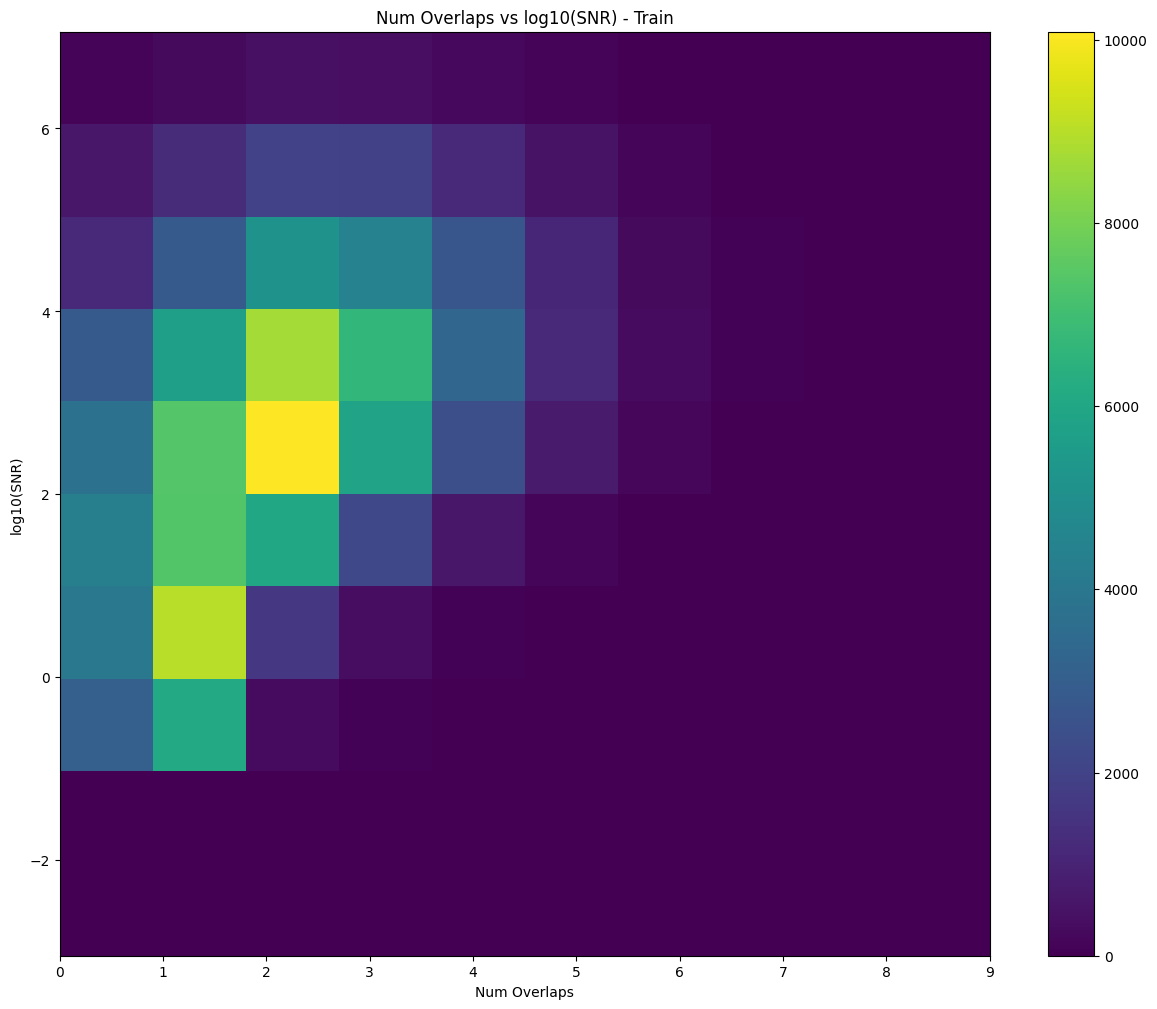

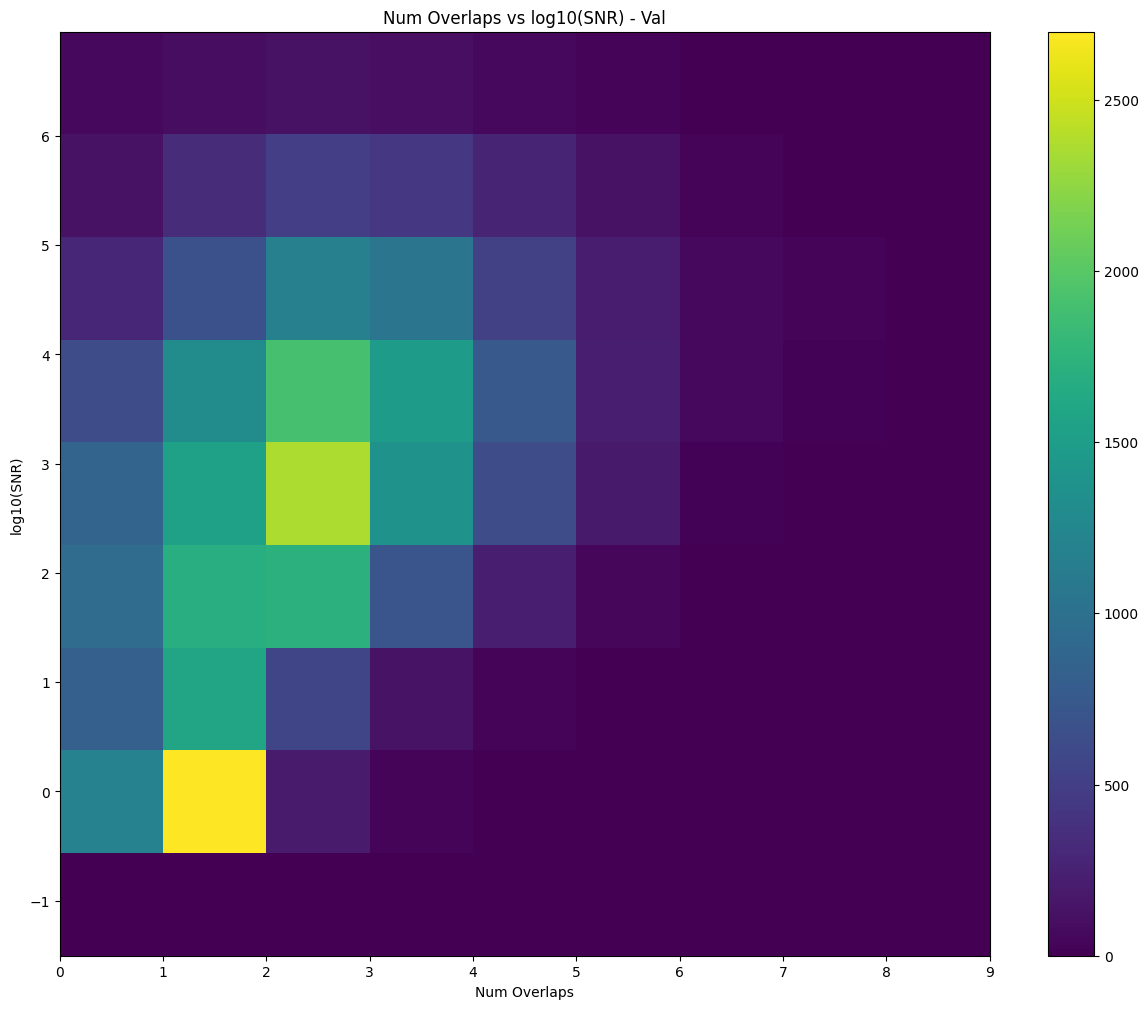

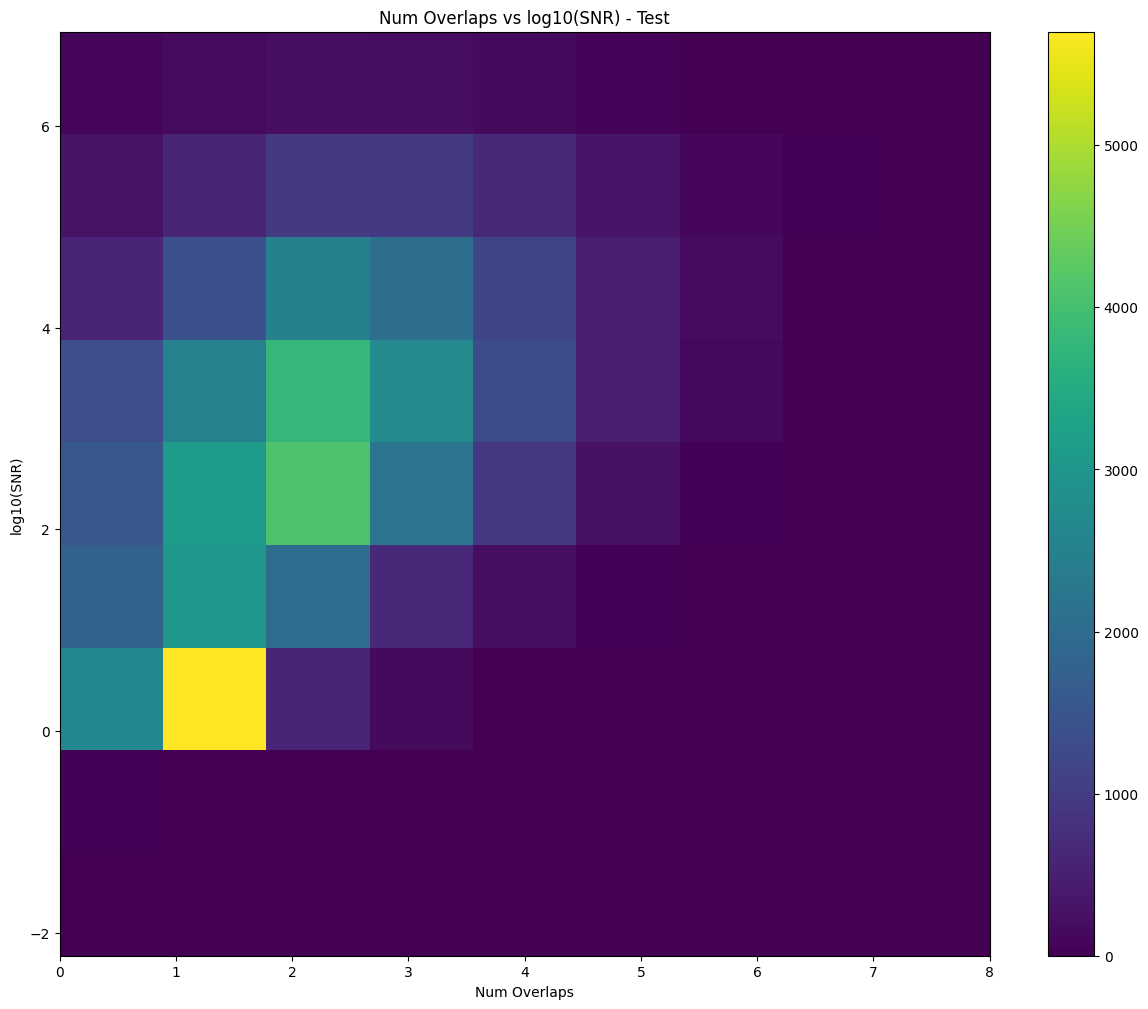

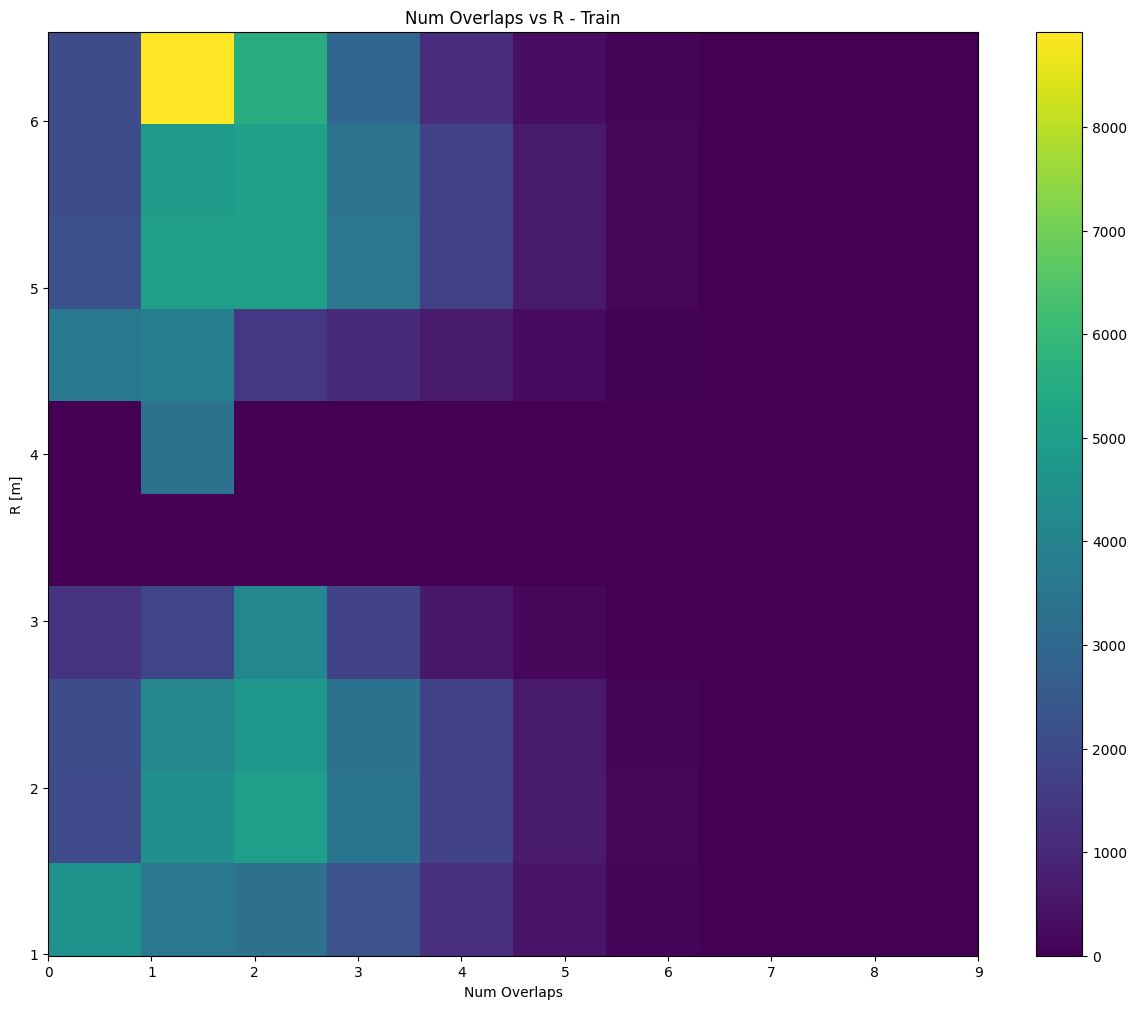

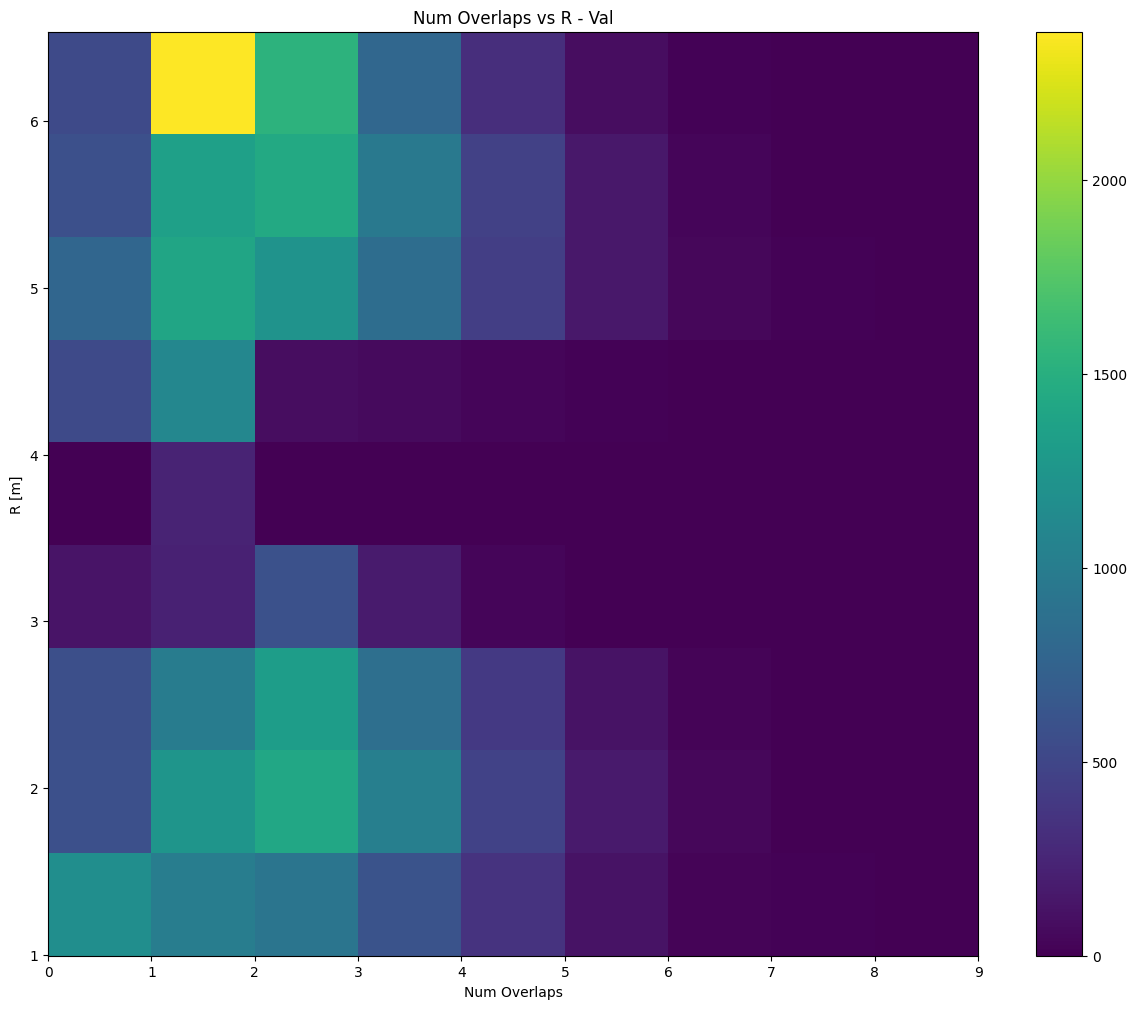

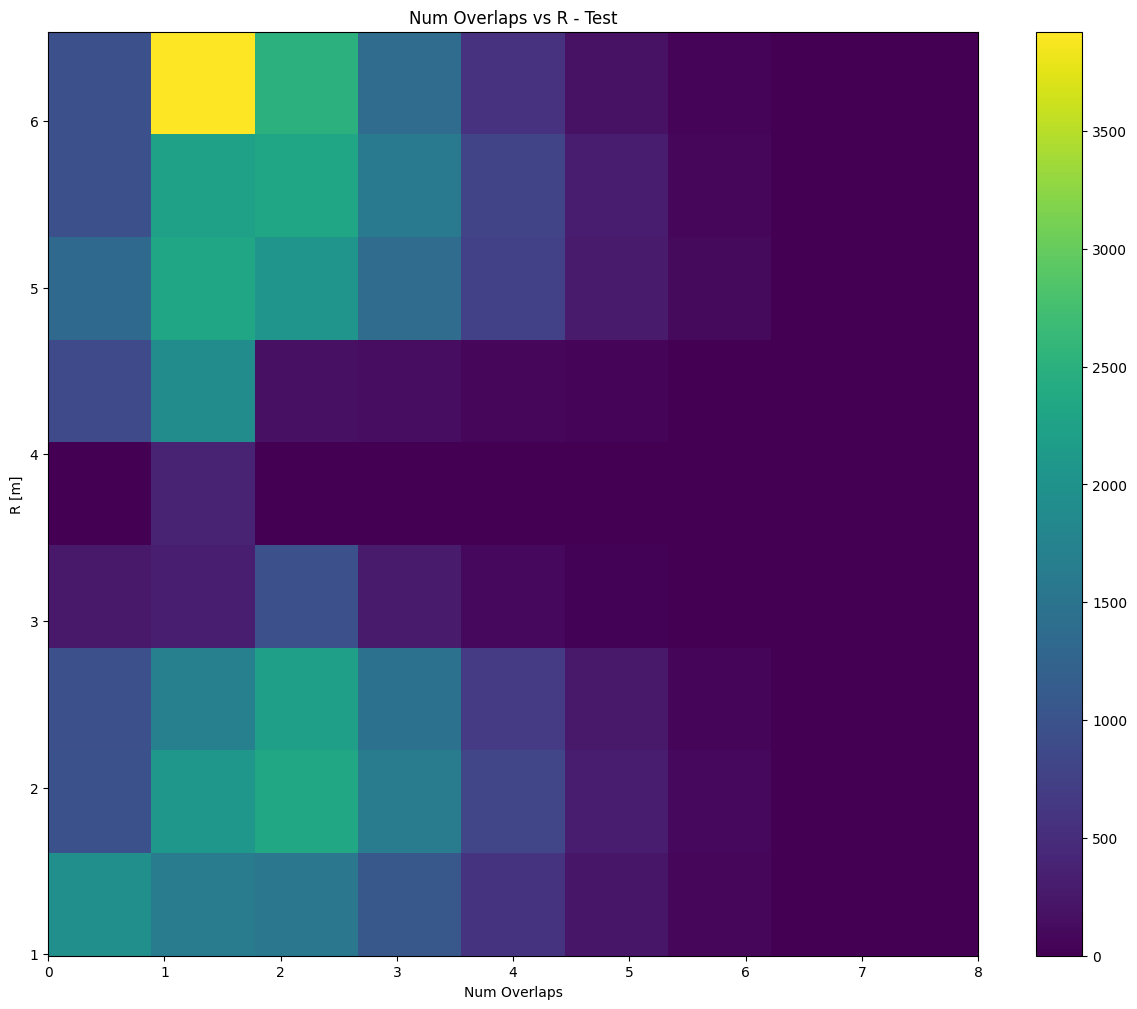

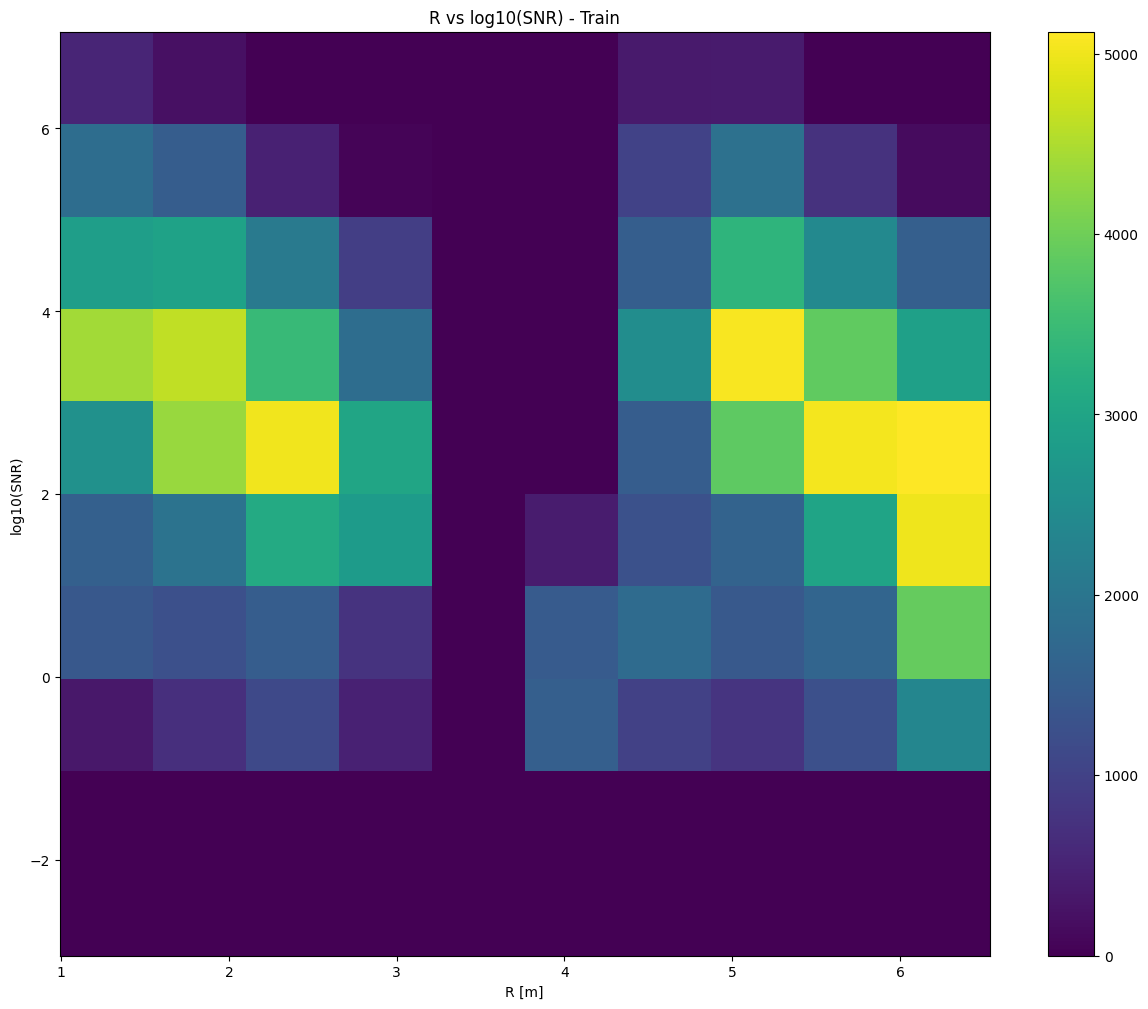

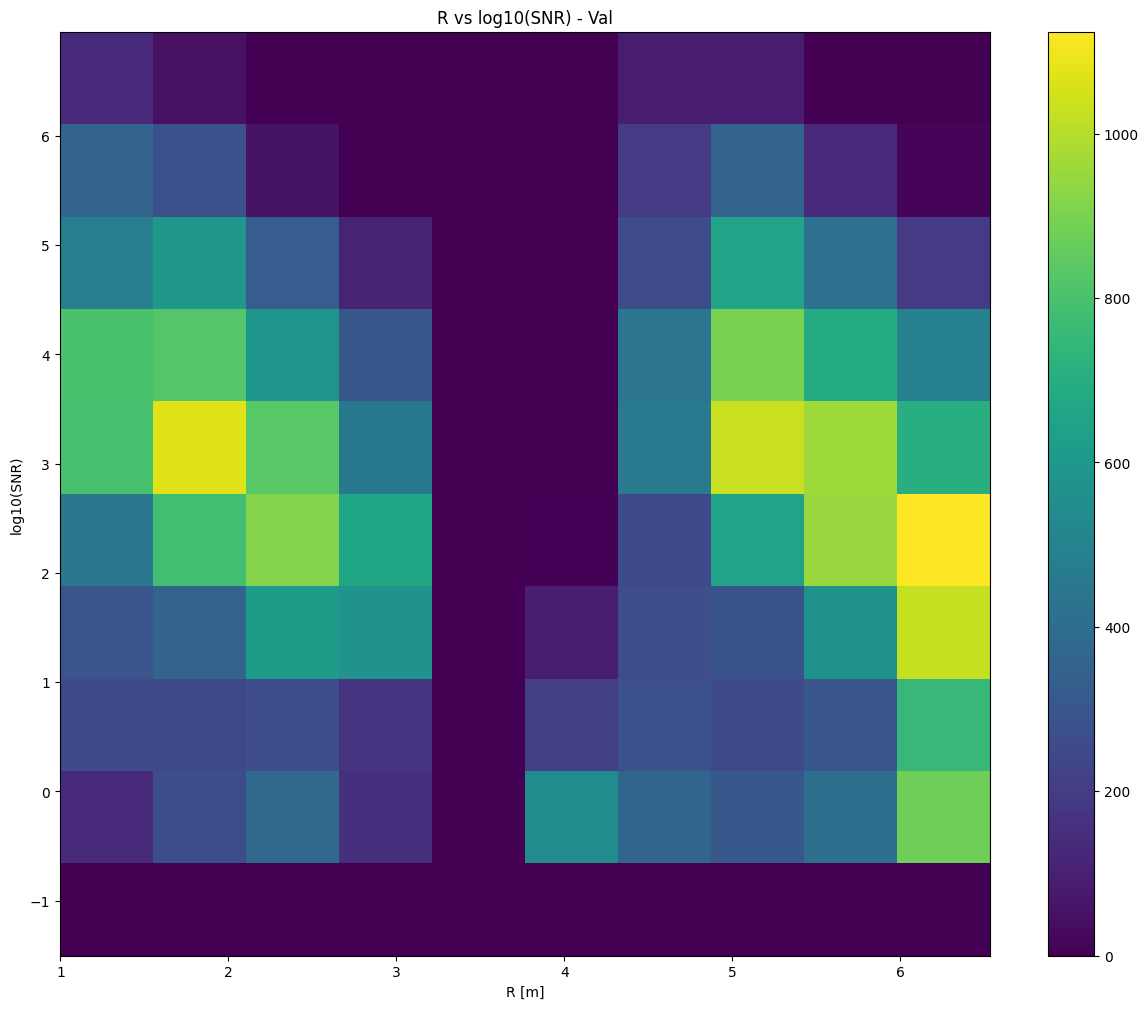

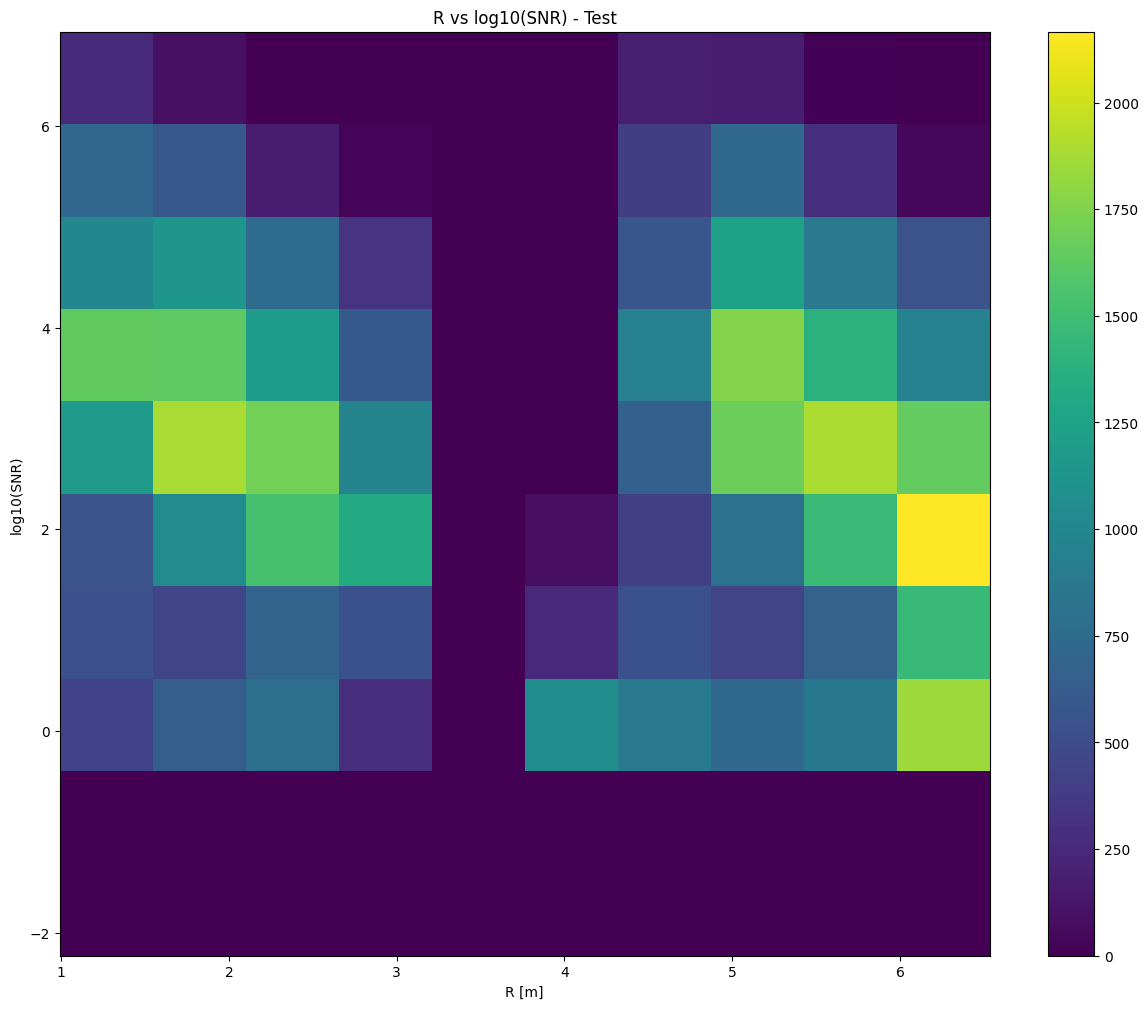

In [73]:
plot2dhist(train_seg_ar,log10_ar(train_snr_ar),10,"Num Overlaps","log10(SNR)","Num Overlaps vs log10(SNR) - Train")
plot2dhist(val_seg_ar,log10_ar(val_snr_ar),9,"Num Overlaps","log10(SNR)","Num Overlaps vs log10(SNR) - Val")
plot2dhist(test_seg_ar,log10_ar(test_snr_ar),9,"Num Overlaps","log10(SNR)","Num Overlaps vs log10(SNR) - Test")

plot2dhist(train_seg_ar,train_range_ar,10,"Num Overlaps","R [m]","Num Overlaps vs R - Train")
plot2dhist(val_seg_ar,val_range_ar,9,"Num Overlaps","R [m]","Num Overlaps vs R - Val")
plot2dhist(test_seg_ar,test_range_ar,9,"Num Overlaps","R [m]","Num Overlaps vs R - Test")

plot2dhist(train_range_ar,log10_ar(train_snr_ar),10,"R [m]","log10(SNR)","R vs log10(SNR) - Train")
plot2dhist(val_range_ar,log10_ar(val_snr_ar),10,"R [m]","log10(SNR)","R vs log10(SNR) - Val")
plot2dhist(test_range_ar,log10_ar(test_snr_ar),10,"R [m]","log10(SNR)","R vs log10(SNR) - Test")

# Segmask

In [84]:
def create_dataset(dataset_name):
    dataset = CNumpySonarDataSet.CNumpySonarDataSet(dataset_name, transform=None, target_transform=None)
    data_size = dataset.__len__()
    print("db sample size", data_size)
    train_ratio = 0.8
    val_ratio = 0.1
    test_ratio = 1 - train_ratio - val_ratio

    train_size = int(data_size * train_ratio)
    validation_size = int(data_size * val_ratio)
    test_size = data_size - train_size - validation_size
    train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, validation_size, test_size])
    # train_set = dataset
    print("train db sample size ", train_set.__len__())
    print("validation db sample size ", val_set.__len__())
    print("test db sample size ", test_set.__len__())
    return train_set, val_set, test_set

def get_device():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    if torch.cuda.is_available():
        print("Cuda capability")
        print(torch.cuda.get_device_capability())
        print(torch.cuda.get_device_name(0))
        torch.cuda.empty_cache()
    return device

In [85]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=False)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
<class 'torch.Tensor'>
torch.Size([32, 12330])
tensor(6.)


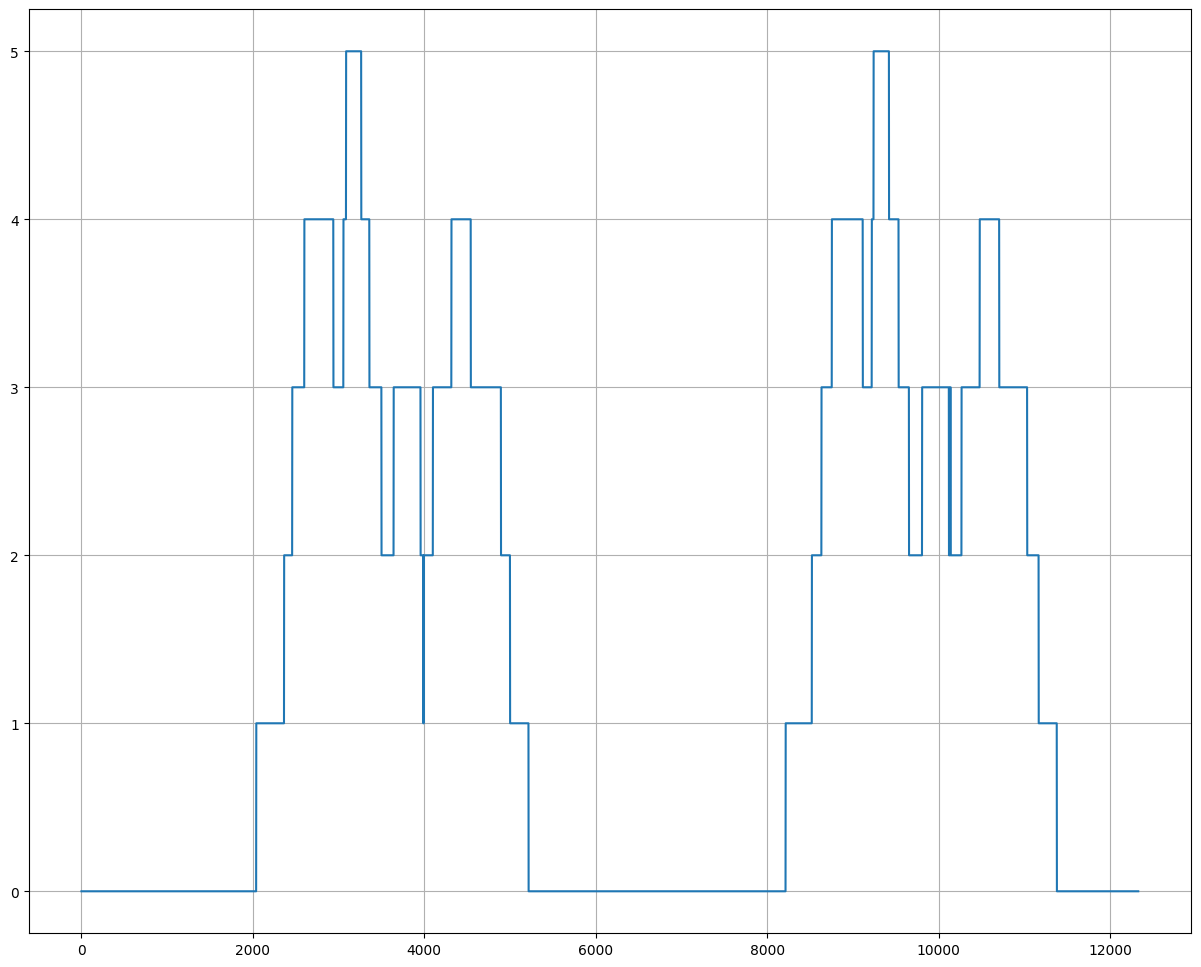

In [86]:
device = get_device()

data, ranges, seg_mask=next(iter(train_loader))

print(seg_mask)
print(type(seg_mask))
print(seg_mask.size())
print(torch.max(seg_mask))

plt.plot(seg_mask[0,:])
plt.grid(True)
plt.show()


data, seg_mask = data.to(device), seg_mask.to(device)
data_size = data.size()[1]
# net input need to be power of 2
# power_of_two = 2 ** (data_size - 1).bit_length() // 2

# net input should be multiple of 16 pad if required
padding = 0
if data_size % 16 != 0:
    padding = (data_size // 16 + 1) * 16 - data_size
data = torch.nn.functional.pad(data, (0, padding), "constant", 0)
seg_mask = torch.nn.functional.pad(seg_mask, (0, padding), "constant", 0)
data, seg_mask = data.to(device), seg_mask.to(device)
net_input = data.unsqueeze(1)

GT = seg_mask.detach().cpu().numpy()
net_input_dis = net_input.squeeze(1).detach().cpu().numpy()
# to do get range based on segmentation result
range_np = ranges.detach().cpu().numpy()
# handle cases of false detection when we detect more targets or less targets
# range_error = mean_squared_error(range_estimation, ranges)
# range_err_sum+=range_error